In [1]:
from UtilDatasetPrepFromLORE import *
from Rankers import *
from PreferentialSampling import *
from UniformSampling import *
from StandardEval import *
from FairnessEval import *
from Explainers import *

22-Jan-07 11:29:26 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


# GERMAN

## Uniform Sampling

In [2]:
filename = 'german_credit.csv'
path_res = '/Users/Marta/FAccT/Res-GERMAN/'
path_data = 'datasets/'
sensitive = ['foreign_worker'] #OR personal_status_sex
df = prepare_german_dataset(filename, path_data, sensitive)

In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['Good','Bad']
#There are two classes, 1 for good customers and 2 for bad customers
#in LORE 0 sta per 1 e 1 sta per 2, quindi 0 è good e 1 è bad  
adClass=0
disClass=1
protected = ['foreign_worker_no','foreign_worker_yes']
protected_feature='foreigners' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr=None
disAttr=None

In [4]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [5]:
findFreq(target,protected,df)

({'foreign_worker_no': 25, 'foreign_worker_yes': 533},
 {'foreign_worker_no': 3, 'foreign_worker_yes': 239})

In [6]:
df_new=UniformSampling(target,protected,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'foreign_worker_no': 25, 'foreign_worker_yes': 533}
Counting labels = 1  {'foreign_worker_no': 3, 'foreign_worker_yes': 239}
DN  ('foreign_worker_yes', 239)
FP  ('foreign_worker_no', 25)
DP  ('foreign_worker_yes', 533)
FN  ('foreign_worker_no', 3)
Len DN_df  239
Len FP_df  25
Len DP_df  533
Len FN_df  3


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Len restData 0
DN_expected  234
5 to be removed
Len DN_df after sampling  234
FP_expected  20
5 to be removed
Len FP_df after sampling  20
DP_expected  538
5 to add
Len DP_df after sampling  538
FN_expected  8
5 to add
Len FN_df after sampling  8


In [7]:
findFreq(target,protected,df_new)

({'foreign_worker_no': 20, 'foreign_worker_yes': 538},
 {'foreign_worker_no': 8, 'foreign_worker_yes': 234})

In [8]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,False)

### MLP

In [9]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [10]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_MLP_Performances.csv')
res

Original Train Dimension = 800
Mitigated Train Dimension = 800
Test Dimension = 200


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't c

---> CLF Original: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 191 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 191 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 162 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 182 ]


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.705000            0.700000       0.720000   
Precision           0.572650            0.258333       0.350000   
Recall              0.201515            0.157576       0.134848   
F1 Score            0.249714            0.194152       0.185769   
Discrimination      0.000000            0.151832       0.000000   

                CLF Mitigated Blind     Best Score  Delta O-OB  Delta M-MB  \
Accuracy                   0.710000  CLF Mitigated    0.005000    0.010000   
Precision                  0.200000   CLF Original    0.314316    0.150000   
Recall                     0.051515   CLF Original    0.043939    0.083333   
F1 Score                   0.081905   CLF Original    0.055562    0.103864   
Discrimination             0.047120   CLF Original    0.151832    0.047120   

                Delta O-M  Delta OB-MB  
Accuracy         0.015000     0.010000  
Precision        0.222650     0.058333  
Recall           0.066667     0.106061  
F1 Score         0.063945     0.112247  
Discrimination   0.000000     0.104712

In [11]:

PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [12]:
PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [13]:
res = pd.read_csv(path_res+'US_MLP_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.705000            0.700000       0.720000   
Precision           0.572650            0.258333       0.350000   
Recall              0.201515            0.157576       0.134848   
F1 Score            0.249714            0.194152       0.185769   
Discrimination      0.000000            0.151832       0.000000   

                CLF Mitigated Blind     Best Score  Delta O-OB  Delta M-MB  \
Accuracy                   0.710000  CLF Mitigated    0.005000    0.010000   
Precision                  0.200000   CLF Original    0.314316    0.150000   
Recall                     0.051515   CLF Original    0.043939    0.083333   
F1 Score                   0.081905   CLF Original    0.055562    0.103864   
Discrimination             0.047120   CLF Original    0.151832    0.047120   

                Delta O-M  Delta OB-MB  
Accuracy         0.015000     0.010000  
Precision        0.222650     0.058333  
Recall           0.066667     0.106061  
F1 Score         0.063945     0.112247  
Discrimination   0.000000     0.104712

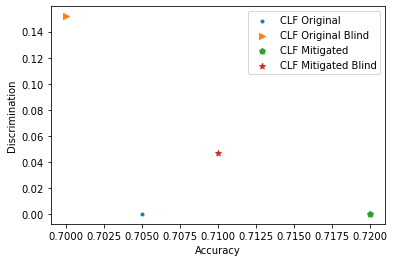

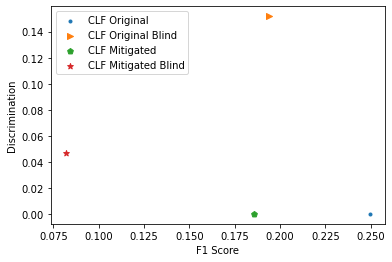

In [14]:
plotDisc(res)

In [15]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 9 instances.
    * "('foreign_worker_yes',)" grouping has 191 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 8 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 134 data points.
        - The class *Bad* has 57 data points.


In [16]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


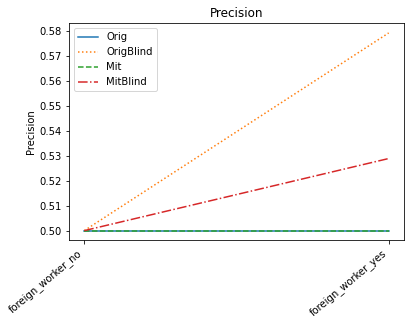

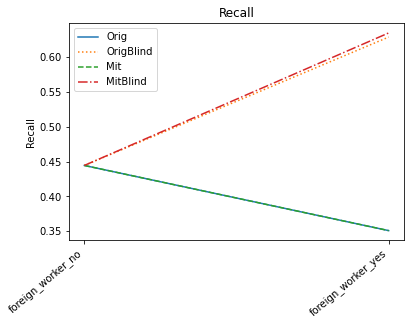

In [17]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [18]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [19]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [20]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [21]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.336700            0.097774   
duration_in_month                      -4.188237           -1.887118   
credit_history                          0.074146            0.021846   
purpose                                 0.018061           -0.257937   
credit_amount                           5.810148            3.519189   
savings                                 0.505977           -0.041900   
present_emp_since                       0.009809            0.031007   
installment_as_income_perc              0.007899            0.022535   
personal_status_sex                     0.364513            0.098044   
other_debtors                           0.123209            0.022916   
present_res_since                      -0.198148           -0.046180   
property                               -0.091777            0.016773   
age                                     1.330253            1.025282   
other_installment_plans                 0.001172            0.002867   
housing                                 0.270573            0.020374   
credits_this_bank                       0.041215            0.003752   
job                                     0.123734            0.064755   
people_under_maintenance                0.095187            0.010833   
telephone                               0.380602            0.104219   
foreign_worker_no                      -0.002937            0.003705   
foreign_worker_yes                      0.003848            0.001224   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.026301                 -0.212624  
duration_in_month                -0.236278                 -5.839077  
credit_history                   -0.001293                  0.097285  
purpose                          -0.076088                 -0.163788  
credit_amount                     1.024904                  8.304433  
savings                          -0.010859                  0.474936  
present_emp_since                 0.002055                  0.038762  
installment_as_income_perc        0.015257                  0.015177  
personal_status_sex              -0.009964                  0.472520  
other_debtors                     0.006832                  0.139293  
present_res_since                -0.000406                 -0.243923  
property                          0.010137                 -0.085140  
age                               0.252035                  2.103500  
other_installment_plans           0.002811                  0.001229  
housing                           0.000442                  0.290505  
credits_this_bank                 0.004177                  0.040790  
job                               0.014503                  0.173985  
people_under_maintenance          0.007222                  0.098798  
telephone                         0.000095                  0.484726  
foreign_worker_no                 0.000404                  0.000364  
foreign_worker_yes               -0.001680                  0.006752

In [22]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.023281            0.003754   
duration_in_month                       0.067296            0.023587   
credit_history                          0.003228            0.000471   
purpose                                 0.000762            0.002253   
credit_amount                           0.056739            0.019388   
savings                                 0.014797            0.001034   
present_emp_since                       0.000384            0.000626   
installment_as_income_perc              0.000272            0.001187   
personal_status_sex                     0.012239            0.001743   
other_debtors                           0.000966            0.000153   
present_res_since                       0.004048            0.000714   
property                                0.001436            0.000163   
age                                     0.016799            0.010310   
other_installment_plans                 0.000030            0.000034   
housing                                 0.003959            0.000198   
credits_this_bank                       0.004660            0.000094   
job                                     0.001654            0.000570   
people_under_maintenance                0.000947            0.000135   
telephone                               0.010420            0.001268   
foreign_worker_no                       0.000027            0.000027   
foreign_worker_yes                      0.000019            0.000026   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.000376                  0.019529  
duration_in_month                 0.004999                  0.049106  
credit_history                    0.000081                  0.003481  
purpose                           0.000977                  0.003509  
credit_amount                     0.009465                  0.045677  
savings                           0.000245                  0.013630  
present_emp_since                 0.000061                  0.000923  
installment_as_income_perc        0.000158                  0.001318  
personal_status_sex               0.000364                  0.010619  
other_debtors                     0.000032                  0.000923  
present_res_since                 0.000027                  0.003609  
property                          0.000078                  0.001415  
age                               0.002375                  0.017203  
other_installment_plans           0.000014                  0.000049  
housing                           0.000025                  0.003763  
credits_this_bank                 0.000053                  0.004725  
job                               0.000094                  0.001549  
people_under_maintenance          0.000019                  0.000904  
telephone                         0.000055                  0.009146  
foreign_worker_no                 0.000002                  0.000051  
foreign_worker_yes                0.000011                  0.000034

In [23]:
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.003393            0.002464        0.001042   
SA-Mean               0.000023            0.000026        0.000007   
NSA-Sum               0.735335            0.383963        0.089561   
NSA-Mean              0.011785            0.003562        0.001026   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.003558  
SA-Mean                   0.000043  
NSA-Sum                   1.014763  
NSA-Mean                  0.010057

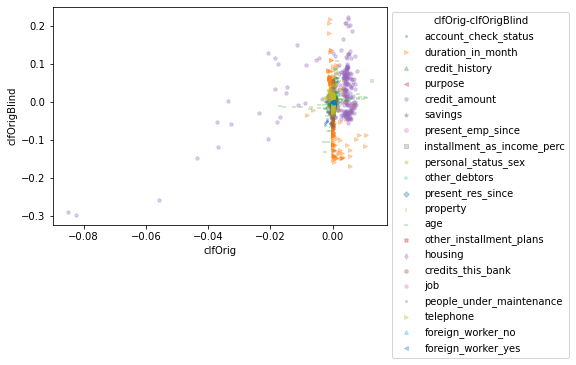

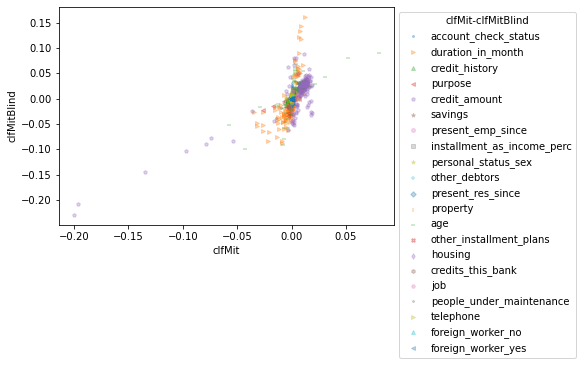

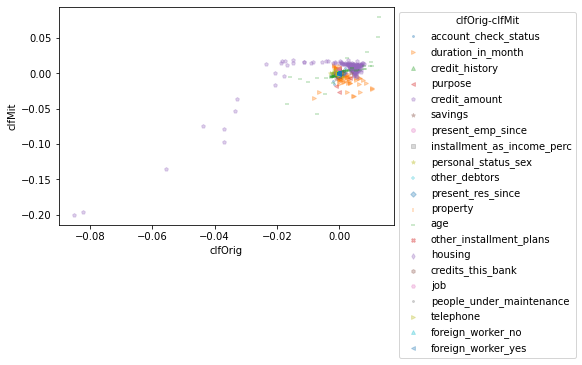

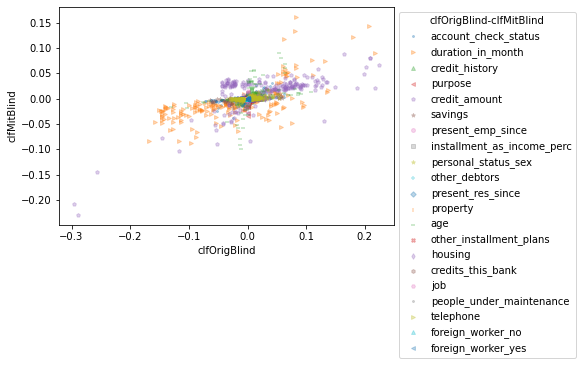

In [26]:
XAIPlots(shap_v,column_names,diffClfs=True)

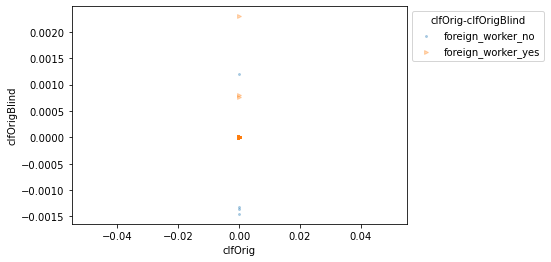

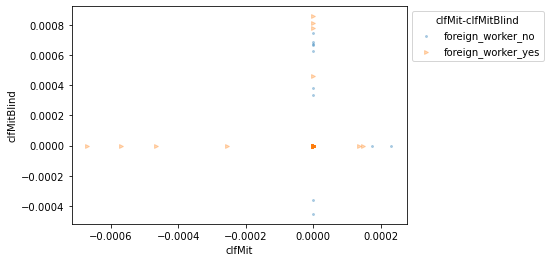

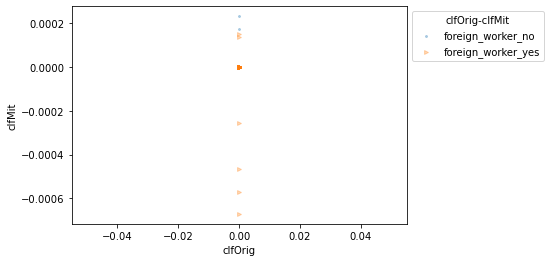

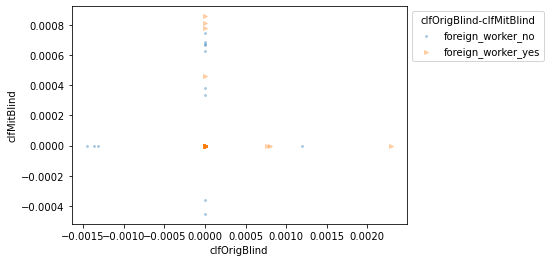

In [27]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [28]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [29]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [30]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [31]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.496826            0.240593   
duration_in_month                      -5.190649           -2.808728   
credit_history                         -0.155824            0.009015   
purpose                                -0.116483            0.033065   
credit_amount                           0.718963            1.022526   
savings                                 0.760265            0.158534   
present_emp_since                       0.096131           -0.005554   
installment_as_income_perc             -0.041117            0.006873   
personal_status_sex                    -0.076317           -0.033364   
other_debtors                          -0.460333           -0.158445   
present_res_since                      -0.056632            0.008633   
property                                0.042733            0.018139   
age                                     0.608675            1.215365   
other_installment_plans                -0.072947            0.000166   
housing                                -0.846891            0.029936   
credits_this_bank                       0.200612            0.003435   
job                                    -0.035477            0.016073   
people_under_maintenance               -0.057142           -0.023986   
telephone                               0.314660            0.002020   
foreign_worker_no                      -0.045056            0.069744   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.048159                  0.689260  
duration_in_month                -0.245823                 -7.753554  
credit_history                   -0.005224                 -0.141585  
purpose                           0.008197                 -0.091615  
credit_amount                    -1.577070                  3.318559  
savings                           0.045160                  0.873639  
present_emp_since                 0.007149                  0.083427  
installment_as_income_perc        0.016845                 -0.051088  
personal_status_sex              -0.001957                 -0.107723  
other_debtors                    -0.042825                 -0.575953  
present_res_since                 0.011609                 -0.059608  
property                         -0.012036                  0.072908  
age                               0.329299                  1.494741  
other_installment_plans           0.020550                 -0.093331  
housing                           0.020292                 -0.837247  
credits_this_bank                 0.012845                  0.191203  
job                               0.017039                 -0.036442  
people_under_maintenance         -0.021240                 -0.059888  
telephone                        -0.024963                  0.341642  
foreign_worker_no                 0.018896                  0.005792  
foreign_worker_yes                0.000000                  0.000000

In [32]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.016435            0.005464   
duration_in_month                       0.063510            0.035634   
credit_history                          0.003922            0.002086   
purpose                                 0.003289            0.002407   
credit_amount                           0.039180            0.019718   
savings                                 0.011687            0.002187   
present_emp_since                       0.003411            0.001930   
installment_as_income_perc              0.003589            0.001985   
personal_status_sex                     0.007406            0.003258   
other_debtors                           0.003843            0.001951   
present_res_since                       0.003526            0.002032   
property                                0.003713            0.001962   
age                                     0.012268            0.013512   
other_installment_plans                 0.002964            0.001719   
housing                                 0.006631            0.001908   
credits_this_bank                       0.004545            0.002100   
job                                     0.003349            0.002004   
people_under_maintenance                0.003213            0.001920   
telephone                               0.008167            0.002486   
foreign_worker_no                       0.003308            0.002192   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.001218                  0.010030  
duration_in_month                 0.006543                  0.028302  
credit_history                    0.000937                  0.004768  
purpose                           0.001433                  0.004542  
credit_amount                     0.006545                  0.042923  
savings                           0.000969                  0.010228  
present_emp_since                 0.000878                  0.003918  
installment_as_income_perc        0.001017                  0.003849  
personal_status_sex               0.001058                  0.004886  
other_debtors                     0.000803                  0.003842  
present_res_since                 0.000981                  0.003397  
property                          0.000875                  0.004004  
age                               0.003307                  0.005941  
other_installment_plans           0.000907                  0.003462  
housing                           0.000929                  0.006417  
credits_this_bank                 0.000914                  0.004927  
job                               0.001032                  0.003704  
people_under_maintenance          0.000997                  0.003697  
telephone                         0.000953                  0.006112  
foreign_worker_no                 0.001034                  0.003668  
foreign_worker_yes                0.000000                  0.000000

In [33]:
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.022528            0.034872        0.009448   
SA-Mean               0.001654            0.001096        0.000517   
NSA-Sum               0.544667            0.304971        0.129910   
NSA-Mean              0.010771            0.005593        0.001700   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.002896  
SA-Mean                   0.001834  
NSA-Sum                   0.888074  
NSA-Mean                  0.008366

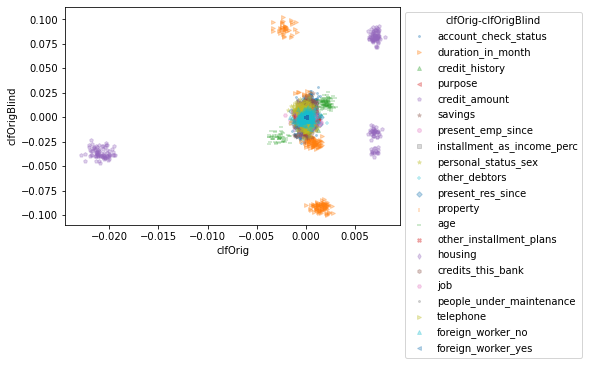

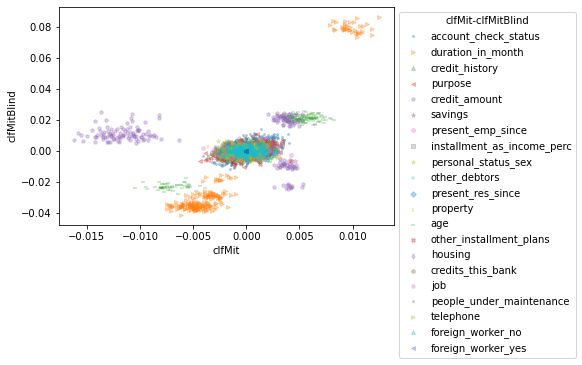

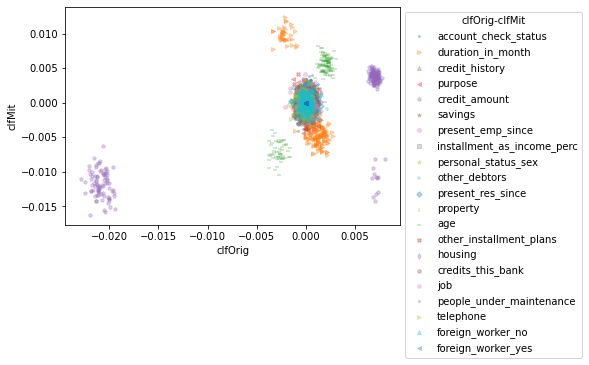

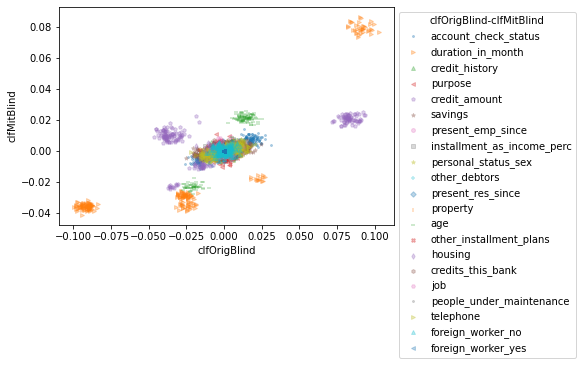

In [34]:
XAIPlots(lime_v,column_names,diffClfs=True)

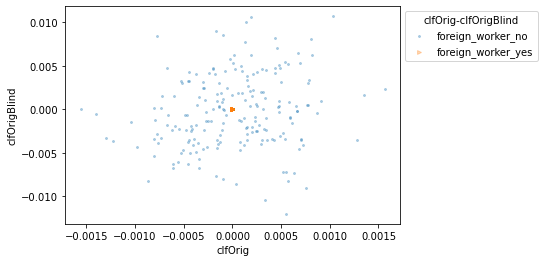

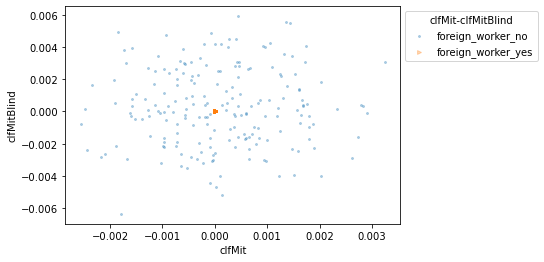

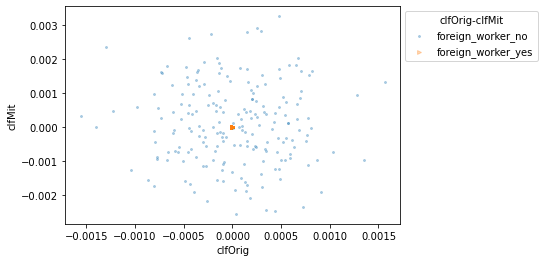

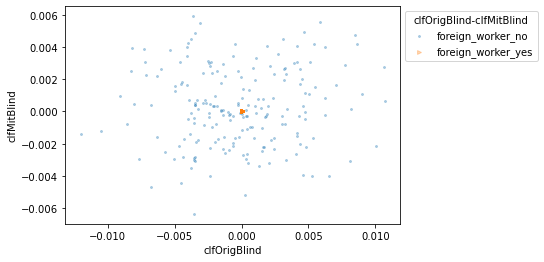

In [35]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [36]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [37]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [38]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [39]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.214515            0.098382   
duration_in_month                      -3.179879           -1.739428   
credit_history                          0.042632            0.024512   
purpose                                 0.002829           -0.238168   
credit_amount                           5.775146            3.929504   
savings                                 0.520409           -0.042481   
present_emp_since                       0.010225            0.015333   
installment_as_income_perc              0.003605            0.028386   
personal_status_sex                     0.319616            0.095750   
other_debtors                           0.107422            0.021088   
present_res_since                      -0.199971           -0.040896   
property                               -0.102795            0.019032   
age                                     1.170800            1.104259   
other_installment_plans                 0.001891            0.003942   
housing                                 0.250303            0.019576   
credits_this_bank                       0.027908            0.003928   
job                                     0.116088            0.066149   
people_under_maintenance                0.093098            0.014422   
telephone                               0.370828            0.118823   
foreign_worker_no                      -0.001157           -0.001375   
foreign_worker_yes                     -0.002556            0.001774   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.019939                 -0.096194  
duration_in_month                -0.283541                 -4.635766  
credit_history                   -0.001720                  0.068864  
purpose                          -0.071017                 -0.164322  
credit_amount                     0.849318                  8.855332  
savings                          -0.016279                  0.494206  
present_emp_since                 0.002292                  0.023266  
installment_as_income_perc        0.015442                  0.016549  
personal_status_sex              -0.011496                  0.426862  
other_debtors                     0.004819                  0.123691  
present_res_since                 0.000049                 -0.240916  
property                          0.009611                 -0.093374  
age                               0.294072                  1.980988  
other_installment_plans           0.001420                  0.004413  
housing                           0.001302                  0.268577  
credits_this_bank                 0.000936                  0.030900  
job                               0.018978                  0.163260  
people_under_maintenance          0.006114                  0.101407  
telephone                         0.002008                  0.487643  
foreign_worker_no                 0.000150                 -0.002682  
foreign_worker_yes               -0.001961                  0.001178

In [40]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.023944            0.003880   
duration_in_month                       0.066777            0.022696   
credit_history                          0.003468            0.000483   
purpose                                 0.000750            0.002221   
credit_amount                           0.056439            0.021422   
savings                                 0.015203            0.001007   
present_emp_since                       0.000419            0.000665   
installment_as_income_perc              0.000289            0.001155   
personal_status_sex                     0.012579            0.001755   
other_debtors                           0.001034            0.000192   
present_res_since                       0.004259            0.000656   
property                                0.001468            0.000169   
age                                     0.016836            0.010016   
other_installment_plans                 0.000035            0.000033   
housing                                 0.004136            0.000193   
credits_this_bank                       0.004804            0.000067   
job                                     0.001763            0.000579   
people_under_maintenance                0.001015            0.000131   
telephone                               0.010682            0.001235   
foreign_worker_no                       0.000017            0.000017   
foreign_worker_yes                      0.000013            0.000034   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status          4.088726e-04                  0.019983  
duration_in_month             5.084744e-03                  0.049278  
credit_history                7.859863e-05                  0.003728  
purpose                       9.907237e-04                  0.003419  
credit_amount                 9.111387e-03                  0.045078  
savings                       2.519736e-04                  0.014111  
present_emp_since             5.661768e-05                  0.000918  
installment_as_income_perc    1.908274e-04                  0.001349  
personal_status_sex           3.708349e-04                  0.010927  
other_debtors                 2.409341e-05                  0.000980  
present_res_since             2.682511e-05                  0.003900  
property                      7.527512e-05                  0.001435  
age                           2.692165e-03                  0.017283  
other_installment_plans       1.734595e-05                  0.000051  
housing                       2.873052e-05                  0.003967  
credits_this_bank             5.737317e-05                  0.004822  
job                           1.091856e-04                  0.001674  
people_under_maintenance      2.893134e-05                  0.000968  
telephone                     6.665620e-05                  0.009452  
foreign_worker_no             7.497931e-07                  0.000034  
foreign_worker_yes            1.085056e-05                  0.000036

In [41]:
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.001857            0.001574        0.001055   
SA-Mean               0.000015            0.000026        0.000006   
NSA-Sum               0.658419            0.401266        0.084755   
NSA-Mean              0.011889            0.003608        0.001035   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.001930  
SA-Mean                   0.000035  
NSA-Sum                   0.961923  
NSA-Mean                  0.010175

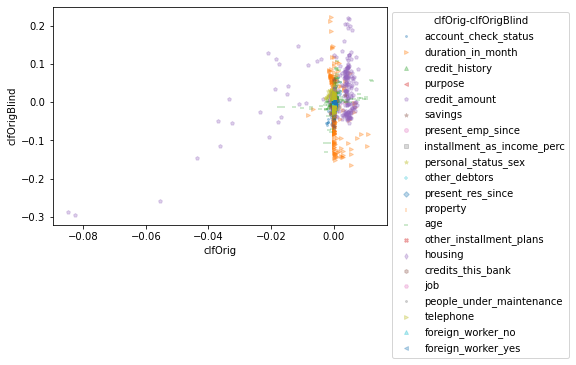

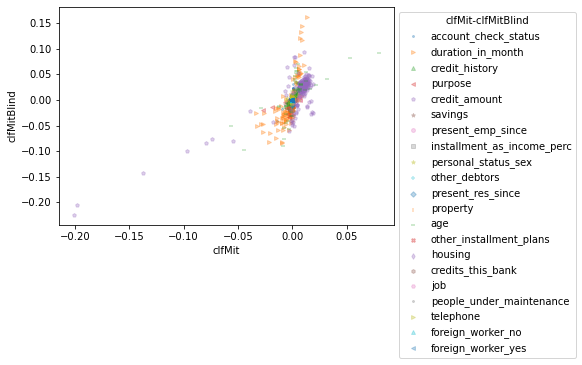

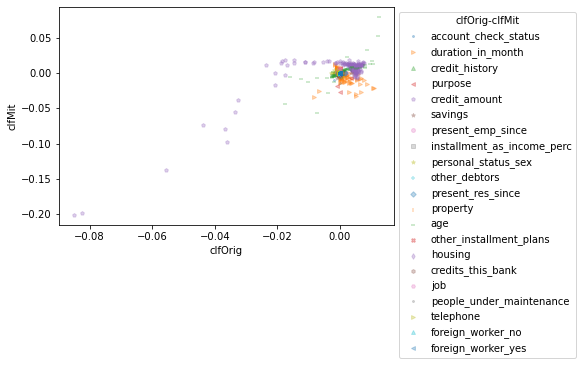

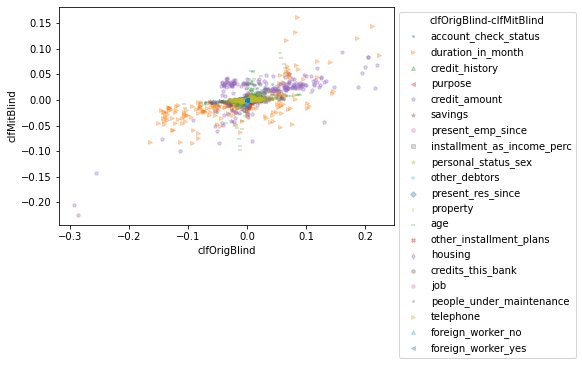

In [42]:
XAIPlots(shap_v,column_names,diffClfs=True)

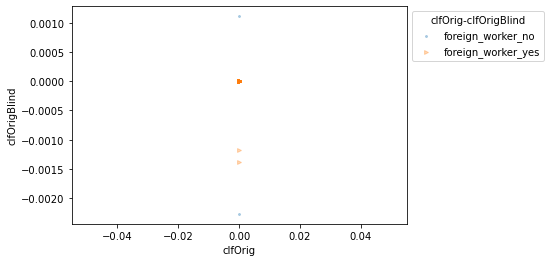

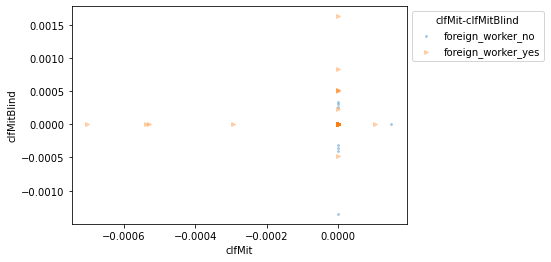

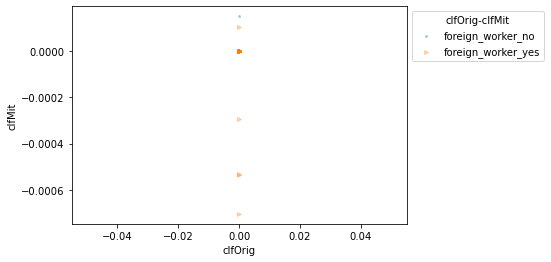

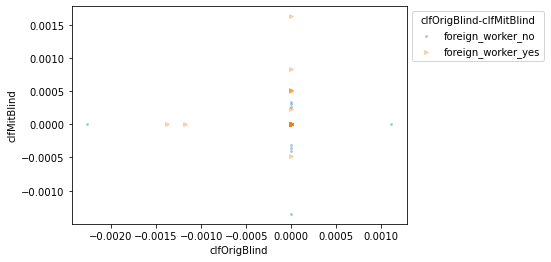

In [43]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [44]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [45]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [46]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [47]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.497392            0.253659   
duration_in_month                      -5.190201           -2.662582   
credit_history                         -0.155418            0.064088   
purpose                                -0.116729            0.066299   
credit_amount                           0.719238            0.853250   
savings                                 0.760321            0.207703   
present_emp_since                       0.096787           -0.011215   
installment_as_income_perc             -0.041655           -0.004389   
personal_status_sex                    -0.075886           -0.050231   
other_debtors                          -0.460762           -0.070252   
present_res_since                      -0.056544           -0.041281   
property                                0.043397           -0.027063   
age                                     0.608333            1.242551   
other_installment_plans                -0.072792           -0.027898   
housing                                -0.847339           -0.019663   
credits_this_bank                       0.199481            0.048548   
job                                    -0.035149            0.017721   
people_under_maintenance               -0.057369           -0.044047   
telephone                               0.314550            0.115552   
foreign_worker_no                      -0.045286            0.050905   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.059094                  0.691957  
duration_in_month                -0.160688                 -7.692094  
credit_history                    0.028461                 -0.119790  
purpose                           0.022321                 -0.072750  
credit_amount                    -1.594337                  3.166825  
savings                           0.057549                  0.910475  
present_emp_since                 0.009244                  0.076329  
installment_as_income_perc       -0.009769                 -0.036275  
personal_status_sex               0.011342                 -0.137459  
other_debtors                    -0.043304                 -0.487710  
present_res_since                -0.013213                 -0.084612  
property                         -0.010789                  0.027123  
age                               0.331418                  1.519467  
other_installment_plans           0.003887                 -0.104577  
housing                          -0.002130                 -0.864872  
credits_this_bank                 0.016802                  0.231227  
job                               0.000935                 -0.018363  
people_under_maintenance          0.000507                 -0.101923  
telephone                        -0.005870                  0.435972  
foreign_worker_no                -0.019546                  0.025166  
foreign_worker_yes                0.000000                  0.000000

In [48]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.016439            0.005541   
duration_in_month                       0.063510            0.036690   
credit_history                          0.003923            0.002081   
purpose                                 0.003288            0.002395   
credit_amount                           0.039179            0.017784   
savings                                 0.011688            0.002322   
present_emp_since                       0.003408            0.001957   
installment_as_income_perc              0.003591            0.002060   
personal_status_sex                     0.007405            0.003209   
other_debtors                           0.003843            0.001961   
present_res_since                       0.003525            0.002122   
property                                0.003712            0.001885   
age                                     0.012265            0.012949   
other_installment_plans                 0.002964            0.001845   
housing                                 0.006630            0.001861   
credits_this_bank                       0.004551            0.001892   
job                                     0.003346            0.001853   
people_under_maintenance                0.003216            0.001984   
telephone                               0.008168            0.002183   
foreign_worker_no                       0.003229            0.002415   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.001168                  0.009969  
duration_in_month                 0.005477                  0.028426  
credit_history                    0.000861                  0.004774  
purpose                           0.001358                  0.004470  
credit_amount                     0.006598                  0.043620  
savings                           0.000913                  0.009988  
present_emp_since                 0.000910                  0.003916  
installment_as_income_perc        0.000984                  0.004153  
personal_status_sex               0.000969                  0.004989  
other_debtors                     0.000940                  0.004177  
present_res_since                 0.000936                  0.003609  
property                          0.000898                  0.004016  
age                               0.002926                  0.005089  
other_installment_plans           0.000796                  0.003309  
housing                           0.000724                  0.006353  
credits_this_bank                 0.000945                  0.004722  
job                               0.000861                  0.003599  
people_under_maintenance          0.000824                  0.003650  
telephone                         0.000993                  0.006463  
foreign_worker_no                 0.001060                  0.003979  
foreign_worker_yes                0.000000                  0.000000

In [49]:
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.022643            0.025452        0.009773   
SA-Mean               0.001615            0.001207        0.000530   
NSA-Sum               0.544702            0.306736        0.125350   
NSA-Mean              0.010771            0.005504        0.001583   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.012583  
SA-Mean                   0.001989  
NSA-Sum                   0.883147  
NSA-Mean                  0.008384

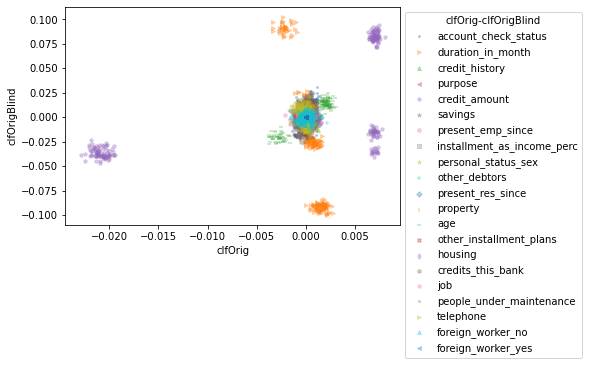

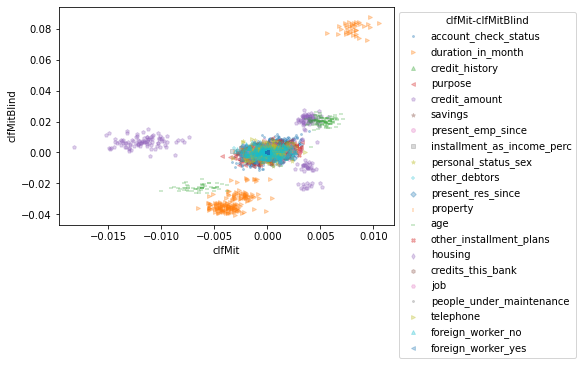

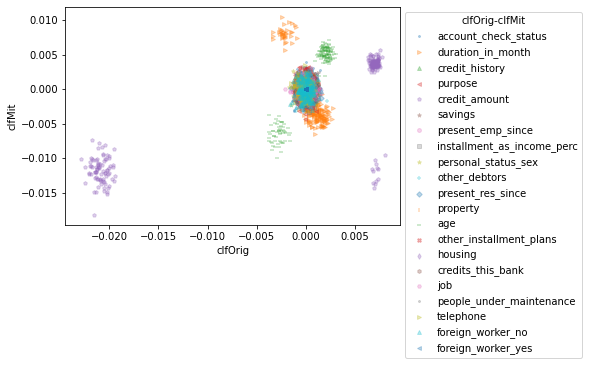

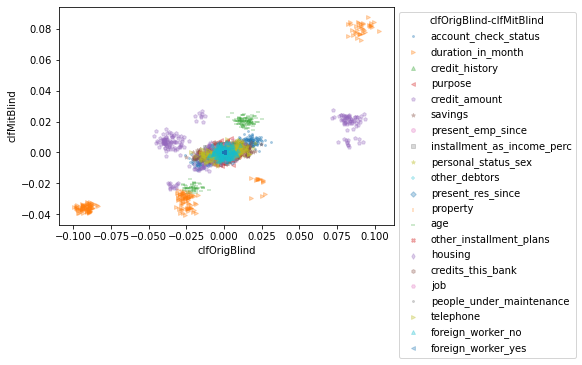

In [50]:
XAIPlots(lime_v,column_names,diffClfs=True)

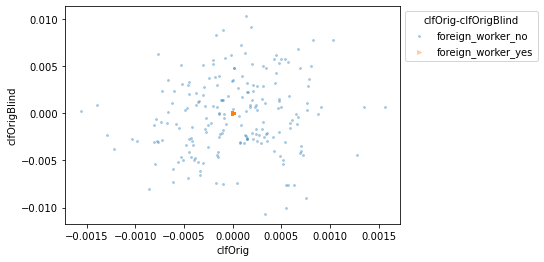

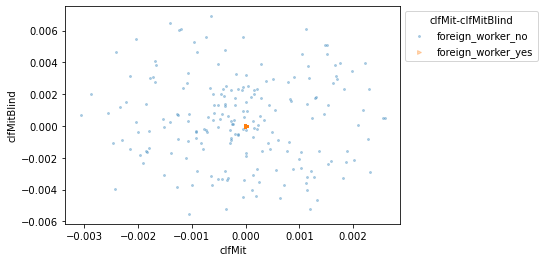

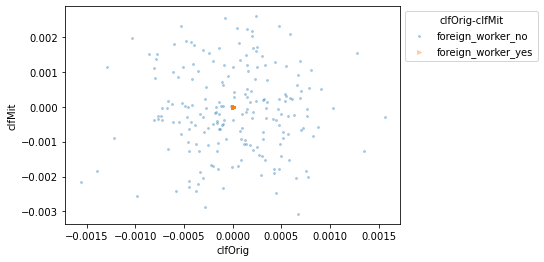

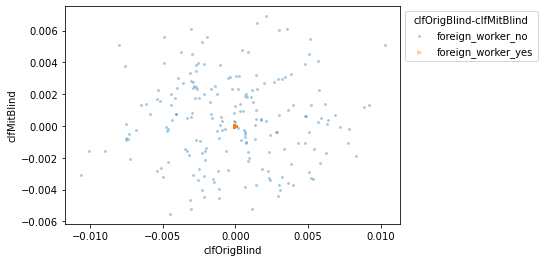

In [51]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [52]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [53]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [54]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -0.013849      -0.032391   
duration_in_month                  0.222070      -0.741889   
credit_history                     0.003713      -0.006726   
purpose                            0.002233      -0.149337   
credit_amount                      0.238824       1.635398   
savings                            0.000198      -0.027335   
present_emp_since                  0.000165       0.004182   
installment_as_income_perc        -0.000925       0.031625   
personal_status_sex               -0.022753       0.001294   
other_debtors                      0.010808       0.000843   
present_res_since                  0.003776      -0.004132   
property                          -0.000272       0.020020   
age                                0.161219       0.384888   
other_installment_plans            0.000000       0.004230   
housing                           -0.000054       0.001798   
credits_this_bank                  0.001536       0.003577   
job                               -0.000647       0.034128   
people_under_maintenance           0.005862       0.007473   
telephone                         -0.005178       0.007281   
foreign_worker_no                  0.000000       0.000554   
foreign_worker_yes                 0.000000      -0.003641   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -0.537365                 0.228547  
duration_in_month                           -7.590186                -2.884657  
credit_history                               0.113064                 0.053085  
purpose                                      0.018658                -0.346768  
credit_amount                               11.346470                 5.813295  
savings                                      1.026188                -0.057046  
present_emp_since                            0.019869                 0.042159  
installment_as_income_perc                   0.012429                 0.019296  
personal_status_sex                          0.706881                 0.192501  
other_debtors                                0.219823                 0.043161  
present_res_since                           -0.401895                -0.082944  
property                                    -0.194300                 0.015786  
age                                          2.339835                 1.744653  
other_installment_plans                      0.003063                 0.002579  
housing                                      0.520930                 0.038152  
credits_this_bank                            0.067587                 0.004103  
job                                          0.240469                 0.096776  
people_under_maintenance                     0.182423                 0.017782  
telephone                                    0.756608                 0.215761  
foreign_worker_no                           -0.004095                 0.001776  
foreign_worker_yes                           0.001292                 0.006639

In [55]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status           3.686580e-05       0.000079   
duration_in_month              9.121923e-05       0.000367   
credit_history                 1.441579e-05       0.000019   
purpose                        2.701171e-06       0.000087   
credit_amount                  1.450203e-04       0.000785   
savings                        1.675125e-05       0.000056   
present_emp_since              2.027649e-06       0.000016   
installment_as_income_perc     3.487409e-06       0.000044   
personal_status_sex            3.216364e-05       0.000037   
other_debtors                  9.051806e-06       0.000004   
present_res_since              5.091841e-06       0.000007   
property                       2.381376e-06       0.000016   
age                            7.883406e-05       0.000434   
other_installment_plans        0.000000e+00       0.000007   
housing                        1.994141e-06       0.000003   
credits_this_bank              1.159820e-05       0.000011   
job                            1.261097e-07       0.000028   
people_under_maintenance       2.740977e-06       0.000011   
telephone                      4.376583e-06       0.000031   
foreign_worker_no              0.000000e+00       0.000003   
foreign_worker_yes             0.000000e+00       0.000003   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.001023                 0.000392  
duration_in_month                            0.005033                 0.001122  
credit_history                               0.000692                 0.000220  
purpose                                      0.000272                 0.000343  
credit_amount                                0.001818                 0.002835  
savings                                      0.000736                 0.000317  
present_emp_since                            0.000188                 0.000199  
installment_as_income_perc                   0.000243                 0.000303  
personal_status_sex                          0.000625                 0.000307  
other_debtors                                0.000263                 0.000109  
present_res_since                            0.000593                 0.000214  
property                                     0.000536                 0.000074  
age                                          0.001037                 0.000615  
other_installment_plans                      0.000059                 0.000036  
housing                                      0.000388                 0.000111  
credits_this_bank                            0.000648                 0.000069  
job                                          0.000334                 0.000179  
people_under_maintenance                     0.000288                 0.000120  
telephone                                    0.000681                 0.000377  
foreign_worker_no                            0.000044                 0.000038  
foreign_worker_yes                           0.000032                 0.000036

In [56]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.000000       0.002097                   0.002693   
SA-Mean          0.000000       0.000003                   0.000038   
NSA-Sum          0.036531       0.163081                   1.384108   
NSA-Mean         0.000024       0.000107                   0.000813   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.004207  
SA-Mean                  0.000037  
NSA-Sum                  0.626266  
NSA-Mean                 0.000418

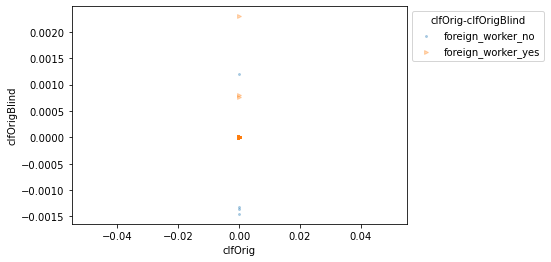

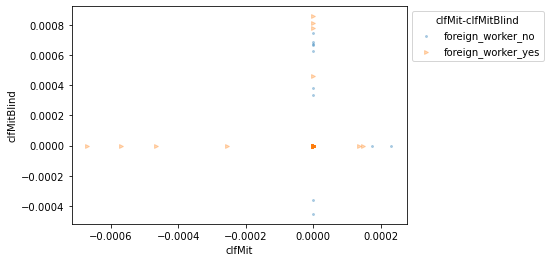

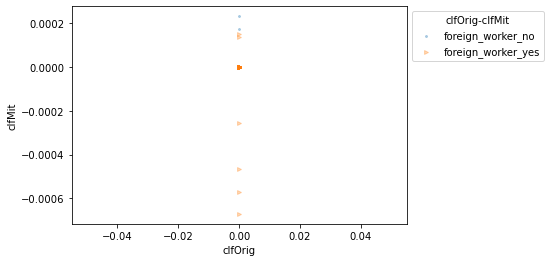

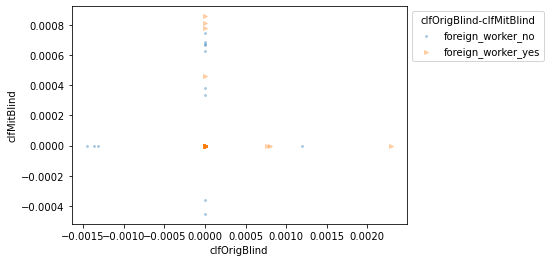

In [57]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [58]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [59]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [60]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.017702       0.089551   
duration_in_month                  0.196140      -0.602651   
credit_history                     0.034224      -0.010987   
purpose                           -0.004406       0.034924   
credit_amount                     -1.771739      -1.399667   
savings                            0.042016       0.060693   
present_emp_since                  0.009003       0.007389   
installment_as_income_perc         0.008942      -0.001865   
personal_status_sex                0.028060      -0.018675   
other_debtors                     -0.037432      -0.048698   
present_res_since                  0.002823      -0.004427   
property                          -0.015325      -0.007500   
age                                0.167987       0.492730   
other_installment_plans            0.002486       0.021951   
housing                            0.039698      -0.021537   
credits_this_bank                  0.013643       0.016004   
job                                0.007648       0.010325   
people_under_maintenance           0.008436      -0.029168   
telephone                         -0.016181      -0.014651   
foreign_worker_no                  0.004102      -0.004752   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.976517                 0.404700  
duration_in_month                          -10.576989                -4.868659  
credit_history                              -0.345466                 0.084091  
purpose                                     -0.228805                 0.064441  
credit_amount                                3.209941                 3.275443  
savings                                      1.478570                 0.305544  
present_emp_since                            0.183914                -0.024158  
installment_as_income_perc                  -0.091713                 0.004350  
personal_status_sex                         -0.180262                -0.064920  
other_debtors                               -0.883663                -0.179999  
present_res_since                           -0.116000                -0.028220  
property                                     0.101455                -0.001424  
age                                          1.049022                 1.965186  
other_installment_plans                     -0.148226                -0.049682  
housing                                     -1.733928                 0.031809  
credits_this_bank                            0.386450                 0.035980  
job                                         -0.078274                 0.023469  
people_under_maintenance                    -0.122946                -0.038865  
telephone                                    0.645391                 0.132223  
foreign_worker_no                           -0.094444                 0.125402  
foreign_worker_yes                           0.000000                 0.000000

In [61]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.000002       0.001198   
duration_in_month                  0.000002       0.001505   
credit_history                     0.000002       0.001214   
purpose                            0.000002       0.001019   
credit_amount                      0.000002       0.001328   
savings                            0.000002       0.001186   
present_emp_since                  0.000002       0.001128   
installment_as_income_perc         0.000001       0.001138   
personal_status_sex                0.000002       0.001109   
other_debtors                      0.000002       0.001168   
present_res_since                  0.000002       0.001144   
property                           0.000002       0.001143   
age                                0.000002       0.001229   
other_installment_plans            0.000002       0.001093   
housing                            0.000002       0.001111   
credits_this_bank                  0.000054       0.001122   
job                                0.000002       0.001097   
people_under_maintenance           0.000002       0.001101   
telephone                          0.000002       0.001223   
foreign_worker_no                  0.000002       0.001445   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000020                 0.002450  
duration_in_month                            0.000022                 0.002373  
credit_history                               0.000020                 0.002334  
purpose                                      0.000020                 0.002490  
credit_amount                                0.000020                 0.005011  
savings                                      0.000022                 0.002541  
present_emp_since                            0.000024                 0.002336  
installment_as_income_perc                   0.000021                 0.002517  
personal_status_sex                          0.000021                 0.002517  
other_debtors                                0.000021                 0.002386  
present_res_since                            0.000022                 0.002294  
property                                     0.000022                 0.002549  
age                                          0.000022                 0.002699  
other_installment_plans                      0.000020                 0.002082  
housing                                      0.000021                 0.002424  
credits_this_bank                            0.000022                 0.002358  
job                                          0.000021                 0.002421  
people_under_maintenance                     0.000022                 0.002478  
telephone                                    0.000021                 0.002225  
foreign_worker_no                            0.000762                 0.002907  
foreign_worker_yes                           0.000000                 0.000000

In [62]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum       2.051063e-03       0.002376                   0.047222   
SA-Mean      9.130267e-07       0.000723                   0.000381   
NSA-Sum      1.275733e-01       0.152284                   1.186186   
NSA-Mean     4.472921e-06       0.001171                   0.000021   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.062701  
SA-Mean                  0.001453  
NSA-Sum                  0.609640  
NSA-Mean                 0.002552

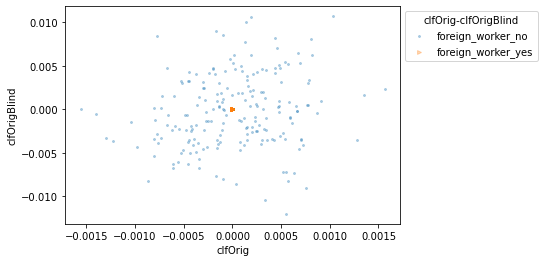

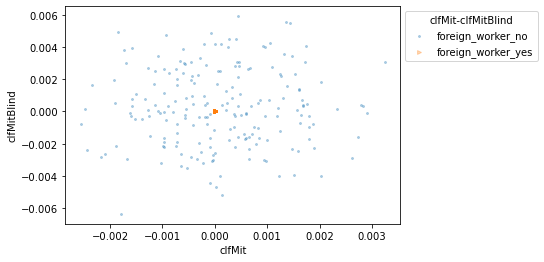

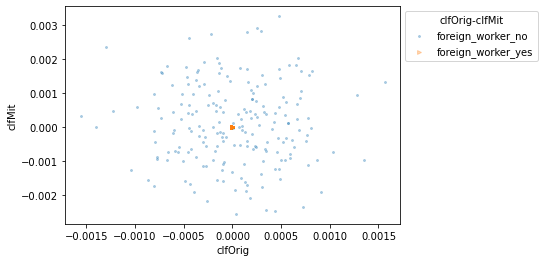

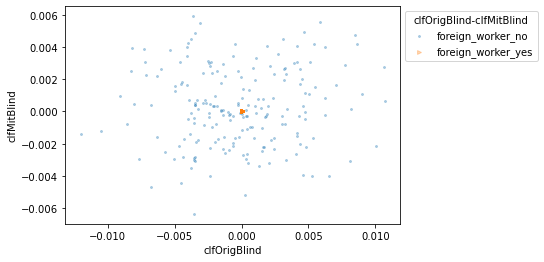

In [63]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [64]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [65]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_RF_Performances.csv')
res

Original Train Dimension = 800
Mitigated Train Dimension = 800
Test Dimension = 200
---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 165 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 168 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 162 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 159 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.725000            0.720000       0.710000   
Precision           0.580000            0.601429       0.545714   
Recall              0.243939            0.242424       0.225758   
F1 Score            0.340980            0.337598       0.313578   
Discrimination      0.136126            0.151832       0.120419   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.725000         CLF Original    0.005000   
Precision                  0.546032   CLF Original Blind    0.021429   
Recall                     0.310606  CLF Mitigated Blind    0.001515   
F1 Score                   0.391512  CLF Mitigated Blind    0.003383   
Discrimination             0.167539        CLF Mitigated    0.015707   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.015000   0.015000     0.005000  
Precision         0.000317   0.034286     0.055397  
Recall            0.084848   0.018182     0.068182  
F1 Score          0.077934   0.027402     0.053914  
Discrimination    0.047120   0.015707     0.015707

In [66]:

PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [67]:
PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [68]:
res = pd.read_csv(path_res+'US_RF_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.725000            0.720000       0.710000   
Precision           0.580000            0.601429       0.545714   
Recall              0.243939            0.242424       0.225758   
F1 Score            0.340980            0.337598       0.313578   
Discrimination      0.136126            0.151832       0.120419   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.725000         CLF Original    0.005000   
Precision                  0.546032   CLF Original Blind    0.021429   
Recall                     0.310606  CLF Mitigated Blind    0.001515   
F1 Score                   0.391512  CLF Mitigated Blind    0.003383   
Discrimination             0.167539        CLF Mitigated    0.015707   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.015000   0.015000     0.005000  
Precision         0.000317   0.034286     0.055397  
Recall            0.084848   0.018182     0.068182  
F1 Score          0.077934   0.027402     0.053914  
Discrimination    0.047120   0.015707     0.015707

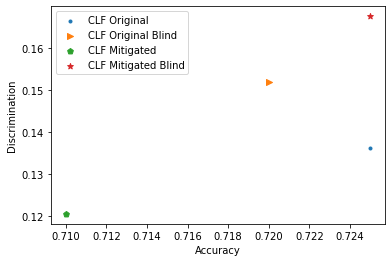

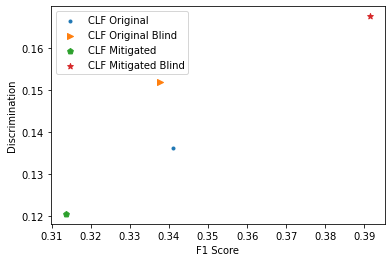

In [69]:
plotDisc(res)

In [70]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 9 instances.
    * "('foreign_worker_yes',)" grouping has 191 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 8 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 134 data points.
        - The class *Bad* has 57 data points.


In [71]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


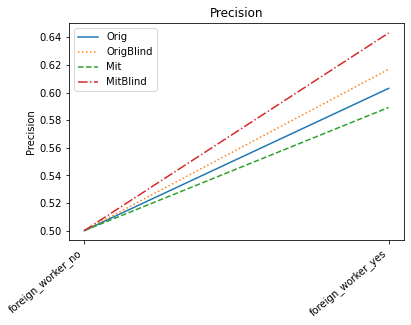

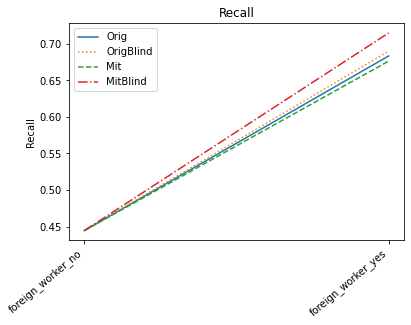

In [72]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [73]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [74]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [75]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [76]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.136676           -1.241046   
duration_in_month                       0.034765            0.084943   
credit_history                          0.320198            0.289766   
purpose                                 0.344478            0.296657   
credit_amount                          -0.551850           -0.737476   
savings                                -0.081087           -0.011054   
present_emp_since                      -0.158970           -0.128140   
installment_as_income_perc              0.008787           -0.032307   
personal_status_sex                    -0.069534           -0.067417   
other_debtors                           0.011048            0.035243   
present_res_since                       0.004300           -0.010168   
property                               -0.001471           -0.003030   
age                                     0.155119            0.142348   
other_installment_plans                -0.023115           -0.044491   
housing                                 0.101106            0.157797   
credits_this_bank                      -0.022927           -0.023388   
job                                     0.027848            0.045843   
people_under_maintenance                0.034242            0.039799   
telephone                              -0.014390            0.003997   
foreign_worker_no                      -0.017647           -0.003776   
foreign_worker_yes                     -0.013579           -0.004064   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.099204                 -1.278518  
duration_in_month                 0.008315                  0.111392  
credit_history                    0.308252                  0.301711  
purpose                           0.318233                  0.322902  
credit_amount                    -0.649198                 -0.640129  
savings                          -0.034033                 -0.058108  
present_emp_since                -0.109625                 -0.177486  
installment_as_income_perc       -0.000419                 -0.023101  
personal_status_sex              -0.082535                 -0.054417  
other_debtors                     0.013395                  0.032896  
present_res_since                -0.006266                  0.000399  
property                          0.002758                 -0.007259  
age                               0.157226                  0.140241  
other_installment_plans          -0.025436                 -0.042170  
housing                           0.143129                  0.115774  
credits_this_bank                -0.023028                 -0.023287  
job                               0.034219                  0.039472  
people_under_maintenance          0.027123                  0.046917  
telephone                        -0.003220                 -0.007173  
foreign_worker_no                -0.021423                  0.000000  
foreign_worker_yes               -0.017643                  0.000000

In [77]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.013859            0.015994   
duration_in_month                       0.007793            0.015361   
credit_history                          0.008460            0.004030   
purpose                                 0.001674            0.007998   
credit_amount                           0.007218            0.010962   
savings                                 0.004531            0.004928   
present_emp_since                       0.002372            0.007088   
installment_as_income_perc              0.002968            0.002478   
personal_status_sex                     0.002295            0.002380   
other_debtors                           0.001006            0.001391   
present_res_since                       0.001310            0.001369   
property                                0.001968            0.003840   
age                                     0.006572            0.004775   
other_installment_plans                 0.000780            0.001588   
housing                                 0.003256            0.001277   
credits_this_bank                       0.001403            0.002542   
job                                     0.002050            0.003077   
people_under_maintenance                0.000633            0.001346   
telephone                               0.003002            0.002547   
foreign_worker_no                       0.001765            0.000378   
foreign_worker_yes                      0.001358            0.000406   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.011004                  0.013260  
duration_in_month                 0.008743                  0.016153  
credit_history                    0.005779                  0.005201  
purpose                           0.004758                  0.005463  
credit_amount                     0.007883                  0.014166  
savings                           0.005526                  0.006063  
present_emp_since                 0.005826                  0.004530  
installment_as_income_perc        0.004642                  0.001858  
personal_status_sex               0.002256                  0.001454  
other_debtors                     0.001398                  0.001760  
present_res_since                 0.002157                  0.001603  
property                          0.004323                  0.001376  
age                               0.006304                  0.003928  
other_installment_plans           0.001944                  0.002288  
housing                           0.001733                  0.004739  
credits_this_bank                 0.002160                  0.001489  
job                               0.002697                  0.003418  
people_under_maintenance          0.000079                  0.000799  
telephone                         0.002051                  0.002848  
foreign_worker_no                 0.001387                  0.000000  
foreign_worker_yes                0.000951                  0.000000

In [78]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.015613            0.003920        0.019533   
SA-Mean               0.001561            0.000392        0.001169   
NSA-Sum               0.163259            0.178679        0.160295   
NSA-Mean              0.003850            0.004998        0.004277   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   0.180176  
NSA-Mean                  0.004863

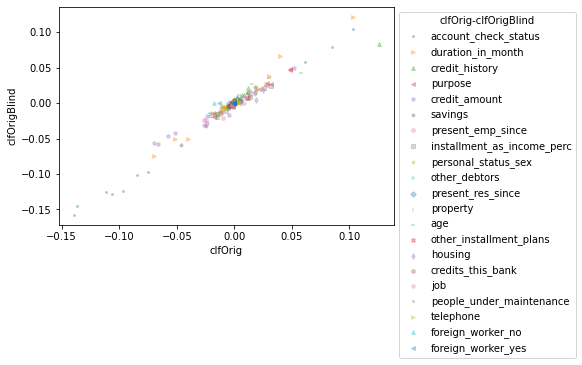

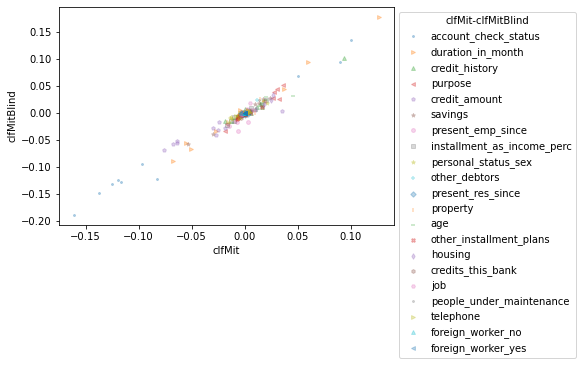

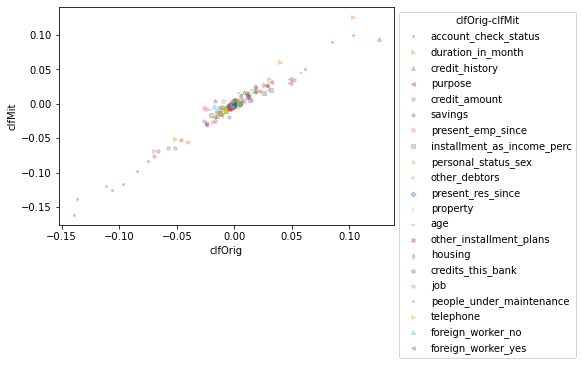

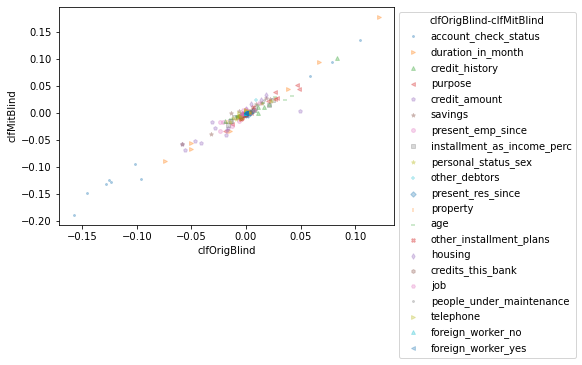

In [79]:
XAIPlots(shap_v,column_names,diffClfs=True)

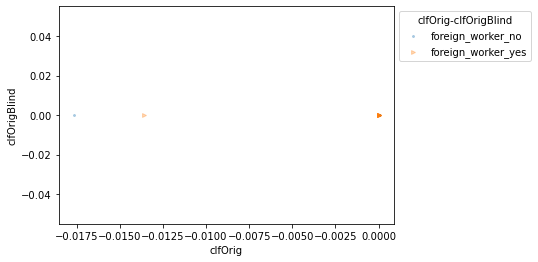

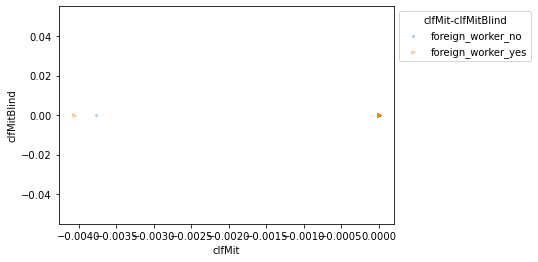

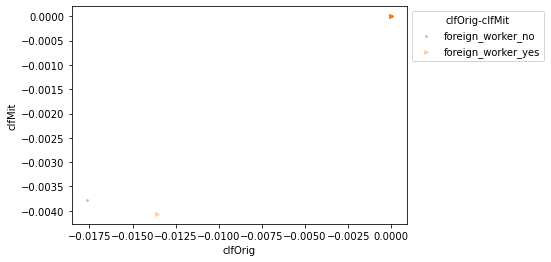

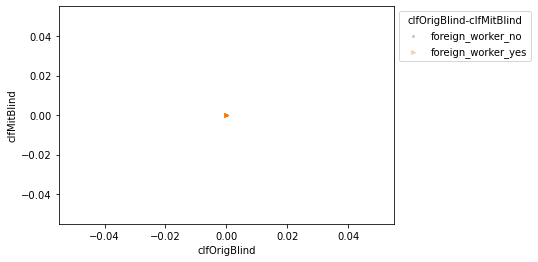

In [80]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [81]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [82]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [83]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [84]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.877787           -1.354041   
duration_in_month                       1.022667            1.066229   
credit_history                         -0.783548           -0.959425   
purpose                                -0.211442           -0.055735   
credit_amount                           0.206872            0.335200   
savings                                -0.114222           -0.295689   
present_emp_since                       0.370950            0.560107   
installment_as_income_perc             -0.571473           -0.642038   
personal_status_sex                     0.354057            0.356861   
other_debtors                           0.132646            0.258026   
present_res_since                      -0.182865           -0.062637   
property                                0.200768            0.349238   
age                                     1.296229            1.332613   
other_installment_plans                 0.216171            0.172940   
housing                                 0.006683           -0.012101   
credits_this_bank                      -0.090609           -0.056342   
job                                     0.144998            0.223300   
people_under_maintenance                0.141708            0.167063   
telephone                               0.027198            0.014904   
foreign_worker_no                       0.003489           -0.023478   
foreign_worker_yes                      0.034730            0.008364   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.169049                 -1.062778  
duration_in_month                 1.281604                  0.807292  
credit_history                   -0.720008                 -1.022964  
purpose                          -0.135610                 -0.131567  
credit_amount                     0.330911                  0.211161  
savings                          -0.164930                 -0.244981  
present_emp_since                 0.557288                  0.373768  
installment_as_income_perc       -0.694624                 -0.518887  
personal_status_sex               0.402067                  0.308852  
other_debtors                     0.110596                  0.280076  
present_res_since                -0.083265                 -0.162237  
property                          0.183780                  0.366227  
age                               1.271576                  1.357266  
other_installment_plans           0.152447                  0.236664  
housing                          -0.075304                  0.069886  
credits_this_bank                -0.076900                 -0.070051  
job                               0.182856                  0.185441  
people_under_maintenance          0.106331                  0.202439  
telephone                         0.061017                 -0.018915  
foreign_worker_no                -0.019989                  0.000000  
foreign_worker_yes                0.043093                  0.000000

In [85]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.006328            0.014087   
duration_in_month                       0.005652            0.010500   
credit_history                          0.004463            0.004225   
purpose                                 0.003609            0.006150   
credit_amount                           0.007429            0.005833   
savings                                 0.003507            0.004866   
present_emp_since                       0.002733            0.003338   
installment_as_income_perc              0.004390            0.002370   
personal_status_sex                     0.002136            0.002336   
other_debtors                           0.000820            0.001528   
present_res_since                       0.002440            0.002166   
property                                0.003086            0.003866   
age                                     0.004357            0.005092   
other_installment_plans                 0.001720            0.002876   
housing                                 0.002332            0.001852   
credits_this_bank                       0.001793            0.002300   
job                                     0.001697            0.002073   
people_under_maintenance                0.000981            0.001320   
telephone                               0.002564            0.001680   
foreign_worker_no                       0.001768            0.000424   
foreign_worker_yes                      0.002124            0.000468   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.005640                  0.011777  
duration_in_month                 0.007176                  0.011032  
credit_history                    0.003839                  0.004795  
purpose                           0.003707                  0.005274  
credit_amount                     0.008453                  0.007542  
savings                           0.004364                  0.005195  
present_emp_since                 0.003628                  0.004221  
installment_as_income_perc        0.004192                  0.002582  
personal_status_sex               0.002730                  0.002462  
other_debtors                     0.001207                  0.001252  
present_res_since                 0.002220                  0.002318  
property                          0.004324                  0.002559  
age                               0.003998                  0.004111  
other_installment_plans           0.003419                  0.002001  
housing                           0.001851                  0.002103  
credits_this_bank                 0.001942                  0.001835  
job                               0.002205                  0.002182  
people_under_maintenance          0.000861                  0.001220  
telephone                         0.002281                  0.001801  
foreign_worker_no                 0.001479                  0.000000  
foreign_worker_yes                0.001764                  0.000000

In [86]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix_Tree.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.019109            0.015921        0.031541   
SA-Mean               0.001946            0.000446        0.001621   
NSA-Sum               0.365942            0.435499        0.408430   
NSA-Mean              0.003265            0.004129        0.003581   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   0.401655  
NSA-Mean                  0.004014

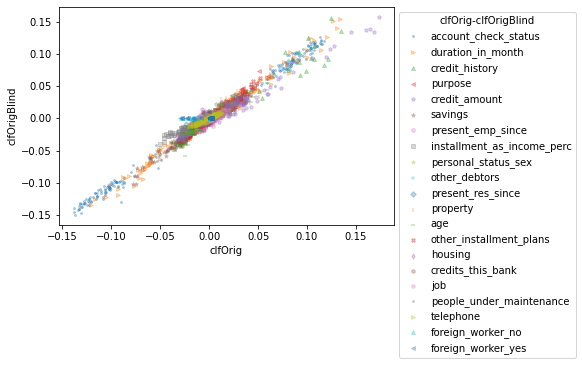

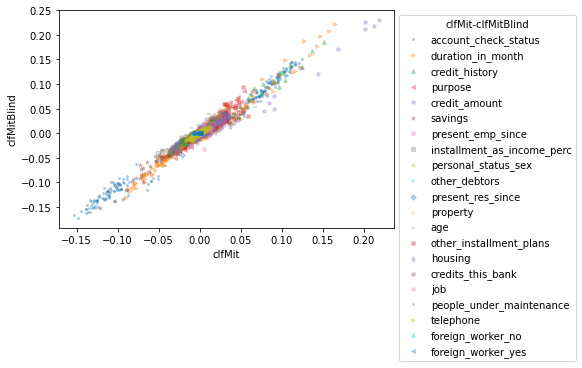

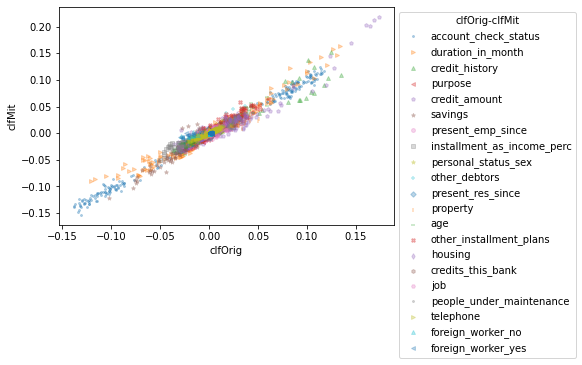

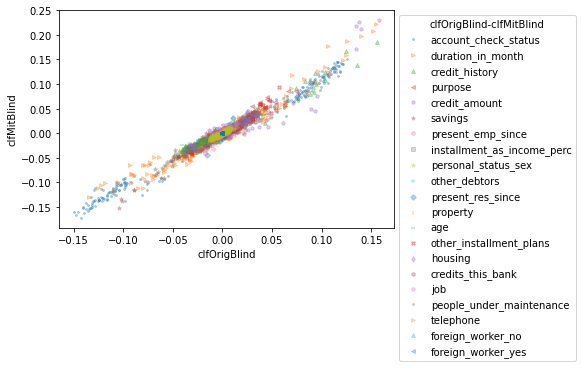

In [87]:
XAIPlots(shap_v,column_names,diffClfs=True)

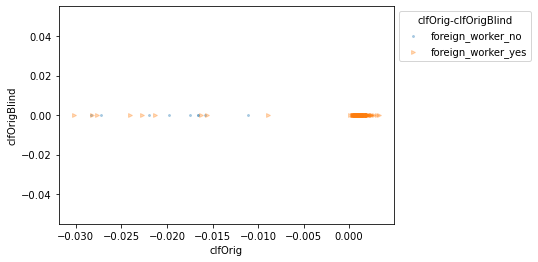

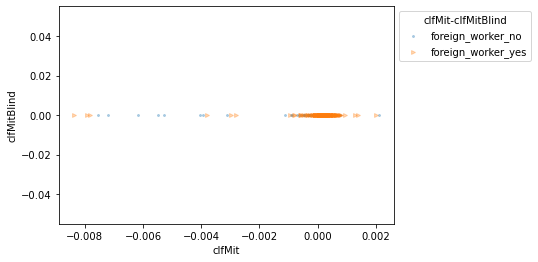

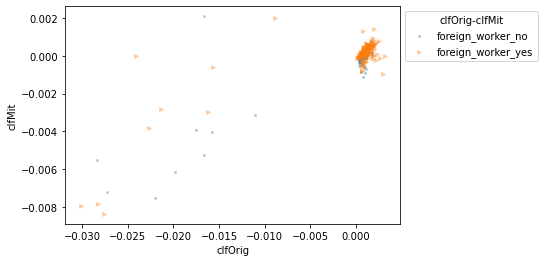

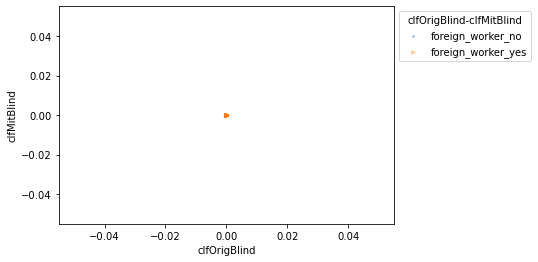

In [88]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [89]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [90]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [91]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [92]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.618332            0.139493   
duration_in_month                      -6.339099          -10.693424   
credit_history                          4.049982            4.914978   
purpose                                 2.998198            3.361685   
credit_amount                         -12.545193          -14.046098   
savings                                 2.506626            2.805254   
present_emp_since                      -0.480422           -0.336749   
installment_as_income_perc              0.308862            0.347577   
personal_status_sex                     0.103539            0.665622   
other_debtors                           1.411595            0.755418   
present_res_since                       0.232894            0.585265   
property                                1.161430            0.897045   
age                                     3.031982            2.970281   
other_installment_plans                -1.277887           -1.452759   
housing                                -0.618129           -0.515466   
credits_this_bank                      -0.012598            0.090734   
job                                    -0.473134           -0.275732   
people_under_maintenance               -0.088512           -0.125715   
telephone                               0.037563            0.493609   
foreign_worker_no                       0.191804            0.003489   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              1.127580                 -0.369755  
duration_in_month                -7.731686                 -9.300836  
credit_history                    4.204216                  4.760745  
purpose                           2.965616                  3.394267  
credit_amount                   -14.091732                -12.499559  
savings                           2.121875                  3.190005  
present_emp_since                -0.298001                 -0.519169  
installment_as_income_perc        0.364533                  0.291906  
personal_status_sex               0.386189                  0.382972  
other_debtors                     0.705150                  1.461863  
present_res_since                 0.350608                  0.467550  
property                          1.209932                  0.848542  
age                               3.076720                  2.925544  
other_installment_plans          -1.395982                 -1.334664  
housing                          -0.607283                 -0.526312  
credits_this_bank                -0.040381                  0.118517  
job                              -0.384109                 -0.364756  
people_under_maintenance         -0.067791                 -0.146436  
telephone                         0.259817                  0.271355  
foreign_worker_no                 0.161666                  0.033627  
foreign_worker_yes                0.000000                  0.000000

In [93]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.012071            0.028444   
duration_in_month                       0.008096            0.016572   
credit_history                          0.004251            0.006051   
purpose                                 0.005474            0.007007   
credit_amount                           0.008003            0.010218   
savings                                 0.005380            0.012201   
present_emp_since                       0.004360            0.005532   
installment_as_income_perc              0.005682            0.004597   
personal_status_sex                     0.003988            0.005675   
other_debtors                           0.004085            0.004815   
present_res_since                       0.004531            0.004771   
property                                0.003669            0.004422   
age                                     0.004941            0.005737   
other_installment_plans                 0.003870            0.004544   
housing                                 0.003811            0.004677   
credits_this_bank                       0.003954            0.006420   
job                                     0.004012            0.004730   
people_under_maintenance                0.003894            0.004692   
telephone                               0.004601            0.004749   
foreign_worker_no                       0.004320            0.005131   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.012439                  0.028840  
duration_in_month                 0.016766                  0.023928  
credit_history                    0.004314                  0.005263  
purpose                           0.004634                  0.006891  
credit_amount                     0.011235                  0.008273  
savings                           0.004470                  0.010783  
present_emp_since                 0.005324                  0.004603  
installment_as_income_perc        0.006517                  0.004385  
personal_status_sex               0.004798                  0.004833  
other_debtors                     0.004015                  0.004739  
present_res_since                 0.004268                  0.004773  
property                          0.004548                  0.004704  
age                               0.004999                  0.005678  
other_installment_plans           0.004484                  0.004343  
housing                           0.004140                  0.004514  
credits_this_bank                 0.004705                  0.005184  
job                               0.004379                  0.004467  
people_under_maintenance          0.003985                  0.004536  
telephone                         0.004538                  0.005121  
foreign_worker_no                 0.004068                  0.004776  
foreign_worker_yes                0.000000                  0.000000

In [94]:
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.095902            0.001744        0.080833   
SA-Mean               0.002160            0.002565        0.002034   
NSA-Sum               2.015578            2.393311        2.178379   
NSA-Mean              0.005193            0.007677        0.006029   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.016813  
SA-Mean                   0.002388  
NSA-Sum                   2.272355  
NSA-Mean                  0.007677

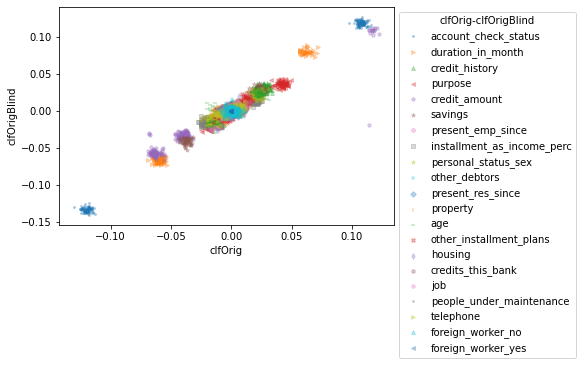

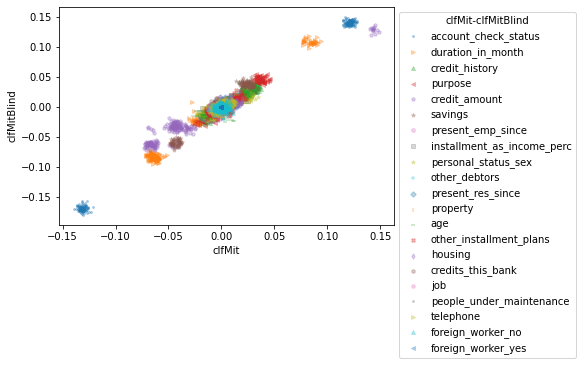

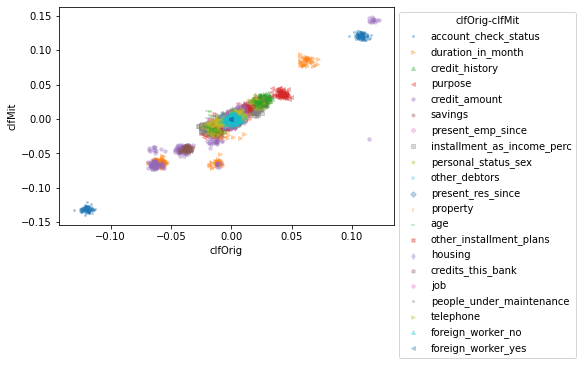

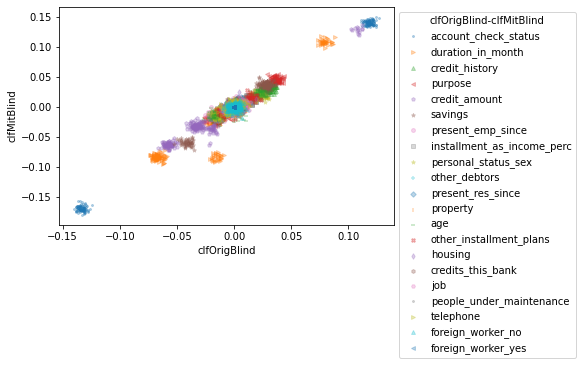

In [95]:
XAIPlots(lime_v,column_names,diffClfs=True)

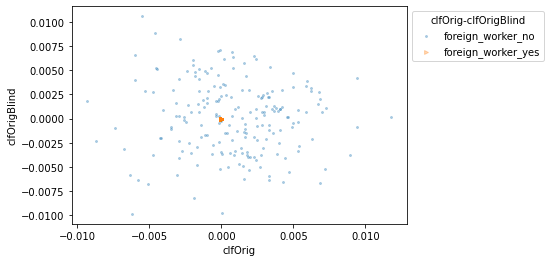

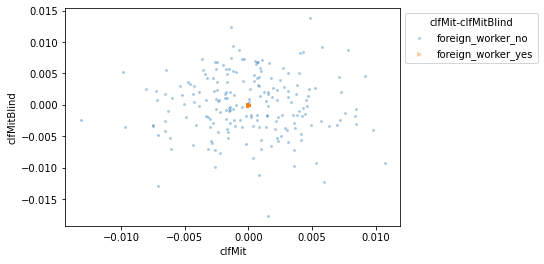

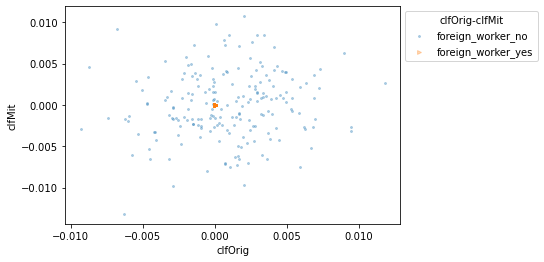

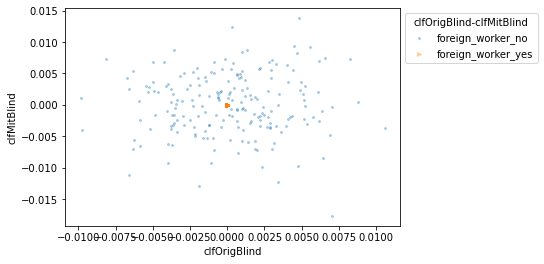

In [96]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [97]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [98]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [99]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [100]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -7.439780           -3.270996   
duration_in_month                      -6.643542           -6.370889   
credit_history                          2.661550            2.599353   
purpose                                 4.012054            4.609161   
credit_amount                         -11.906752          -13.141049   
savings                                -1.684642           -1.999881   
present_emp_since                      -1.840073           -1.755999   
installment_as_income_perc              1.323503            0.998333   
personal_status_sex                     0.649758            1.041326   
other_debtors                           0.296031            0.594017   
present_res_since                      -0.142904            0.222168   
property                                0.876288            0.380462   
age                                     3.525407            3.628316   
other_installment_plans                 1.229228            1.234100   
housing                                 1.735293            1.861587   
credits_this_bank                      -0.349376           -0.225595   
job                                     0.021085            0.126229   
people_under_maintenance                0.595739            0.650964   
telephone                              -0.580109           -0.292011   
foreign_worker_no                      -0.155704           -0.022172   
foreign_worker_yes                     -0.170578           -0.041484   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -4.587671                 -6.123106  
duration_in_month                -6.295461                 -6.718970  
credit_history                    2.781032                  2.479871  
purpose                           4.026748                  4.594467  
credit_amount                   -13.699646                -11.348155  
savings                          -1.625701                 -2.058822  
present_emp_since                -1.414753                 -2.181319  
installment_as_income_perc        1.092566                  1.229269  
personal_status_sex               0.843258                  0.847826  
other_debtors                     0.451433                  0.438616  
present_res_since                 0.021391                  0.057873  
property                          0.556660                  0.700089  
age                               3.555017                  3.598706  
other_installment_plans           1.245673                  1.217655  
housing                           1.965440                  1.631440  
credits_this_bank                -0.353009                 -0.221962  
job                               0.163937                 -0.016623  
people_under_maintenance          0.514537                  0.732166  
telephone                        -0.371599                 -0.500521  
foreign_worker_no                -0.178904                  0.001028  
foreign_worker_yes               -0.212063                  0.000000

In [101]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.015608            0.016303   
duration_in_month                       0.007224            0.012215   
credit_history                          0.005087            0.003910   
purpose                                 0.003204            0.007082   
credit_amount                           0.008477            0.009450   
savings                                 0.004077            0.005320   
present_emp_since                       0.002674            0.003721   
installment_as_income_perc              0.004702            0.002686   
personal_status_sex                     0.002659            0.003326   
other_debtors                           0.000553            0.000978   
present_res_since                       0.002592            0.002328   
property                                0.003284            0.003223   
age                                     0.004361            0.004771   
other_installment_plans                 0.001535            0.002487   
housing                                 0.002541            0.001748   
credits_this_bank                       0.001644            0.003484   
job                                     0.002185            0.001860   
people_under_maintenance                0.000645            0.001328   
telephone                               0.002463            0.002080   
foreign_worker_no                       0.000785            0.000168   
foreign_worker_yes                      0.000853            0.000207   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.006794                  0.023370  
duration_in_month                 0.007168                  0.011337  
credit_history                    0.004629                  0.004821  
purpose                           0.003837                  0.006495  
credit_amount                     0.009498                  0.008496  
savings                           0.004577                  0.005112  
present_emp_since                 0.004132                  0.003810  
installment_as_income_perc        0.005450                  0.002999  
personal_status_sex               0.003620                  0.003007  
other_debtors                     0.000756                  0.001188  
present_res_since                 0.002985                  0.002511  
property                          0.004075                  0.002694  
age                               0.003949                  0.004152  
other_installment_plans           0.002629                  0.002481  
housing                           0.001785                  0.002146  
credits_this_bank                 0.002353                  0.002267  
job                               0.002116                  0.002257  
people_under_maintenance          0.000656                  0.000999  
telephone                         0.002241                  0.001853  
foreign_worker_no                 0.000673                  0.000005  
foreign_worker_yes                0.000645                  0.000000

In [102]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.163141            0.031828        0.195483   
SA-Mean               0.000819            0.000188        0.000659   
NSA-Sum               2.500690            2.368549        2.398186   
NSA-Mean              0.003974            0.004647        0.003855   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000514  
SA-Mean                   0.000003  
NSA-Sum                   2.457761  
NSA-Mean                  0.004842

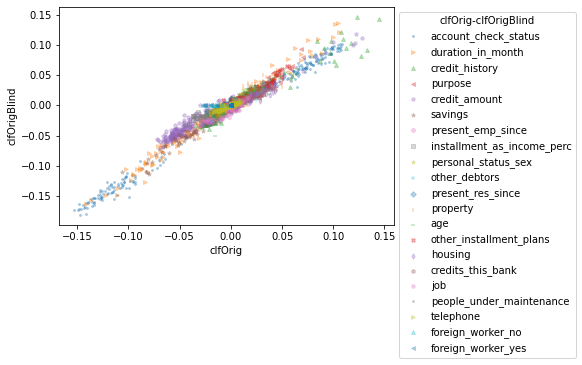

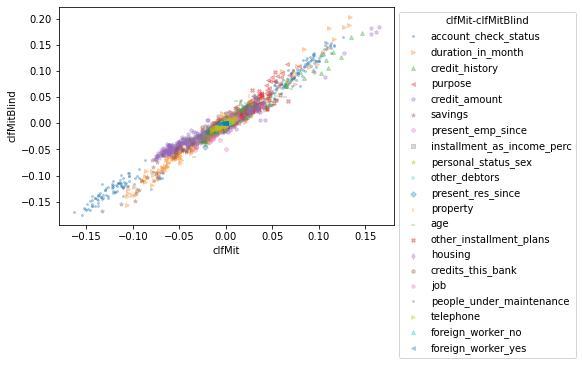

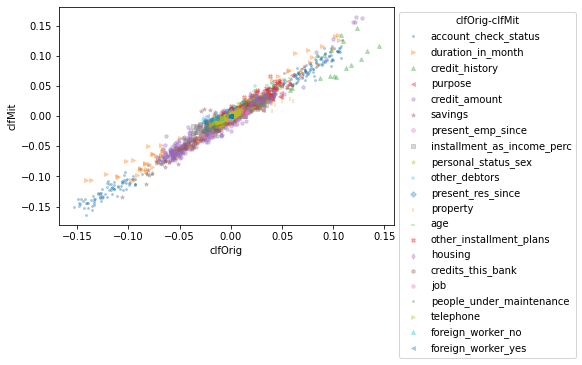

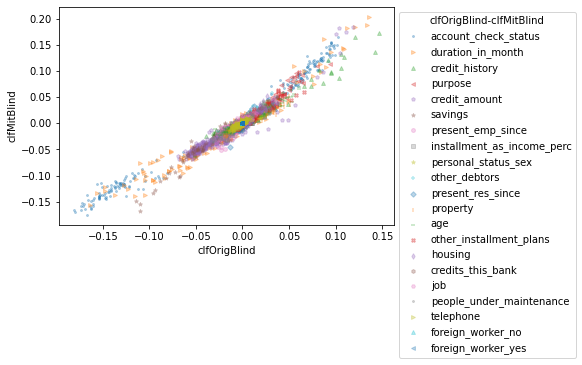

In [103]:
XAIPlots(shap_v,column_names,diffClfs=True)

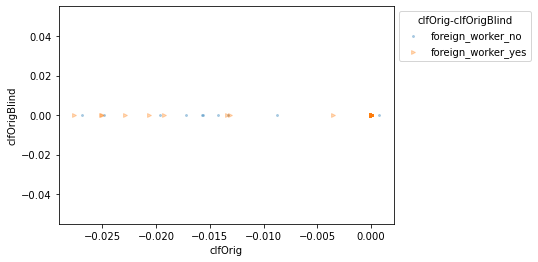

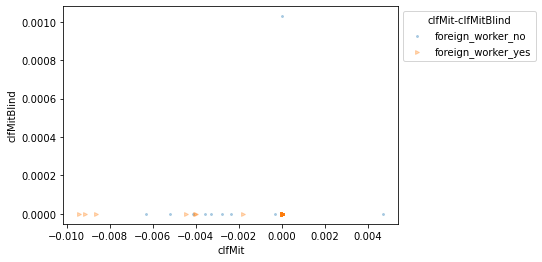

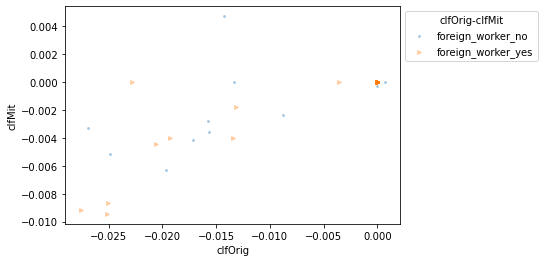

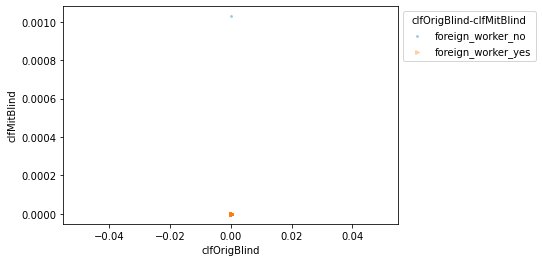

In [104]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [105]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [106]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [107]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [108]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.877787           -1.354041   
duration_in_month                       1.022667            1.066229   
credit_history                         -0.783548           -0.959425   
purpose                                -0.211442           -0.055735   
credit_amount                           0.206872            0.335200   
savings                                -0.114222           -0.295689   
present_emp_since                       0.370950            0.560107   
installment_as_income_perc             -0.571473           -0.642038   
personal_status_sex                     0.354057            0.356861   
other_debtors                           0.132646            0.258026   
present_res_since                      -0.182865           -0.062637   
property                                0.200768            0.349238   
age                                     1.296229            1.332613   
other_installment_plans                 0.216171            0.172940   
housing                                 0.006683           -0.012101   
credits_this_bank                      -0.090609           -0.056342   
job                                     0.144998            0.223300   
people_under_maintenance                0.141708            0.167063   
telephone                               0.027198            0.014904   
foreign_worker_no                       0.003489           -0.023478   
foreign_worker_yes                      0.034730            0.008364   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.169049                 -1.062778  
duration_in_month                 1.281604                  0.807292  
credit_history                   -0.720008                 -1.022964  
purpose                          -0.135610                 -0.131567  
credit_amount                     0.330911                  0.211161  
savings                          -0.164930                 -0.244981  
present_emp_since                 0.557288                  0.373768  
installment_as_income_perc       -0.694624                 -0.518887  
personal_status_sex               0.402067                  0.308852  
other_debtors                     0.110596                  0.280076  
present_res_since                -0.083265                 -0.162237  
property                          0.183780                  0.366227  
age                               1.271576                  1.357266  
other_installment_plans           0.152447                  0.236664  
housing                          -0.075304                  0.069886  
credits_this_bank                -0.076900                 -0.070051  
job                               0.182856                  0.185441  
people_under_maintenance          0.106331                  0.202439  
telephone                         0.061017                 -0.018915  
foreign_worker_no                -0.019989                  0.000000  
foreign_worker_yes                0.043093                  0.000000

In [109]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.006328            0.014087   
duration_in_month                       0.005652            0.010500   
credit_history                          0.004463            0.004225   
purpose                                 0.003609            0.006150   
credit_amount                           0.007429            0.005833   
savings                                 0.003507            0.004866   
present_emp_since                       0.002733            0.003338   
installment_as_income_perc              0.004390            0.002370   
personal_status_sex                     0.002136            0.002336   
other_debtors                           0.000820            0.001528   
present_res_since                       0.002440            0.002166   
property                                0.003086            0.003866   
age                                     0.004357            0.005092   
other_installment_plans                 0.001720            0.002876   
housing                                 0.002332            0.001852   
credits_this_bank                       0.001793            0.002300   
job                                     0.001697            0.002073   
people_under_maintenance                0.000981            0.001320   
telephone                               0.002564            0.001680   
foreign_worker_no                       0.001768            0.000424   
foreign_worker_yes                      0.002124            0.000468   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.005640                  0.011777  
duration_in_month                 0.007176                  0.011032  
credit_history                    0.003839                  0.004795  
purpose                           0.003707                  0.005274  
credit_amount                     0.008453                  0.007542  
savings                           0.004364                  0.005195  
present_emp_since                 0.003628                  0.004221  
installment_as_income_perc        0.004192                  0.002582  
personal_status_sex               0.002730                  0.002462  
other_debtors                     0.001207                  0.001252  
present_res_since                 0.002220                  0.002318  
property                          0.004324                  0.002559  
age                               0.003998                  0.004111  
other_installment_plans           0.003419                  0.002001  
housing                           0.001851                  0.002103  
credits_this_bank                 0.001942                  0.001835  
job                               0.002205                  0.002182  
people_under_maintenance          0.000861                  0.001220  
telephone                         0.002281                  0.001801  
foreign_worker_no                 0.001479                  0.000000  
foreign_worker_yes                0.001764                  0.000000

In [110]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change_Tree.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.019109            0.015921        0.031541   
SA-Mean               0.001946            0.000446        0.001621   
NSA-Sum               0.365942            0.435499        0.408430   
NSA-Mean              0.003265            0.004129        0.003581   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   0.401655  
NSA-Mean                  0.004014

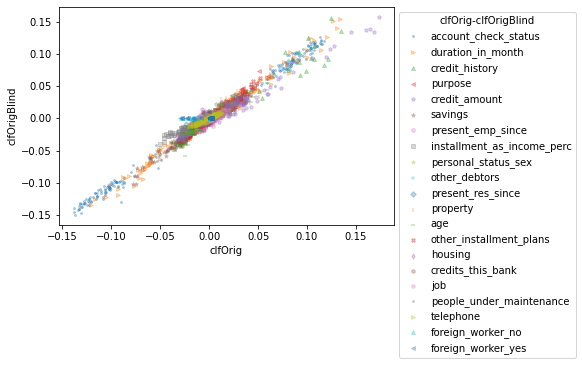

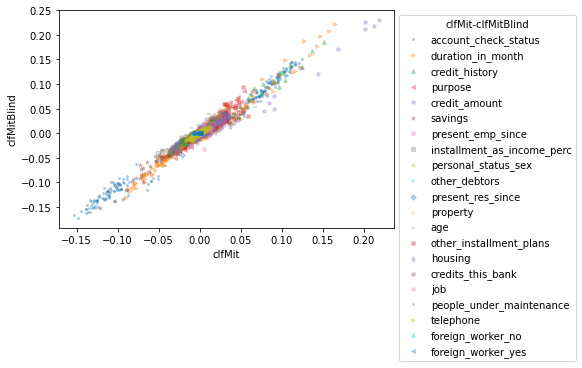

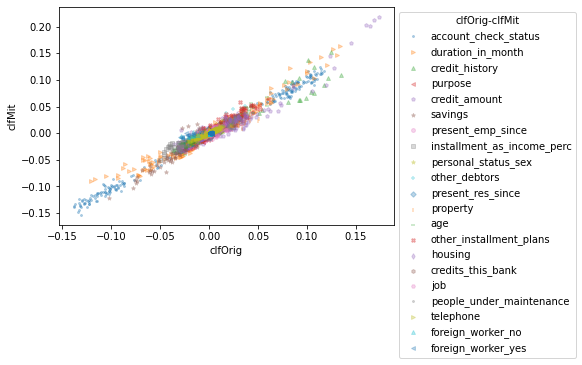

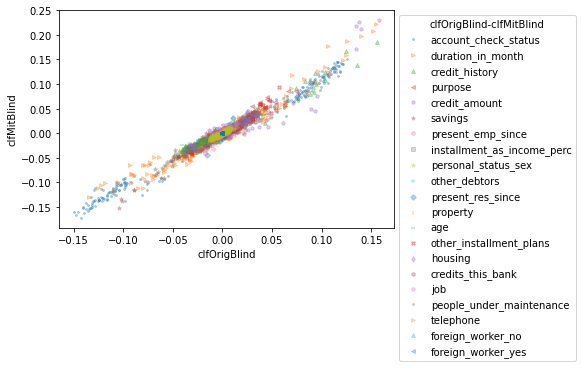

In [111]:
XAIPlots(shap_v,column_names,diffClfs=True)

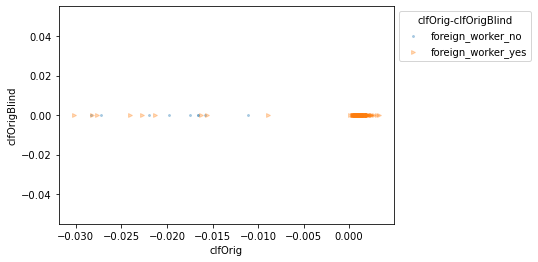

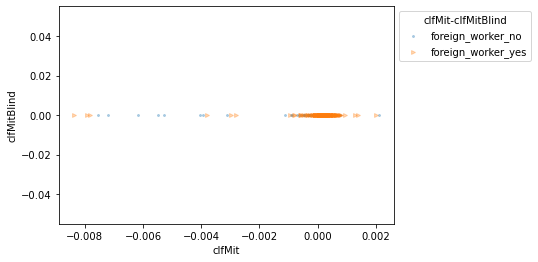

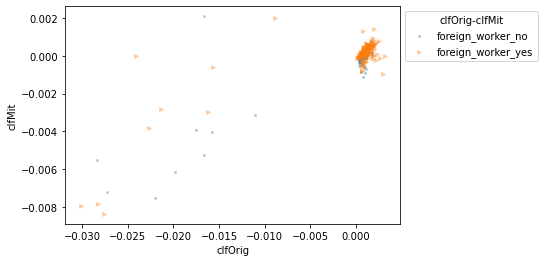

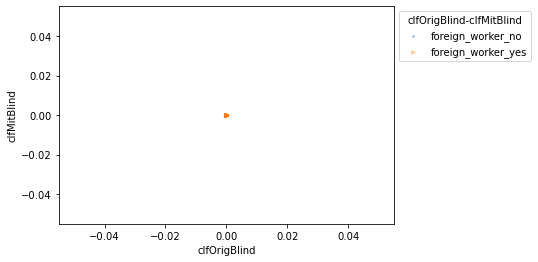

In [112]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [113]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [114]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [115]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [116]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.618395           -1.239706   
duration_in_month                      -6.339051          -10.538229   
credit_history                          4.050065            4.481414   
purpose                                 2.998156            3.148331   
credit_amount                         -12.545817          -14.314349   
savings                                 2.506776            2.836524   
present_emp_since                      -0.480571           -0.089740   
installment_as_income_perc              0.308707            0.163926   
personal_status_sex                     0.103163            0.766076   
other_debtors                           1.411699            0.722034   
present_res_since                       0.232996            0.532910   
property                                1.161111            1.184303   
age                                     3.031747            3.312011   
other_installment_plans                -1.277841           -3.139026   
housing                                -0.617967           -0.770211   
credits_this_bank                      -0.015537            0.049278   
job                                    -0.473118           -0.395206   
people_under_maintenance               -0.088547           -0.010603   
telephone                               0.037557           -0.052553   
foreign_worker_no                       0.191647            0.093412   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.389766                 -0.231544  
duration_in_month                -7.628399                 -9.248880  
credit_history                    4.158653                  4.372825  
purpose                           2.909715                  3.236772  
credit_amount                   -14.099489                -12.760677  
savings                           2.224549                  3.118751  
present_emp_since                -0.116121                 -0.454189  
installment_as_income_perc        0.229566                  0.243067  
personal_status_sex               0.428852                  0.440387  
other_debtors                     0.831376                  1.302357  
present_res_since                 0.312701                  0.453206  
property                          1.265276                  1.080137  
age                               2.991804                  3.351953  
other_installment_plans          -2.050472                 -2.366395  
housing                          -0.803656                 -0.584523  
credits_this_bank                 0.081594                 -0.047854  
job                              -0.330140                 -0.538185  
people_under_maintenance          0.000333                 -0.099483  
telephone                         0.056236                 -0.071232  
foreign_worker_no                 0.192105                  0.092954  
foreign_worker_yes                0.000000                  0.000000

In [117]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.012069            0.034094   
duration_in_month                       0.008096            0.019115   
credit_history                          0.004251            0.005659   
purpose                                 0.005475            0.009655   
credit_amount                           0.008003            0.006938   
savings                                 0.005382            0.011118   
present_emp_since                       0.004359            0.004902   
installment_as_income_perc              0.005681            0.004560   
personal_status_sex                     0.003985            0.004902   
other_debtors                           0.004086            0.004340   
present_res_since                       0.004534            0.003915   
property                                0.003669            0.004584   
age                                     0.004940            0.005671   
other_installment_plans                 0.003871            0.005148   
housing                                 0.003811            0.004415   
credits_this_bank                       0.004008            0.007312   
job                                     0.004012            0.004926   
people_under_maintenance                0.003894            0.004775   
telephone                               0.004602            0.004654   
foreign_worker_no                       0.004320            0.005611   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.009169                  0.030427  
duration_in_month                 0.015059                  0.025412  
credit_history                    0.004306                  0.005021  
purpose                           0.005050                  0.010176  
credit_amount                     0.010882                  0.010668  
savings                           0.004948                  0.010651  
present_emp_since                 0.004987                  0.004804  
installment_as_income_perc        0.005461                  0.004422  
personal_status_sex               0.004698                  0.004665  
other_debtors                     0.003943                  0.005155  
present_res_since                 0.004097                  0.004291  
property                          0.004853                  0.004672  
age                               0.004860                  0.005266  
other_installment_plans           0.005783                  0.007293  
housing                           0.003800                  0.004667  
credits_this_bank                 0.005220                  0.005843  
job                               0.004634                  0.004392  
people_under_maintenance          0.004044                  0.004347  
telephone                         0.004274                  0.004638  
foreign_worker_no                 0.004385                  0.005111  
foreign_worker_yes                0.000000                  0.000000

In [118]:
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.095824            0.046706        0.096053   
SA-Mean               0.002160            0.002805        0.002193   
NSA-Sum               2.015727            2.512970        2.153089   
NSA-Mean              0.005196            0.007931        0.005793   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.046477  
SA-Mean                   0.002556  
NSA-Sum                   2.315917  
NSA-Mean                  0.008253

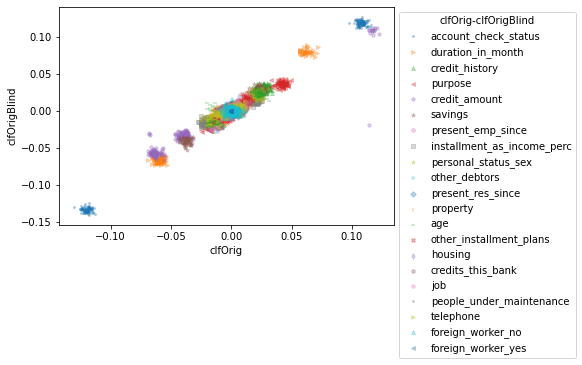

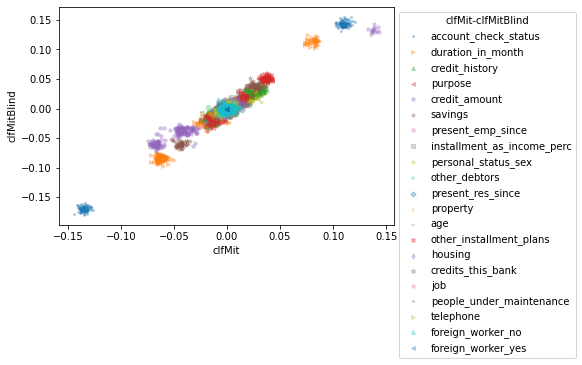

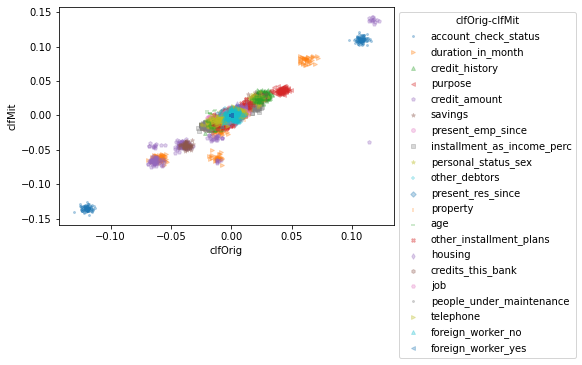

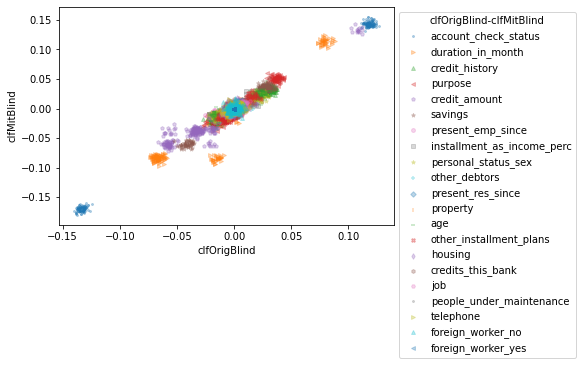

In [119]:
XAIPlots(lime_v,column_names,diffClfs=True)

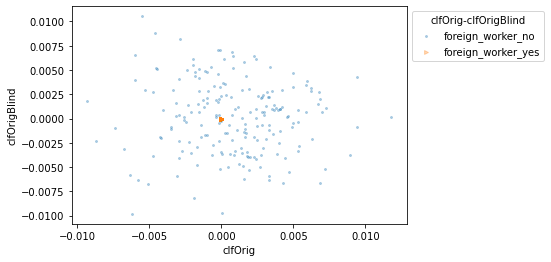

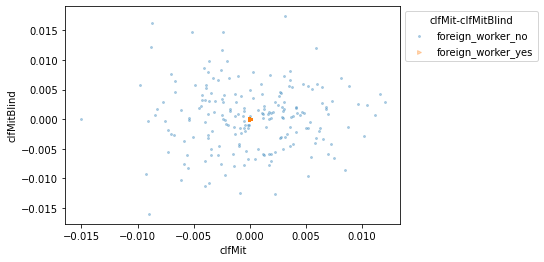

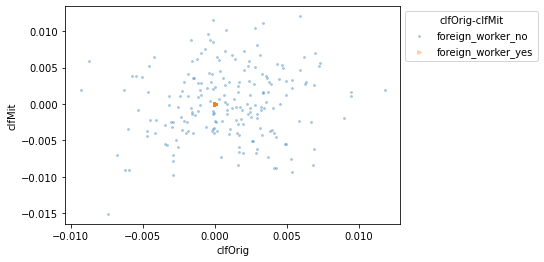

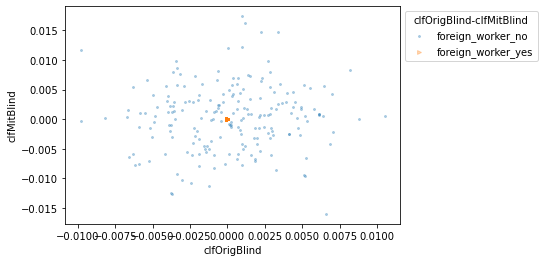

In [120]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [121]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [122]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [123]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -0.975386      -1.147932   
duration_in_month                  0.008781       0.030287   
credit_history                     0.348566       0.274375   
purpose                            0.357724       0.295120   
credit_amount                     -0.578302      -0.718716   
savings                           -0.061127      -0.024878   
present_emp_since                 -0.151967      -0.059717   
installment_as_income_perc         0.017861      -0.030917   
personal_status_sex               -0.080166      -0.081311   
other_debtors                      0.004348       0.024382   
present_res_since                 -0.005422      -0.005027   
property                          -0.006329       0.010803   
age                                0.165860       0.149734   
other_installment_plans           -0.018880      -0.035963   
housing                            0.126767       0.152280   
credits_this_bank                 -0.034422      -0.012387   
job                                0.049730       0.018671   
people_under_maintenance           0.028382       0.026723   
telephone                         -0.008349       0.009332   
foreign_worker_no                 -0.034822      -0.007908   
foreign_worker_yes                -0.026978      -0.008077   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -1.352274                -1.171297  
duration_in_month                            0.073319                 0.174168  
credit_history                               0.279579                 0.297329  
purpose                                      0.322349                 0.328323  
credit_amount                               -0.543614                -0.711040  
savings                                     -0.092963                -0.038636  
present_emp_since                           -0.162596                -0.194289  
installment_as_income_perc                  -0.011764                -0.027062  
personal_status_sex                         -0.061345                -0.049549  
other_debtors                                0.019475                 0.046470  
present_res_since                            0.014177                -0.011839  
property                                    -0.002050                -0.014165  
age                                          0.149082                 0.145985  
other_installment_plans                     -0.032804                -0.053133  
housing                                      0.077030                 0.155082  
credits_this_bank                           -0.010908                -0.037464  
job                                          0.006079                 0.073654  
people_under_maintenance                     0.039618                 0.055819  
telephone                                   -0.017227                 0.010021  
foreign_worker_no                            0.000000                 0.000000  
foreign_worker_yes                           0.000000                 0.000000

In [124]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.002474       0.005035   
duration_in_month                  0.001771       0.000539   
credit_history                     0.001246       0.000628   
purpose                            0.000559       0.001136   
credit_amount                      0.000533       0.000681   
savings                            0.000781       0.001449   
present_emp_since                  0.000654       0.000422   
installment_as_income_perc         0.001174       0.000441   
personal_status_sex                0.000297       0.000350   
other_debtors                      0.000493       0.000267   
present_res_since                  0.000395       0.000240   
property                           0.000363       0.000299   
age                                0.000585       0.000580   
other_installment_plans            0.000289       0.000277   
housing                            0.000330       0.000482   
credits_this_bank                  0.000194       0.000301   
job                                0.000221       0.000321   
people_under_maintenance           0.000047       0.000039   
telephone                          0.000306       0.000436   
foreign_worker_no                  0.000047       0.000036   
foreign_worker_yes                 0.000018       0.000005   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.007904                 0.011251  
duration_in_month                            0.000556                 0.002984  
credit_history                               0.002316                 0.000669  
purpose                                      0.001390                 0.001877  
credit_amount                                0.001562                 0.004102  
savings                                      0.001237                 0.002949  
present_emp_since                            0.000498                 0.000598  
installment_as_income_perc                   0.000224                 0.000845  
personal_status_sex                          0.000330                 0.000644  
other_debtors                                0.000163                 0.000179  
present_res_since                            0.000165                 0.000403  
property                                     0.000522                 0.000391  
age                                          0.000246                 0.001492  
other_installment_plans                      0.000346                 0.000265  
housing                                      0.000427                 0.000549  
credits_this_bank                            0.000126                 0.000266  
job                                          0.000255                 0.000273  
people_under_maintenance                     0.000095                 0.000256  
telephone                                    0.000078                 0.000991  
foreign_worker_no                            0.000000                 0.000000  
foreign_worker_yes                           0.000000                 0.000000

In [125]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.030900       0.007992                   0.000000   
SA-Mean          0.000033       0.000020                   0.000000   
NSA-Sum          0.159388       0.163608                   0.172013   
NSA-Mean         0.000669       0.000733                   0.000971   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000000  
SA-Mean                  0.000000  
NSA-Sum                  0.189228  
NSA-Mean                 0.001631

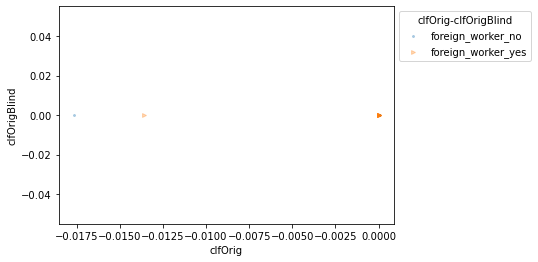

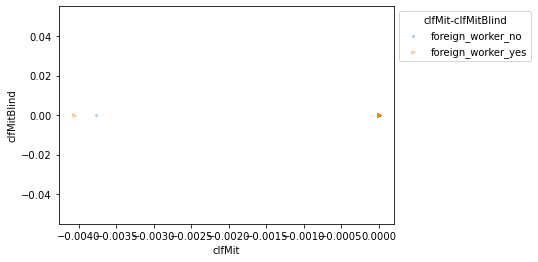

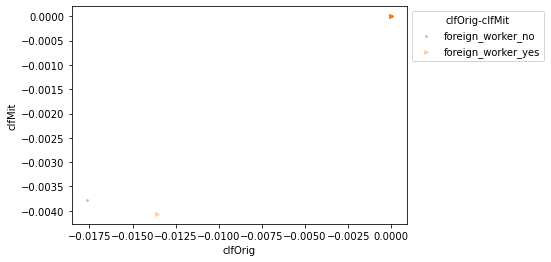

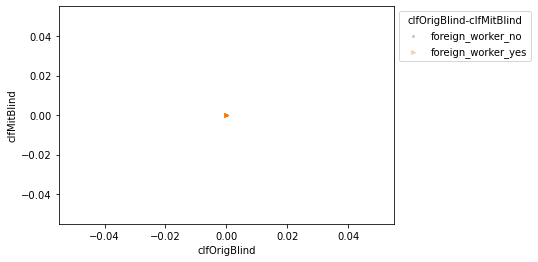

In [126]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [127]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [128]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [129]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -0.810282      -1.527817   
duration_in_month                  1.144267       1.418941   
credit_history                    -0.518191      -0.921825   
purpose                           -0.079758      -0.191462   
credit_amount                      0.324548       0.337273   
savings                           -0.104832      -0.225028   
present_emp_since                  0.472812       0.641765   
installment_as_income_perc        -0.665019      -0.724229   
personal_status_sex                0.387411       0.416722   
other_debtors                      0.088944       0.132248   
present_res_since                 -0.236045       0.069514   
property                           0.141160       0.226400   
age                                1.439623       1.103528   
other_installment_plans            0.243267       0.061627   
housing                           -0.097485      -0.053123   
credits_this_bank                 -0.068777      -0.085022   
job                                0.246886       0.118825   
people_under_maintenance           0.139298       0.073365   
telephone                          0.011436       0.110599   
foreign_worker_no                  0.006978      -0.046956   
foreign_worker_yes                 0.069460       0.016727   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -0.945292                -1.180265  
duration_in_month                            0.901067                 0.713516  
credit_history                              -1.048904                -0.997024  
purpose                                     -0.343127                 0.079993  
credit_amount                                0.089196                 0.333126  
savings                                     -0.123611                -0.366351  
present_emp_since                            0.269088                 0.478449  
installment_as_income_perc                  -0.477927                -0.559847  
personal_status_sex                          0.320704                 0.297000  
other_debtors                                0.176348                 0.383805  
present_res_since                           -0.129685                -0.194789  
property                                     0.260377                 0.472076  
age                                          1.152835                 1.561698  
other_installment_plans                      0.189075                 0.284253  
housing                                      0.110851                 0.028921  
credits_this_bank                           -0.112440                -0.027662  
job                                          0.043109                 0.327774  
people_under_maintenance                     0.144118                 0.260761  
telephone                                    0.042960                -0.080791  
foreign_worker_no                            0.000000                 0.000000  
foreign_worker_yes                           0.000000                 0.000000

In [130]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0            0.0   
duration_in_month                       0.0            0.0   
credit_history                          0.0            0.0   
purpose                                 0.0            0.0   
credit_amount                           0.0            0.0   
savings                                 0.0            0.0   
present_emp_since                       0.0            0.0   
installment_as_income_perc              0.0            0.0   
personal_status_sex                     0.0            0.0   
other_debtors                           0.0            0.0   
present_res_since                       0.0            0.0   
property                                0.0            0.0   
age                                     0.0            0.0   
other_installment_plans                 0.0            0.0   
housing                                 0.0            0.0   
credits_this_bank                       0.0            0.0   
job                                     0.0            0.0   
people_under_maintenance                0.0            0.0   
telephone                               0.0            0.0   
foreign_worker_no                       0.0            0.0   
foreign_worker_yes                      0.0            0.0   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                              0.0                      0.0  
duration_in_month                                 0.0                      0.0  
credit_history                                    0.0                      0.0  
purpose                                           0.0                      0.0  
credit_amount                                     0.0                      0.0  
savings                                           0.0                      0.0  
present_emp_since                                 0.0                      0.0  
installment_as_income_perc                        0.0                      0.0  
personal_status_sex                               0.0                      0.0  
other_debtors                                     0.0                      0.0  
present_res_since                                 0.0                      0.0  
property                                          0.0                      0.0  
age                                               0.0                      0.0  
other_installment_plans                           0.0                      0.0  
housing                                           0.0                      0.0  
credits_this_bank                                 0.0                      0.0  
job                                               0.0                      0.0  
people_under_maintenance                          0.0                      0.0  
telephone                                         0.0                      0.0  
foreign_worker_no                                 0.0                      0.0  
foreign_worker_yes                                0.0                      0.0

In [131]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.038219       0.031842                   0.000000   
SA-Mean          0.000000       0.000000                   0.000000   
NSA-Sum          0.380002       0.444174                   0.362143   
NSA-Mean         0.000000       0.000000                   0.000000   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000000  
SA-Mean                  0.000000  
NSA-Sum                  0.454111  
NSA-Mean                 0.000000

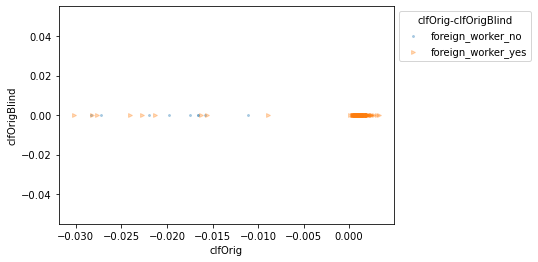

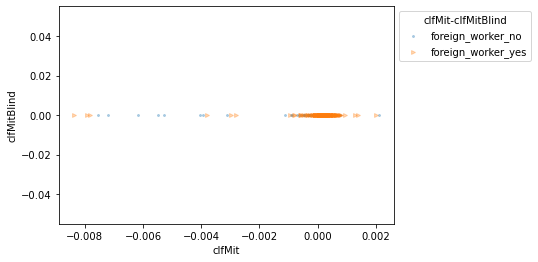

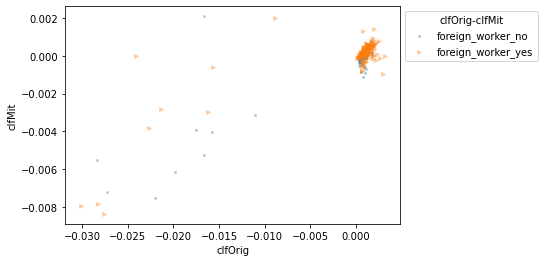

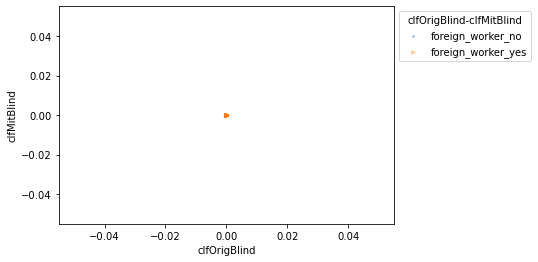

In [132]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [133]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [134]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [135]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.762660      -0.024846   
duration_in_month                 -6.039889      -9.320197   
credit_history                     3.749786       4.613083   
purpose                            3.035499       2.839833   
credit_amount                    -13.116804     -15.074417   
savings                            2.116890       2.229533   
present_emp_since                 -0.373960      -0.040162   
installment_as_income_perc         0.284325       0.309773   
personal_status_sex               -0.146356       0.961398   
other_debtors                      1.021659       0.514868   
present_res_since                  0.132257       0.531052   
property                           1.372222       1.102987   
age                                3.034896       3.033628   
other_installment_plans           -1.222837      -2.223617   
housing                           -0.580729      -0.830210   
credits_this_bank                 -0.077106       0.118319   
job                               -0.466944      -0.247305   
people_under_maintenance          -0.095325       0.027867   
telephone                          0.049647       0.266406   
foreign_worker_no                  0.334810       0.018961   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.474068                -1.075367  
duration_in_month                           -6.638261               -11.911455  
credit_history                               4.350260                 4.783309  
purpose                                      2.960855                 3.670184  
credit_amount                              -11.974206               -13.286031  
savings                                      2.896512                 3.412244  
present_emp_since                           -0.587033                -0.386326  
installment_as_income_perc                   0.333244                 0.201730  
personal_status_sex                          0.353058                 0.470300  
other_debtors                                1.801635                 0.962585  
present_res_since                            0.333633                 0.587123  
property                                     0.950319                 0.978361  
age                                          3.028832                 3.248665  
other_installment_plans                     -1.332891                -2.368168  
housing                                     -0.655367                -0.455467  
credits_this_bank                            0.048971                 0.021692  
job                                         -0.479308                -0.423633  
people_under_maintenance                    -0.081734                -0.164186  
telephone                                    0.025473                 0.174650  
foreign_worker_no                            0.048642                 0.077939  
foreign_worker_yes                           0.000000                 0.000000

In [136]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0       0.008074   
duration_in_month                       0.0       0.004648   
credit_history                          0.0       0.004443   
purpose                                 0.0       0.004331   
credit_amount                           0.0       0.003973   
savings                                 0.0       0.004060   
present_emp_since                       0.0       0.004120   
installment_as_income_perc              0.0       0.003962   
personal_status_sex                     0.0       0.004080   
other_debtors                           0.0       0.003980   
present_res_since                       0.0       0.004060   
property                                0.0       0.004007   
age                                     0.0       0.004408   
other_installment_plans                 0.0       0.004632   
housing                                 0.0       0.003984   
credits_this_bank                       0.0       0.004310   
job                                     0.0       0.004219   
people_under_maintenance                0.0       0.004174   
telephone                               0.0       0.004149   
foreign_worker_no                       0.0       0.004848   
foreign_worker_yes                      0.0       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000011                 0.004463  
duration_in_month                            0.000013                 0.005289  
credit_history                               0.000013                 0.005835  
purpose                                      0.000014                 0.005935  
credit_amount                                0.000013                 0.008052  
savings                                      0.000014                 0.005421  
present_emp_since                            0.000013                 0.005486  
installment_as_income_perc                   0.000013                 0.005181  
personal_status_sex                          0.000015                 0.005267  
other_debtors                                0.000014                 0.004989  
present_res_since                            0.000013                 0.004655  
property                                     0.000014                 0.005435  
age                                          0.000014                 0.006523  
other_installment_plans                      0.000011                 0.007600  
housing                                      0.000013                 0.004937  
credits_this_bank                            0.000377                 0.005196  
job                                          0.000014                 0.004913  
people_under_maintenance                     0.000012                 0.004874  
telephone                                    0.000014                 0.005343  
foreign_worker_no                            0.000015                 0.005706  
foreign_worker_yes                           0.000000                 0.000000

In [137]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.167405       0.009480                   0.024321   
SA-Mean          0.000000       0.002424                   0.000008   
NSA-Sum          1.983147       2.332079                   2.068719   
NSA-Mean         0.000000       0.004401                   0.000032   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.038970  
SA-Mean                  0.002853  
NSA-Sum                  2.556920  
NSA-Mean                 0.005547

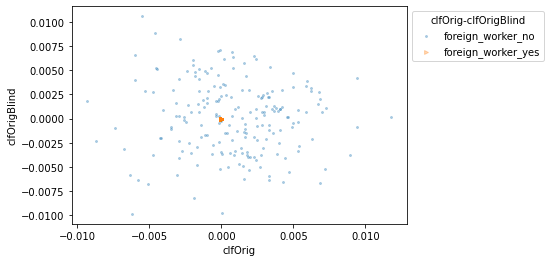

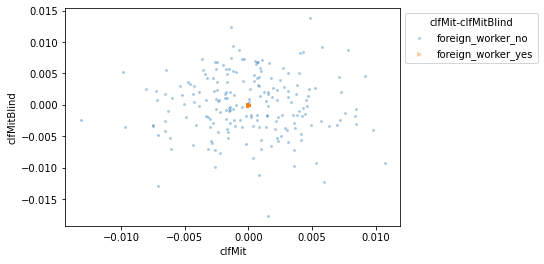

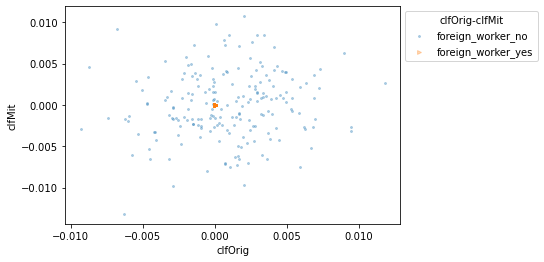

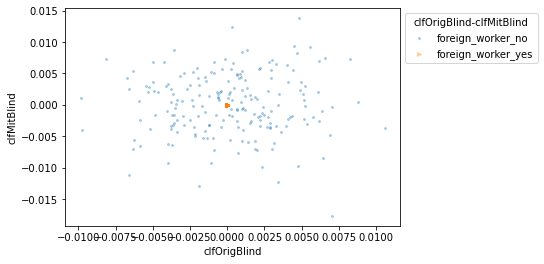

In [138]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

## Preferential Sampling

In [147]:
filename = 'german_credit.csv'
path_res = '/Users/Marta/FAccT/Res-GERMAN/'
path_data = 'datasets/'
sensitive = ['foreign_worker'] #OR personal_status_sex
df = prepare_german_dataset(filename, path_data, sensitive)

In [148]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['Good','Bad']
#There are two classes, 1 for good customers and 2 for bad customers
#in LORE 0 sta per 1 e 1 sta per 2, quindi 0 è good e 1 è bad  
adClass=0
disClass=1
protected = ['foreign_worker_no','foreign_worker_yes']
protected_feature='foreigners' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr=None
disAttr=None

In [149]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [150]:
findFreq(target,protected,df)

({'foreign_worker_no': 25, 'foreign_worker_yes': 533},
 {'foreign_worker_no': 3, 'foreign_worker_yes': 239})

In [151]:

ranker = rankers(X,X_blind,Y)

Non-Blind Rankers
GaussianNB(var_smoothing=1.519911082952933e-08)
LogisticRegression(C=0.012742749857031334, solver='liblinear')
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=500)


The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=0.1, gamma=1, probability=True)
Non-Blind Rankers Evaluation


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

           Gaussian Naive Bayes  Calibrated Gaussian Naive Bayes  \
Accuracy               0.715000                         0.720000   
Precision              0.537454                         0.568779   
Recall                 0.373333                         0.273333   
F1 Score               0.438013                         0.365332   

           Logistic Regression  Calibrated Logistic Regression  Random Forest  \
Accuracy              0.734000                        0.734000       0.744000   
Precision             0.634785                        0.630620       0.675692   
Recall                0.280000                        0.286667       0.296667   
F1 Score              0.385828                        0.391353       0.407419   

           Calibrated Random Forest  Support Vector Classifier  \
Accuracy                   0.757000                        0.7   
Precision                  0.662791                        0.0   
Recall                     0.400000                    

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=0.1, gamma=1, probability=True)
Blind Rankers Evaluation


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

           Blind Gaussian Naive Bayes  Blind Calibrated Gaussian Naive Bayes  \
Accuracy                     0.719000                               0.722000   
Precision                    0.560182                               0.578978   
Recall                       0.316667                               0.270000   
F1 Score                     0.400995                               0.364410   

           Blind Logistic Regression  Blind Calibrated Logistic Regression  \
Accuracy                    0.734000                              0.734000   
Precision                   0.634785                              0.630620   
Recall                      0.280000                              0.286667   
F1 Score                    0.385828                              0.391353   

           Blind Random Forest  Blind Calibrated Random Forest  \
Accuracy              0.743000                        0.758000   
Precision             0.646912                        0.665390   
Recall    

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [152]:

PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(ranker, f)

In [153]:
PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "rb") as f:
  ranker = pickle.load(f)

In [154]:
df_new=PreferentialSampling(target,protected,ranker,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'foreign_worker_no': 25, 'foreign_worker_yes': 533}
Counting labels = 1  {'foreign_worker_no': 3, 'foreign_worker_yes': 239}
DN  ('foreign_worker_yes', 239)
FP  ('foreign_worker_no', 25)
DP  ('foreign_worker_yes', 533)
FN  ('foreign_worker_no', 3)
Len DN_df  239
Len FP_df  25
Len DP_df  533
Len FN_df  3
Len restData 0


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


DN_expected  234
5 to be removed
Len DN_df after sampling  234
FP_expected  20
5 to be removed
Len FP_df after sampling  20
DP_expected  538
5 to add
Len DP_df after sampling  538
FN_expected  8
5 to add
Len FN_df after sampling  8


In [155]:
findFreq(target,protected,df_new)

({'foreign_worker_no': 20, 'foreign_worker_yes': 538},
 {'foreign_worker_no': 8, 'foreign_worker_yes': 234})

In [156]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,True)

### MLP

In [157]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [158]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_MLP_Performances.csv')
res

Original Train Dimension = 800
Mitigated Train Dimension = 800
Test Dimension = 200


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due t

---> CLF Original: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 191 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 191 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 183 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 191 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.725000            0.720000       0.690000   
Precision           0.325000            0.333333       0.333333   
Recall              0.107576            0.121212       0.119697   
F1 Score            0.136032            0.174603       0.170794   
Discrimination      0.000000            0.041885       0.000000   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.620000         CLF Original    0.005000   
Precision                  0.055000        CLF Mitigated    0.008333   
Recall                     0.200000  CLF Mitigated Blind    0.013636   
F1 Score                   0.086275   CLF Original Blind    0.038571   
Discrimination             0.000000         CLF Original    0.041885   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.070000   0.035000     0.100000  
Precision         0.278333   0.008333     0.278333  
Recall            0.080303   0.012121     0.078788  
F1 Score          0.084519   0.034761     0.088329  
Discrimination    0.000000   0.000000     0.041885

In [159]:

PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [160]:
PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [161]:
res = pd.read_csv(path_res+'PS_MLP_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.725000            0.720000       0.690000   
Precision           0.325000            0.333333       0.333333   
Recall              0.107576            0.121212       0.119697   
F1 Score            0.136032            0.174603       0.170794   
Discrimination      0.000000            0.041885       0.000000   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.620000         CLF Original    0.005000   
Precision                  0.055000        CLF Mitigated    0.008333   
Recall                     0.200000  CLF Mitigated Blind    0.013636   
F1 Score                   0.086275   CLF Original Blind    0.038571   
Discrimination             0.000000         CLF Original    0.041885   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.070000   0.035000     0.100000  
Precision         0.278333   0.008333     0.278333  
Recall            0.080303   0.012121     0.078788  
F1 Score          0.084519   0.034761     0.088329  
Discrimination    0.000000   0.000000     0.041885

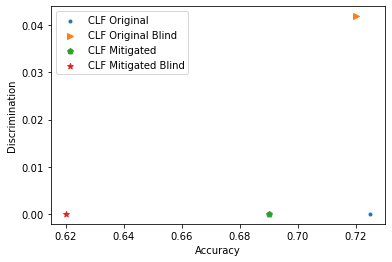

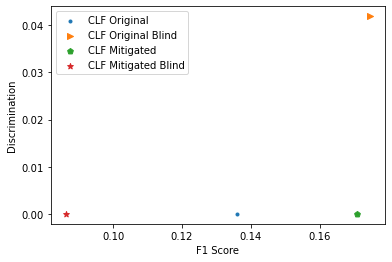

In [162]:
plotDisc(res)

In [163]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 9 instances.
    * "('foreign_worker_yes',)" grouping has 191 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 8 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 134 data points.
        - The class *Bad* has 57 data points.


In [164]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


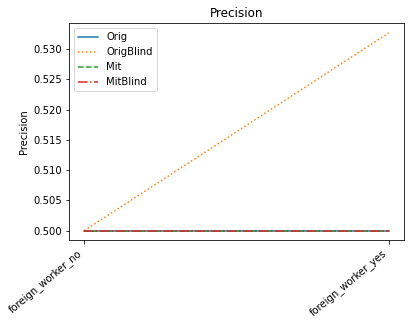

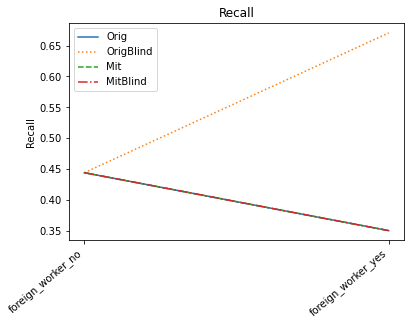

In [165]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [166]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [167]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [168]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [169]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.188851           -0.554714   
duration_in_month                      -3.343471           -2.302206   
credit_history                          0.059034           -0.004303   
purpose                                -0.409352           -0.531849   
credit_amount                          -5.557199           -1.065231   
savings                                 0.100259            0.000922   
present_emp_since                       0.000910            0.020565   
installment_as_income_perc              0.227316           -0.015190   
personal_status_sex                     0.234832            0.095058   
other_debtors                           0.072935           -0.010469   
present_res_since                       0.015661            0.010692   
property                                0.026831            0.052626   
age                                     2.927461            0.341781   
other_installment_plans                -0.037231            0.004075   
housing                                 0.048926            0.015809   
credits_this_bank                      -0.001359           -0.055105   
job                                    -0.007084            0.088957   
people_under_maintenance               -0.001131            0.064299   
telephone                               0.220491            0.015734   
foreign_worker_no                       0.002065           -0.054293   
foreign_worker_yes                      0.002360            0.000228   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.721368                 -0.022197  
duration_in_month                -3.280198                 -2.365479  
credit_history                   -0.004901                  0.059633  
purpose                          -0.587977                 -0.353223  
credit_amount                    -6.810126                  0.187695  
savings                          -0.011807                  0.112988  
present_emp_since                 0.023700                 -0.002225  
installment_as_income_perc       -0.020388                  0.232514  
personal_status_sex               0.220767                  0.109123  
other_debtors                     0.009374                  0.053092  
present_res_since                 0.055657                 -0.029303  
property                          0.052597                  0.026861  
age                               1.150195                  2.119047  
other_installment_plans          -0.008480                 -0.024677  
housing                          -0.012693                  0.077428  
credits_this_bank                -0.055105                 -0.001359  
job                               0.047686                  0.034186  
people_under_maintenance          0.060584                  0.002584  
telephone                         0.008721                  0.227504  
foreign_worker_no                -0.053720                  0.001492  
foreign_worker_yes                0.002715                 -0.000127

In [170]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004723            0.009002   
duration_in_month                       0.035122            0.021002   
credit_history                          0.003701            0.000127   
purpose                                 0.006172            0.007607   
credit_amount                           0.058658            0.034347   
savings                                 0.005107            0.002568   
present_emp_since                       0.004070            0.002815   
installment_as_income_perc              0.002803            0.001289   
personal_status_sex                     0.002358            0.004405   
other_debtors                           0.000524            0.000056   
present_res_since                       0.002565            0.000742   
property                                0.000729            0.004085   
age                                     0.016169            0.008892   
other_installment_plans                 0.000924            0.000092   
housing                                 0.001433            0.000345   
credits_this_bank                       0.000227            0.001243   
job                                     0.000961            0.002907   
people_under_maintenance                0.000048            0.000892   
telephone                               0.002287            0.000912   
foreign_worker_no                       0.000013            0.000368   
foreign_worker_yes                      0.000015            0.000008   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.006760                  0.006386  
duration_in_month                 0.019064                  0.042800  
credit_history                    0.000212                  0.003786  
purpose                           0.006289                  0.007480  
credit_amount                     0.040808                  0.012522  
savings                           0.002307                  0.006015  
present_emp_since                 0.002445                  0.002820  
installment_as_income_perc        0.001236                  0.002899  
personal_status_sex               0.003544                  0.002196  
other_debtors                     0.000276                  0.000508  
present_res_since                 0.001039                  0.001766  
property                          0.004093                  0.000720  
age                               0.009122                  0.023055  
other_installment_plans           0.000274                  0.001007  
housing                           0.000504                  0.001274  
credits_this_bank                 0.001243                  0.000227  
job                               0.003388                  0.000487  
people_under_maintenance          0.000920                  0.000019  
telephone                         0.000927                  0.002265  
foreign_worker_no                 0.000374                  0.000007  
foreign_worker_yes                0.000020                  0.000003

In [171]:
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.002212            0.027260        0.028217   
SA-Mean               0.000014            0.000188        0.000197   
NSA-Sum               0.709491            0.276294        0.691701   
NSA-Mean              0.007820            0.005438        0.005498   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000809  
SA-Mean                   0.000005  
NSA-Sum                   0.317953  
NSA-Mean                  0.006223

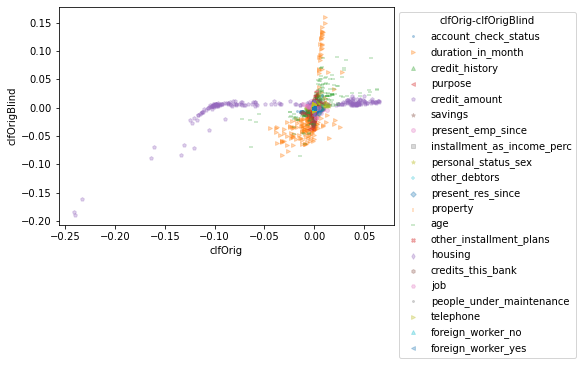

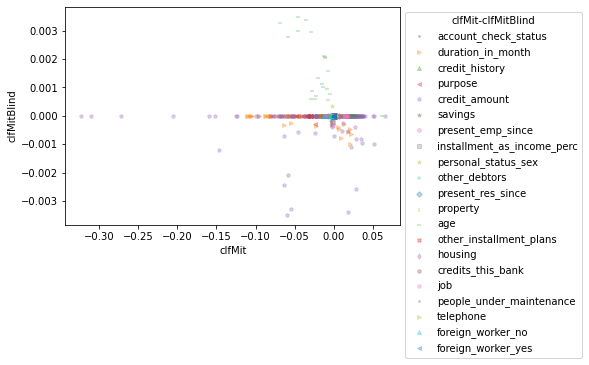

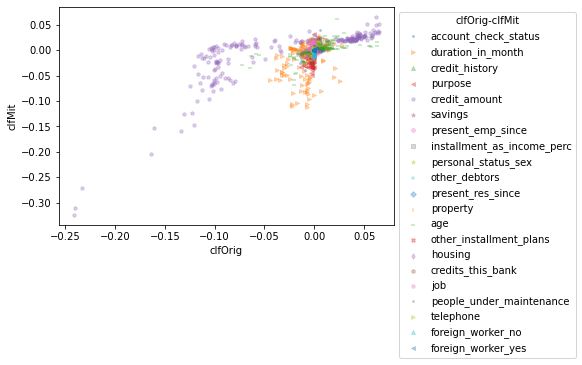

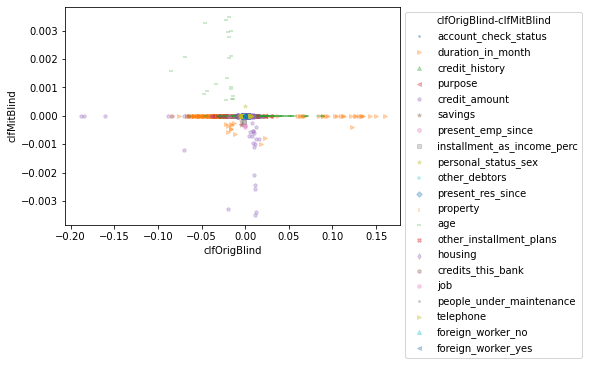

In [172]:
XAIPlots(shap_v,column_names,diffClfs=True)

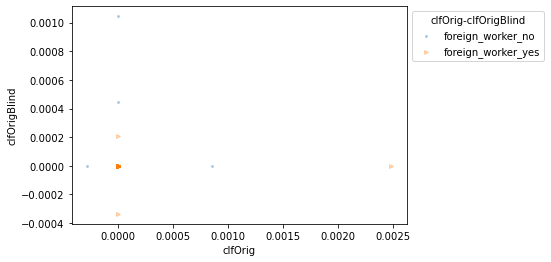

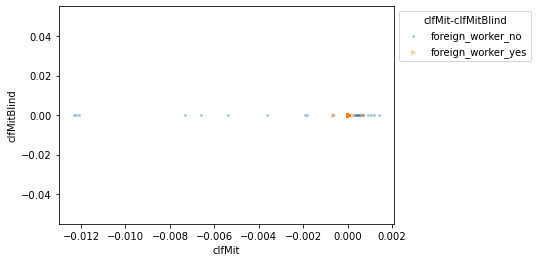

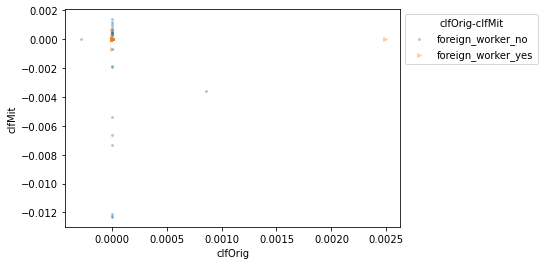

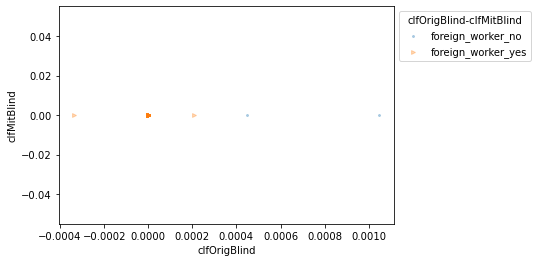

In [173]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [174]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [175]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [176]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [177]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.296300            0.054926   
duration_in_month                      -4.002442           -1.604464   
credit_history                          0.260800           -0.021909   
purpose                                 0.058677            0.023256   
credit_amount                          -9.882706           -4.366032   
savings                                 0.525985            0.084248   
present_emp_since                       0.037550           -0.006371   
installment_as_income_perc              0.078014            0.002585   
personal_status_sex                    -0.060616           -0.078180   
other_debtors                          -0.364340           -0.016748   
present_res_since                      -0.013173            0.002350   
property                                0.007625            0.041770   
age                                     2.487195            0.249599   
other_installment_plans                 0.068921           -0.026114   
housing                                -0.292101           -0.026203   
credits_this_bank                       0.079490            0.058443   
job                                    -0.019445           -0.027051   
people_under_maintenance                0.077575           -0.064702   
telephone                               0.016877            0.025772   
foreign_worker_no                      -0.007674            0.086674   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.088667                  0.262559  
duration_in_month                -2.094132                 -3.512773  
credit_history                    0.027610                  0.211281  
purpose                           0.006691                  0.075243  
credit_amount                   -12.427947                 -1.820791  
savings                           0.201168                  0.409065  
present_emp_since                -0.010099                  0.041278  
installment_as_income_perc       -0.005806                  0.086405  
personal_status_sex              -0.126152                 -0.012644  
other_debtors                    -0.102080                 -0.279008  
present_res_since                 0.023961                 -0.034784  
property                          0.013634                  0.035760  
age                               0.865818                  1.870976  
other_installment_plans          -0.015149                  0.057956  
housing                           0.058999                 -0.377303  
credits_this_bank                 0.081922                  0.056011  
job                              -0.000341                 -0.046154  
people_under_maintenance          0.008158                  0.004715  
telephone                        -0.035672                  0.078321  
foreign_worker_no                 0.092140                 -0.013141  
foreign_worker_yes                0.000000                  0.000000

In [178]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004969            0.004840   
duration_in_month                       0.056272            0.013952   
credit_history                          0.005088            0.001518   
purpose                                 0.005381            0.002998   
credit_amount                           0.072481            0.046190   
savings                                 0.005945            0.002080   
present_emp_since                       0.004360            0.001650   
installment_as_income_perc              0.003381            0.001614   
personal_status_sex                     0.002423            0.001777   
other_debtors                           0.002536            0.001356   
present_res_since                       0.003027            0.001679   
property                                0.002430            0.002947   
age                                     0.014024            0.006191   
other_installment_plans                 0.002266            0.001473   
housing                                 0.003669            0.001642   
credits_this_bank                       0.002245            0.001584   
job                                     0.002795            0.001815   
people_under_maintenance                0.002401            0.001465   
telephone                               0.003123            0.001667   
foreign_worker_no                       0.002482            0.001732   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.002624                  0.007647  
duration_in_month                 0.011188                  0.062360  
credit_history                    0.002133                  0.005136  
purpose                           0.002618                  0.006543  
credit_amount                     0.053857                  0.020085  
savings                           0.002276                  0.006939  
present_emp_since                 0.002177                  0.003088  
installment_as_income_perc        0.002331                  0.003343  
personal_status_sex               0.002528                  0.002572  
other_debtors                     0.002139                  0.002216  
present_res_since                 0.002269                  0.002003  
property                          0.003250                  0.001944  
age                               0.008725                  0.028052  
other_installment_plans           0.002235                  0.001909  
housing                           0.002280                  0.002862  
credits_this_bank                 0.002102                  0.001607  
job                               0.002882                  0.001797  
people_under_maintenance          0.002101                  0.001607  
telephone                         0.002365                  0.002593  
foreign_worker_no                 0.002526                  0.001716  
foreign_worker_yes                0.000000                  0.000000

In [179]:
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.003837            0.043337        0.046070   
SA-Mean               0.001241            0.000866        0.001263   
NSA-Sum               0.980517            0.356880        0.852316   
NSA-Mean              0.010464            0.005181        0.005899   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.006570  
SA-Mean                   0.000858  
NSA-Sum                   0.488054  
NSA-Mean                  0.008647

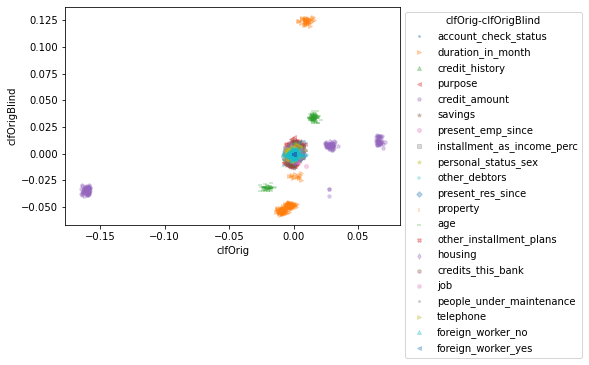

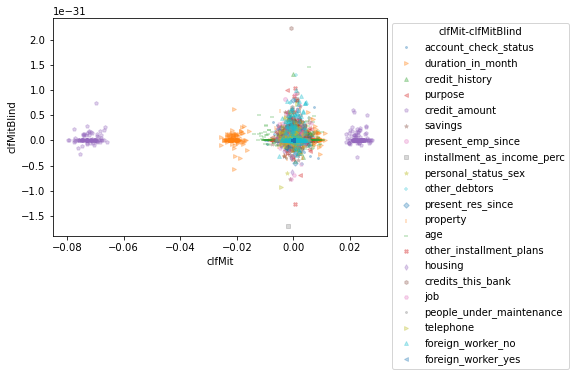

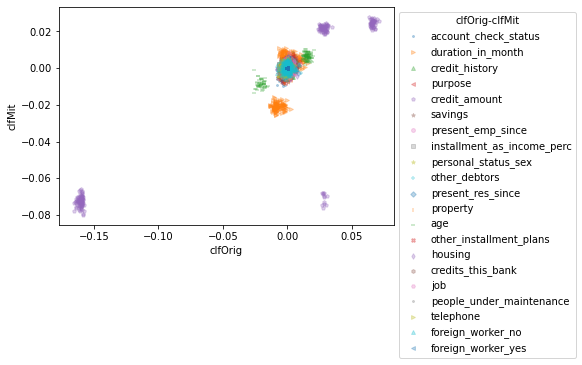

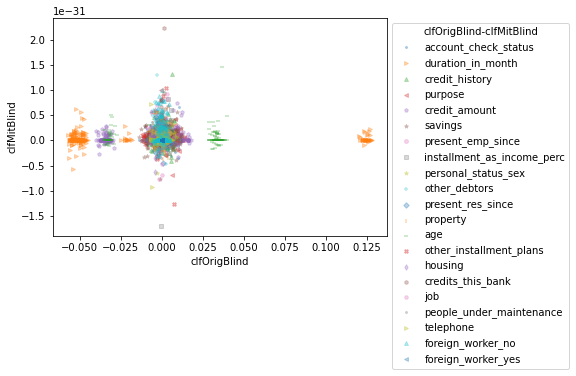

In [180]:
XAIPlots(lime_v,column_names,diffClfs=True)

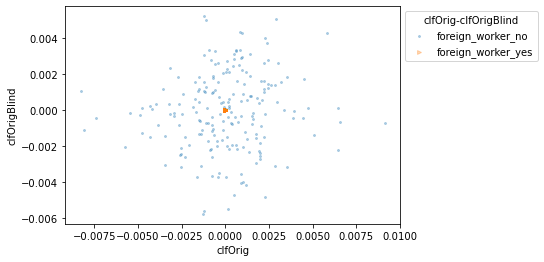

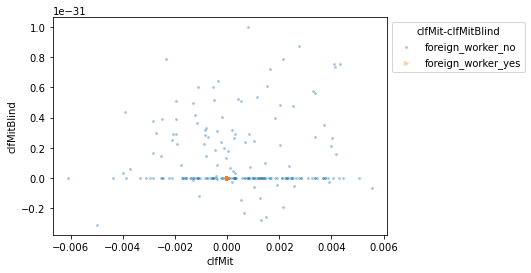

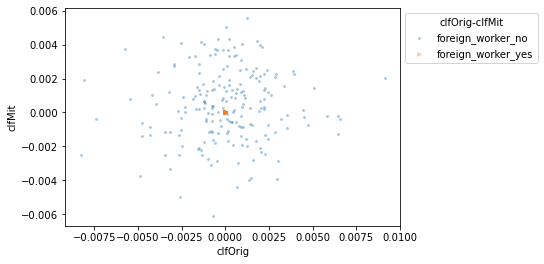

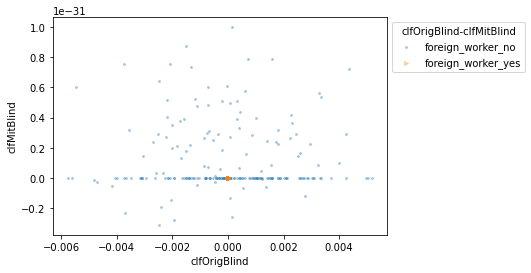

In [181]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [182]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [183]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [184]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [185]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.138827           -0.568541   
duration_in_month                      -3.424560           -2.334410   
credit_history                          0.087635           -0.000208   
purpose                                -0.277645           -0.518653   
credit_amount                          -5.934669           -1.491758   
savings                                 0.125193            0.027706   
present_emp_since                       0.015615            0.006391   
installment_as_income_perc              0.228168           -0.022026   
personal_status_sex                     0.184173            0.088747   
other_debtors                           0.083233           -0.008237   
present_res_since                      -0.009839            0.021843   
property                                0.029764            0.065705   
age                                     3.011009            0.315805   
other_installment_plans                -0.028261            0.001213   
housing                                 0.055362            0.019048   
credits_this_bank                       0.001218           -0.042200   
job                                    -0.002831            0.117006   
people_under_maintenance               -0.003788            0.063060   
telephone                               0.202577            0.011600   
foreign_worker_no                       0.000117           -0.058135   
foreign_worker_yes                      0.001838            0.000078   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.711169                  0.003800  
duration_in_month                -3.325438                 -2.433532  
credit_history                   -0.004463                  0.091890  
purpose                          -0.577224                 -0.219074  
credit_amount                    -7.325203                 -0.101224  
savings                           0.015880                  0.137019  
present_emp_since                 0.012672                  0.009334  
installment_as_income_perc       -0.026629                  0.232771  
personal_status_sex               0.205138                  0.067783  
other_debtors                     0.017078                  0.057918  
present_res_since                 0.067776                 -0.055772  
property                          0.065388                  0.030081  
age                               1.216377                  2.110437  
other_installment_plans          -0.011504                 -0.015543  
housing                          -0.008388                  0.082797  
credits_this_bank                -0.042200                  0.001218  
job                               0.074469                  0.039706  
people_under_maintenance          0.057980                  0.001292  
telephone                         0.005732                  0.208444  
foreign_worker_no                -0.057827                 -0.000191  
foreign_worker_yes                0.002429                 -0.000513

In [186]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004617            0.008832   
duration_in_month                       0.035348            0.020568   
credit_history                          0.003609            0.000108   
purpose                                 0.005978            0.007481   
credit_amount                           0.058605            0.033718   
savings                                 0.005117            0.002565   
present_emp_since                       0.003895            0.002738   
installment_as_income_perc              0.002732            0.001240   
personal_status_sex                     0.002300            0.004343   
other_debtors                           0.000518            0.000062   
present_res_since                       0.002517            0.000709   
property                                0.000715            0.004017   
age                                     0.015537            0.008563   
other_installment_plans                 0.000907            0.000112   
housing                                 0.001344            0.000341   
credits_this_bank                       0.000212            0.001204   
job                                     0.000930            0.002750   
people_under_maintenance                0.000063            0.000864   
telephone                               0.002228            0.000869   
foreign_worker_no                       0.000016            0.000337   
foreign_worker_yes                      0.000014            0.000008   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.006700                  0.006141  
duration_in_month                 0.018699                  0.042746  
credit_history                    0.000167                  0.003668  
purpose                           0.006253                  0.007217  
credit_amount                     0.040729                  0.011346  
savings                           0.002330                  0.005947  
present_emp_since                 0.002407                  0.002695  
installment_as_income_perc        0.001205                  0.002811  
personal_status_sex               0.003593                  0.002205  
other_debtors                     0.000284                  0.000491  
present_res_since                 0.000991                  0.001745  
property                          0.004025                  0.000707  
age                               0.009307                  0.021995  
other_installment_plans           0.000301                  0.000995  
housing                           0.000491                  0.001194  
credits_this_bank                 0.001204                  0.000212  
job                               0.003196                  0.000485  
people_under_maintenance          0.000899                  0.000029  
telephone                         0.000878                  0.002210  
foreign_worker_no                 0.000348                  0.000004  
foreign_worker_yes                0.000020                  0.000003

In [187]:
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.000977            0.029106        0.030128   
SA-Mean               0.000015            0.000173        0.000184   
NSA-Sum               0.728651            0.301271        0.724774   
NSA-Mean              0.007746            0.005320        0.005456   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000352  
SA-Mean                   0.000004  
NSA-Sum                   0.310507  
NSA-Mean                  0.006044

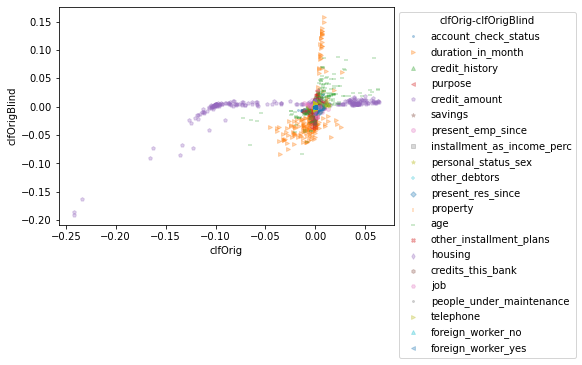

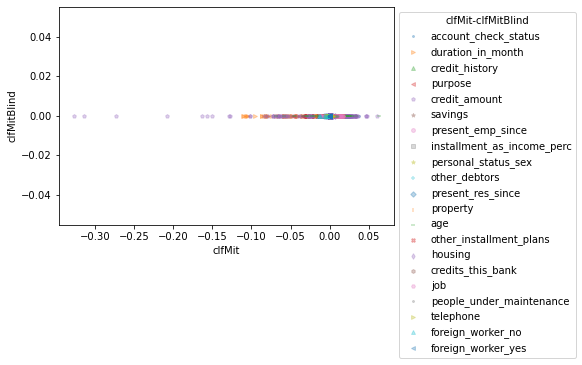

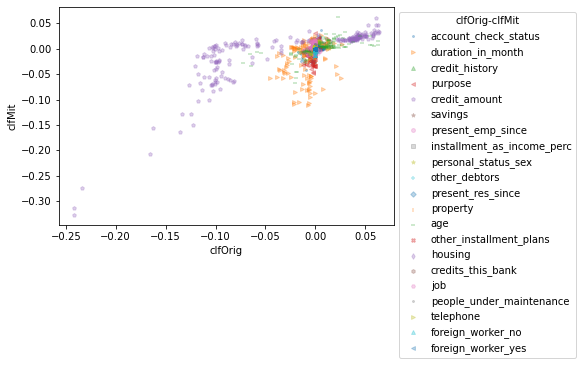

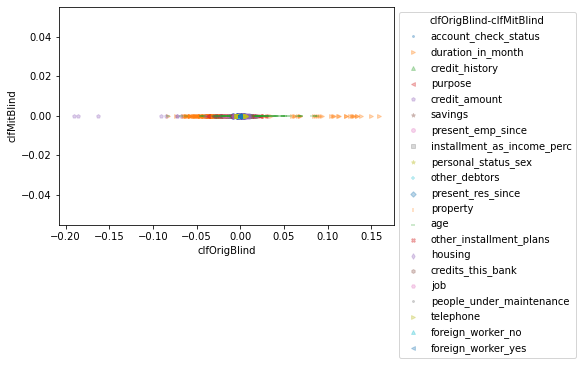

In [188]:
XAIPlots(shap_v,column_names,diffClfs=True)

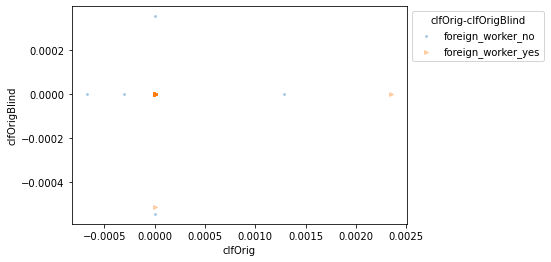

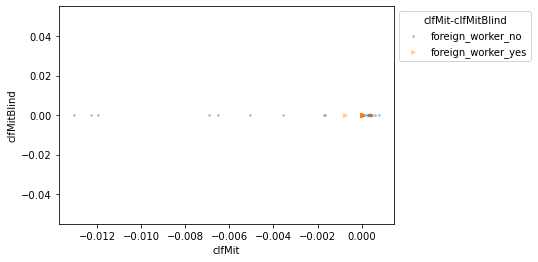

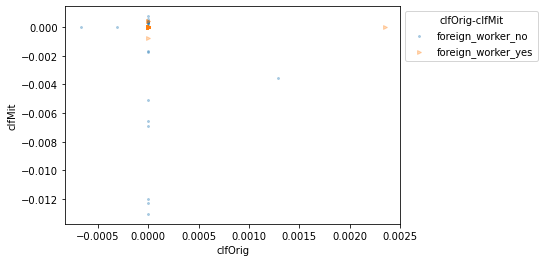

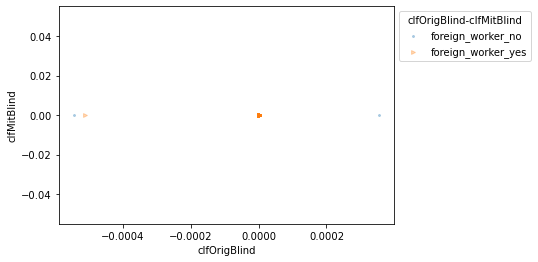

In [189]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [190]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [191]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [192]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [193]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.296531            0.005826   
duration_in_month                      -4.002602           -1.608526   
credit_history                          0.260464            0.002858   
purpose                                 0.058321            0.030300   
credit_amount                          -9.882604           -3.802670   
savings                                 0.526030            0.078567   
present_emp_since                       0.037237           -0.027916   
installment_as_income_perc              0.077827            0.016656   
personal_status_sex                    -0.060439           -0.056789   
other_debtors                          -0.364685            0.049027   
present_res_since                      -0.013345           -0.005293   
property                                0.007586            0.059477   
age                                     2.487380            0.232161   
other_installment_plans                 0.068848           -0.005499   
housing                                -0.292098           -0.006877   
credits_this_bank                       0.083436            0.018855   
job                                    -0.019356           -0.027890   
people_under_maintenance                0.077534           -0.019904   
telephone                               0.016683           -0.016776   
foreign_worker_no                      -0.007711            0.094134   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.039039                  0.263319  
duration_in_month                -2.098774                 -3.512355  
credit_history                    0.052652                  0.210670  
purpose                           0.013613                  0.075008  
credit_amount                   -11.865819                 -1.819455  
savings                           0.194455                  0.410143  
present_emp_since                -0.031955                  0.041277  
installment_as_income_perc        0.007788                  0.086694  
personal_status_sex              -0.104235                 -0.012992  
other_debtors                    -0.036043                 -0.279616  
present_res_since                 0.015709                 -0.034347  
property                          0.031425                  0.035638  
age                               0.848868                  1.870673  
other_installment_plans           0.005382                  0.057967  
housing                           0.078630                 -0.377605  
credits_this_bank                 0.042781                  0.059509  
job                              -0.001468                 -0.045778  
people_under_maintenance          0.053072                  0.004558  
telephone                        -0.079321                  0.079228  
foreign_worker_no                 0.099973                 -0.013550  
foreign_worker_yes                0.000000                  0.000000

In [194]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004968            0.004367   
duration_in_month                       0.056272            0.013708   
credit_history                          0.005088            0.001379   
purpose                                 0.005382            0.003052   
credit_amount                           0.072481            0.041716   
savings                                 0.005945            0.001961   
present_emp_since                       0.004360            0.001571   
installment_as_income_perc              0.003381            0.001443   
personal_status_sex                     0.002423            0.001751   
other_debtors                           0.002538            0.001294   
present_res_since                       0.003028            0.001563   
property                                0.002430            0.002878   
age                                     0.014025            0.005677   
other_installment_plans                 0.002267            0.001245   
housing                                 0.003669            0.001424   
credits_this_bank                       0.002243            0.001646   
job                                     0.002795            0.001685   
people_under_maintenance                0.002402            0.001400   
telephone                               0.003121            0.001584   
foreign_worker_no                       0.002481            0.001727   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.002479                  0.007645  
duration_in_month                 0.011031                  0.062364  
credit_history                    0.002095                  0.005134  
purpose                           0.002541                  0.006542  
credit_amount                     0.056369                  0.020091  
savings                           0.002027                  0.006937  
present_emp_since                 0.002106                  0.003086  
installment_as_income_perc        0.002202                  0.003342  
personal_status_sex               0.002390                  0.002574  
other_debtors                     0.002169                  0.002218  
present_res_since                 0.002248                  0.002003  
property                          0.003206                  0.001941  
age                               0.009135                  0.028053  
other_installment_plans           0.002045                  0.001911  
housing                           0.002308                  0.002860  
credits_this_bank                 0.002182                  0.001607  
job                               0.002917                  0.001800  
people_under_maintenance          0.001979                  0.001606  
telephone                         0.002316                  0.002590  
foreign_worker_no                 0.002368                  0.001711  
foreign_worker_yes                0.000000                  0.000000

In [195]:
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.003856            0.047067        0.049986   
SA-Mean               0.001240            0.000863        0.001184   
NSA-Sum               0.980684            0.319572        0.821107   
NSA-Mean              0.010464            0.004808        0.005987   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.006775  
SA-Mean                   0.000856  
NSA-Sum                   0.488254  
NSA-Mean                  0.008648

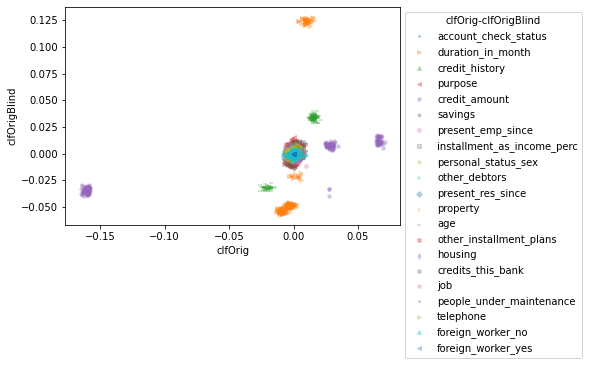

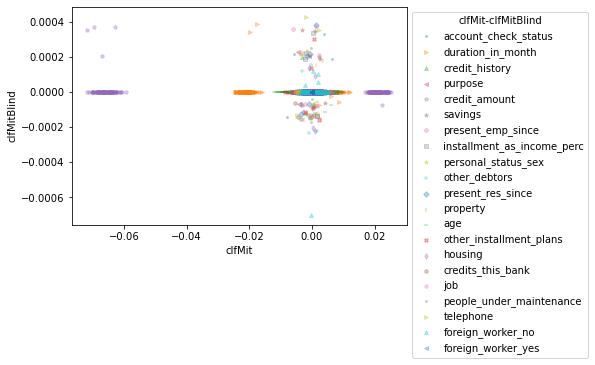

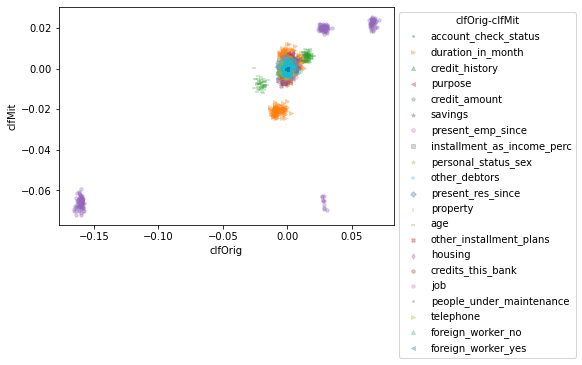

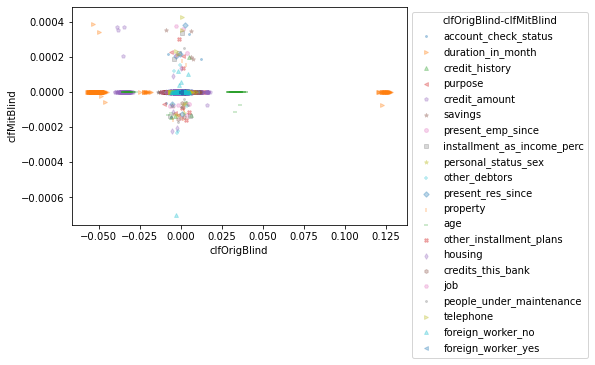

In [196]:
XAIPlots(lime_v,column_names,diffClfs=True)

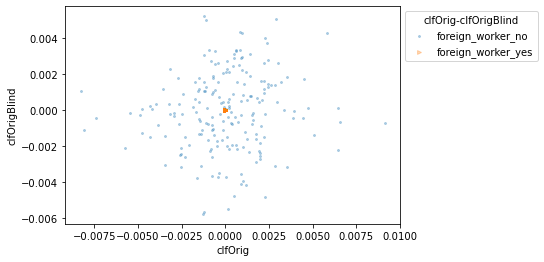

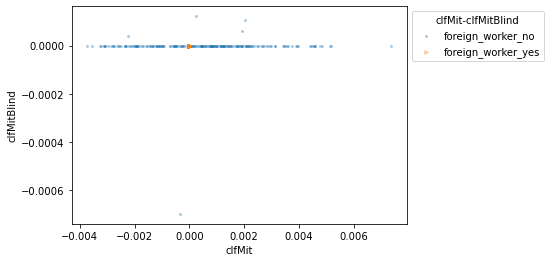

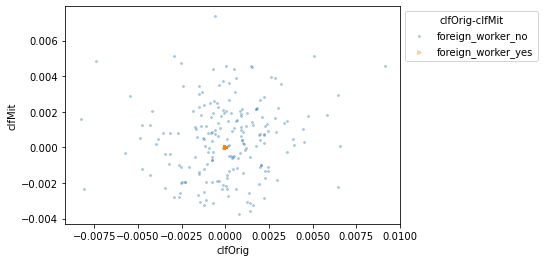

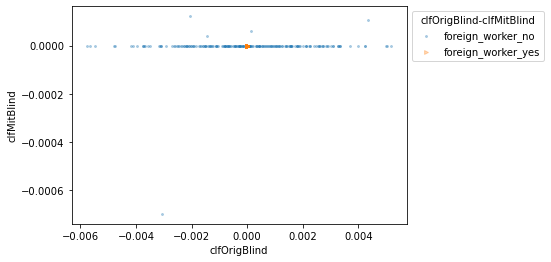

In [197]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [198]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [199]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [200]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -0.309282      -1.123255   
duration_in_month                 -1.974815      -4.630821   
credit_history                    -0.004853      -0.004511   
purpose                           -0.114983      -1.050219   
credit_amount                    -11.605743      -2.529586   
savings                           -0.025068       0.029141   
present_emp_since                  0.009416       0.026956   
installment_as_income_perc        -0.010215      -0.036801   
personal_status_sex                0.242435       0.183470   
other_debtors                      0.045158      -0.018706   
present_res_since                  0.090897       0.032535   
property                          -0.000346       0.118331   
age                                1.744129       0.622443   
other_installment_plans           -0.025272       0.005288   
housing                           -0.055937       0.034856   
credits_this_bank                  0.000000      -0.097304   
job                               -0.084878       0.207033   
people_under_maintenance          -0.008794       0.127359   
telephone                         -0.012881       0.027334   
foreign_worker_no                  0.000880      -0.112427   
foreign_worker_yes                 0.004837       0.000307   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -0.018397                 0.000000  
duration_in_month                           -4.793216                -0.005795  
credit_history                               0.151522                 0.000000  
purpose                                     -0.572014                -0.000283  
credit_amount                                0.113875                -0.027403  
savings                                      0.250519                -0.000512  
present_emp_since                            0.007109                 0.000000  
installment_as_income_perc                   0.465699                -0.000415  
personal_status_sex                          0.176570                 0.000335  
other_debtors                                0.111010                 0.000000  
present_res_since                           -0.085075                 0.000000  
property                                     0.056942                 0.000000  
age                                          4.194341                 0.035143  
other_installment_plans                     -0.040220                 0.000000  
housing                                      0.160225                 0.000000  
credits_this_bank                           -0.000141                 0.000000  
job                                          0.074963                -0.001070  
people_under_maintenance                     0.003876                 0.000000  
telephone                                    0.435949                 0.000000  
foreign_worker_no                            0.001301                 0.000000  
foreign_worker_yes                          -0.000640                 0.000000

In [201]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status           3.019070e-04       0.000342   
duration_in_month              5.974982e-04       0.000613   
credit_history                 5.589760e-05       0.000122   
purpose                        2.313848e-04       0.000252   
credit_amount                  7.065099e-04       0.002270   
savings                        2.232306e-04       0.000267   
present_emp_since              1.843489e-04       0.000230   
installment_as_income_perc     4.416405e-05       0.000214   
personal_status_sex            2.961784e-04       0.000256   
other_debtors                  9.148163e-05       0.000027   
present_res_since              1.881689e-04       0.000222   
property                       1.303581e-05       0.000274   
age                            4.383302e-04       0.000310   
other_installment_plans        5.280956e-05       0.000078   
housing                        6.821736e-05       0.000101   
credits_this_bank              0.000000e+00       0.000256   
job                            9.157172e-05       0.000326   
people_under_maintenance       1.620620e-05       0.000216   
telephone                      2.159095e-05       0.000264   
foreign_worker_no              8.452421e-06       0.000072   
foreign_worker_yes             6.771270e-07       0.000016   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000385                 0.000000  
duration_in_month                            0.001058                 0.000029  
credit_history                               0.000279                 0.000000  
purpose                                      0.000707                 0.000001  
credit_amount                                0.001582                 0.000137  
savings                                      0.000281                 0.000003  
present_emp_since                            0.000248                 0.000000  
installment_as_income_perc                   0.000250                 0.000002  
personal_status_sex                          0.000281                 0.000002  
other_debtors                                0.000109                 0.000000  
present_res_since                            0.000227                 0.000000  
property                                     0.000195                 0.000000  
age                                          0.001270                 0.000176  
other_installment_plans                      0.000148                 0.000000  
housing                                      0.000109                 0.000000  
credits_this_bank                            0.000115                 0.000000  
job                                          0.000052                 0.000005  
people_under_maintenance                     0.000032                 0.000000  
telephone                                    0.000235                 0.000000  
foreign_worker_no                            0.000012                 0.000000  
foreign_worker_yes                           0.000005                 0.000000

In [202]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.002859       0.056367                   0.000970   
SA-Mean          0.000005       0.000044                   0.000009   
NSA-Sum          0.861321       0.573997                   0.616403   
NSA-Mean         0.000191       0.000349                   0.000398   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000000  
SA-Mean                  0.000000  
NSA-Sum                  0.003735  
NSA-Mean                 0.000019

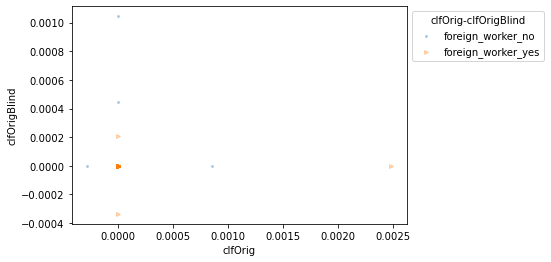

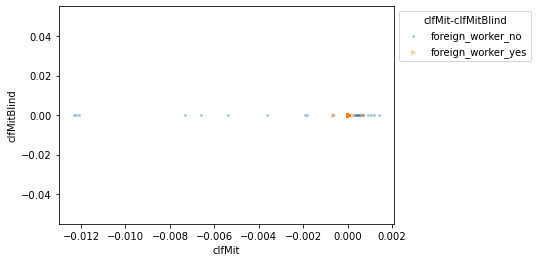

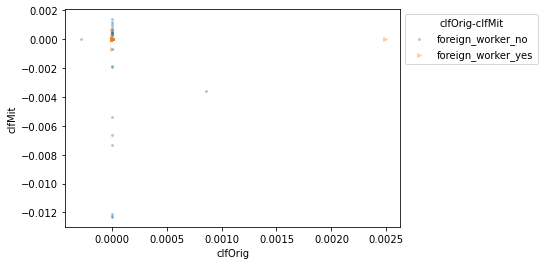

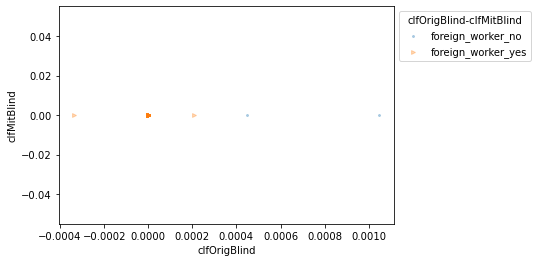

In [203]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [204]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [205]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [206]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.067482       0.060224   
duration_in_month                 -0.979337      -3.213568   
credit_history                     0.099037      -0.018776   
purpose                           -0.033130       0.053435   
credit_amount                    -16.123829      -8.169937   
savings                            0.233840       0.161782   
present_emp_since                 -0.007456      -0.034598   
installment_as_income_perc        -0.016783       0.018766   
personal_status_sex               -0.095944      -0.134443   
other_debtors                     -0.170663       0.032541   
present_res_since                  0.043223      -0.003553   
property                          -0.056271       0.101330   
age                                1.232437       0.482249   
other_installment_plans            0.021930      -0.031698   
housing                            0.170404      -0.032775   
credits_this_bank                  0.046957       0.077746   
job                                0.053419      -0.055228   
people_under_maintenance           0.145721      -0.084492   
telephone                         -0.122887       0.007895   
foreign_worker_no                  0.010933       0.181180   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.525349                 0.000529  
duration_in_month                           -7.025706                 0.000578  
credit_history                               0.422226                -0.000276  
purpose                                      0.150129                 0.000122  
credit_amount                               -3.641481                 0.001234  
savings                                      0.818175                 0.001033  
present_emp_since                            0.082243                 0.000312  
installment_as_income_perc                   0.172624                 0.000476  
personal_status_sex                         -0.025111                -0.000525  
other_debtors                               -0.558361                -0.000263  
present_res_since                           -0.069740                 0.000609  
property                                     0.071481                -0.000084  
age                                          3.742138                -0.000488  
other_installment_plans                      0.115839                 0.000084  
housing                                     -0.754603                -0.000306  
credits_this_bank                            0.115969                -0.000448  
job                                         -0.092220                 0.000288  
people_under_maintenance                     0.009388                -0.000115  
telephone                                    0.156447                 0.001101  
foreign_worker_no                           -0.026319                -0.000372  
foreign_worker_yes                           0.000000                 0.000000

In [207]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status           1.651375e-19       0.001618   
duration_in_month              1.553120e-19       0.001722   
credit_history                 1.435806e-19       0.001846   
purpose                        1.715919e-19       0.001770   
credit_amount                  4.857226e-19       0.004993   
savings                        1.586662e-19       0.001597   
present_emp_since              2.293088e-19       0.001601   
installment_as_income_perc     1.841873e-19       0.001636   
personal_status_sex            2.362205e-19       0.001767   
other_debtors                  2.255479e-19       0.001598   
present_res_since              1.352542e-19       0.001681   
property                       2.179924e-19       0.001512   
age                            2.291055e-19       0.001680   
other_installment_plans        1.350975e-19       0.001662   
housing                        2.173942e-19       0.001701   
credits_this_bank              1.753726e-19       0.001646   
job                            1.385068e-19       0.001660   
people_under_maintenance       1.547614e-19       0.001629   
telephone                      1.985615e-19       0.001766   
foreign_worker_no              1.651884e-19       0.001947   
foreign_worker_yes             0.000000e+00       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000008                 0.000005  
duration_in_month                            0.000007                 0.000004  
credit_history                               0.000007                 0.000003  
purpose                                      0.000008                 0.000004  
credit_amount                                0.000007                 0.000007  
savings                                      0.000008                 0.000006  
present_emp_since                            0.000008                 0.000004  
installment_as_income_perc                   0.000008                 0.000005  
personal_status_sex                          0.000009                 0.000003  
other_debtors                                0.000009                 0.000004  
present_res_since                            0.000008                 0.000005  
property                                     0.000009                 0.000004  
age                                          0.000010                 0.000002  
other_installment_plans                      0.000007                 0.000004  
housing                                      0.000007                 0.000004  
credits_this_bank                            0.000246                 0.000002  
job                                          0.000008                 0.000004  
people_under_maintenance                     0.000007                 0.000003  
telephone                                    0.000008                 0.000007  
foreign_worker_no                            0.000009                 0.000005  
foreign_worker_yes                           0.000000                 0.000000

In [208]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum       5.466675e-03       0.090590                   0.013159   
SA-Mean      8.259418e-20       0.000973                   0.000004   
NSA-Sum      1.037934e+00       0.672370                   0.976275   
NSA-Mean     1.977538e-19       0.001847                   0.000021   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000186  
SA-Mean                  0.000003  
NSA-Sum                  0.000467  
NSA-Mean                 0.000004

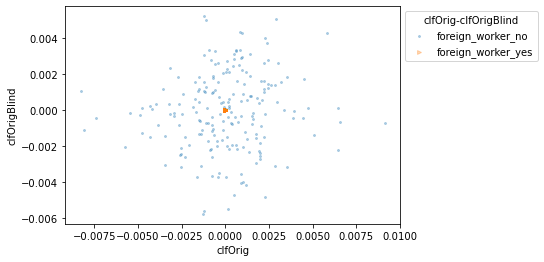

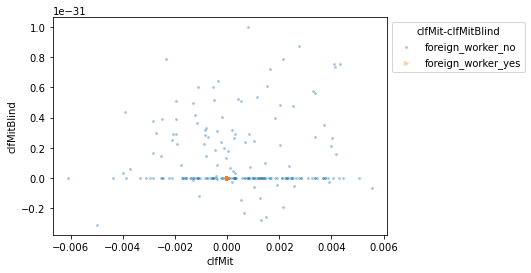

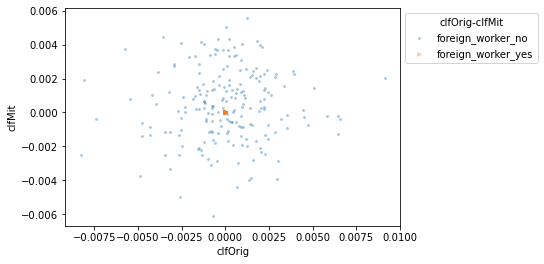

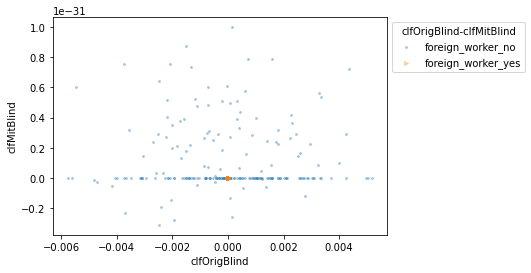

In [209]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [210]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [211]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_RF_Performances.csv')
res

Original Train Dimension = 800
Mitigated Train Dimension = 800
Test Dimension = 200
---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 165 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 165 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 158 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 9 ] Labeled as + class: [ 9 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 191 ] Labeled as + class: [ 163 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.705000            0.720000       0.720000   
Precision           0.492222            0.550000       0.528571   
Recall              0.225758            0.259091       0.262121   
F1 Score            0.299398            0.347544       0.344857   
Discrimination      0.136126            0.172775       0.136126   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.715000   CLF Original Blind    0.015000   
Precision                  0.521667   CLF Original Blind    0.057778   
Recall                     0.278788  CLF Mitigated Blind    0.033333   
F1 Score                   0.361197  CLF Mitigated Blind    0.048146   
Discrimination             0.146597         CLF Original    0.036649   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.005000   0.015000     0.005000  
Precision         0.006905   0.036349     0.028333  
Recall            0.016667   0.036364     0.019697  
F1 Score          0.016340   0.045459     0.013653  
Discrimination    0.010471   0.000000     0.026178

In [212]:

PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [213]:
PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [214]:
res = pd.read_csv(path_res+'PS_RF_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.705000            0.720000       0.720000   
Precision           0.492222            0.550000       0.528571   
Recall              0.225758            0.259091       0.262121   
F1 Score            0.299398            0.347544       0.344857   
Discrimination      0.136126            0.172775       0.136126   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.715000   CLF Original Blind    0.015000   
Precision                  0.521667   CLF Original Blind    0.057778   
Recall                     0.278788  CLF Mitigated Blind    0.033333   
F1 Score                   0.361197  CLF Mitigated Blind    0.048146   
Discrimination             0.146597         CLF Original    0.036649   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.005000   0.015000     0.005000  
Precision         0.006905   0.036349     0.028333  
Recall            0.016667   0.036364     0.019697  
F1 Score          0.016340   0.045459     0.013653  
Discrimination    0.010471   0.000000     0.026178

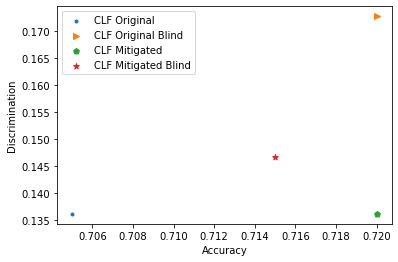

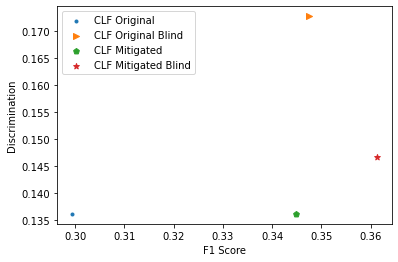

In [215]:
plotDisc(res)

In [216]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 9 instances.
    * "('foreign_worker_yes',)" grouping has 191 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 8 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 134 data points.
        - The class *Bad* has 57 data points.


In [217]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


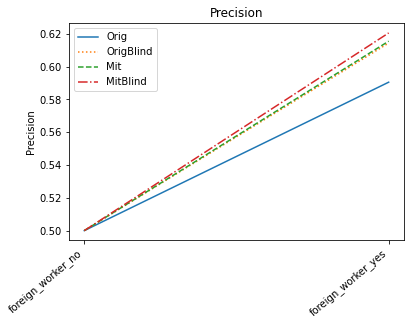

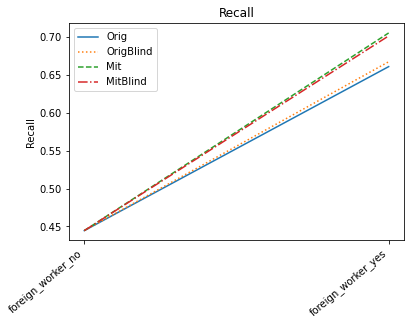

In [218]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [219]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [220]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [221]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [222]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -6.568729           -8.188501   
duration_in_month                      -6.887331           -5.108735   
credit_history                          2.342938            3.566984   
purpose                                 4.103138            4.171249   
credit_amount                         -12.221074          -13.675836   
savings                                -1.935765           -1.010335   
present_emp_since                      -1.887585           -1.797130   
installment_as_income_perc              1.029407            1.738888   
personal_status_sex                     0.908475            0.371741   
other_debtors                           0.315248            0.804834   
present_res_since                      -0.336932            0.040295   
property                                0.471376            1.139226   
age                                     3.453639            3.457452   
other_installment_plans                 1.457871            1.411231   
housing                                 1.864778            1.923086   
credits_this_bank                      -0.343082           -0.325400   
job                                     0.331271            0.197753   
people_under_maintenance                0.715984            0.341137   
telephone                              -0.491434           -0.516256   
foreign_worker_no                      -0.203510            0.017376   
foreign_worker_yes                     -0.188815            0.019340   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -7.538986                 -7.218243  
duration_in_month                -5.823944                 -6.172123  
credit_history                    2.872281                  3.037641  
purpose                           4.512026                  3.762360  
credit_amount                   -11.707812                -14.189097  
savings                          -1.826460                 -1.119640  
present_emp_since                -2.190779                 -1.493936  
installment_as_income_perc        1.061426                  1.706869  
personal_status_sex               0.501681                  0.778534  
other_debtors                     0.507759                  0.612323  
present_res_since                -0.298952                  0.002315  
property                          0.723850                  0.886752  
age                               3.245079                  3.666012  
other_installment_plans           1.261387                  1.607715  
housing                           1.898966                  1.888897  
credits_this_bank                -0.354684                 -0.313799  
job                               0.199718                  0.329306  
people_under_maintenance          0.461447                  0.595674  
telephone                        -0.444637                 -0.563053  
foreign_worker_no                -0.186025                 -0.000109  
foreign_worker_yes               -0.169474                  0.000000

In [223]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.012626            0.009202   
duration_in_month                       0.009545            0.006336   
credit_history                          0.004951            0.005565   
purpose                                 0.004092            0.005557   
credit_amount                           0.011495            0.006209   
savings                                 0.004167            0.006792   
present_emp_since                       0.003261            0.003531   
installment_as_income_perc              0.003102            0.003974   
personal_status_sex                     0.003146            0.002991   
other_debtors                           0.000886            0.000763   
present_res_since                       0.002334            0.002924   
property                                0.002725            0.003267   
age                                     0.004915            0.003989   
other_installment_plans                 0.001898            0.002576   
housing                                 0.001869            0.001850   
credits_this_bank                       0.001690            0.002442   
job                                     0.002639            0.002979   
people_under_maintenance                0.000855            0.000647   
telephone                               0.001912            0.002739   
foreign_worker_no                       0.001027            0.000139   
foreign_worker_yes                      0.000944            0.000097   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.010365                  0.012785  
duration_in_month                 0.009321                  0.007381  
credit_history                    0.006645                  0.003953  
purpose                           0.004371                  0.004573  
credit_amount                     0.011996                  0.006955  
savings                           0.005804                  0.005671  
present_emp_since                 0.003481                  0.003011  
installment_as_income_perc        0.003615                  0.003909  
personal_status_sex               0.003549                  0.002497  
other_debtors                     0.001974                  0.001625  
present_res_since                 0.002966                  0.002201  
property                          0.003471                  0.003213  
age                               0.005394                  0.003916  
other_installment_plans           0.001826                  0.002242  
housing                           0.002080                  0.002403  
credits_this_bank                 0.002102                  0.001713  
job                               0.002069                  0.003387  
people_under_maintenance          0.000672                  0.001403  
telephone                         0.002035                  0.001918  
foreign_worker_no                 0.001114                  0.000010  
foreign_worker_yes                0.001041                  0.000000

In [224]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.196162            0.018358        0.177750   
SA-Mean               0.000985            0.000118        0.001077   
NSA-Sum               2.508740            2.620319        2.496414   
NSA-Mean              0.004111            0.003912        0.004407   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000054  
SA-Mean                   0.000005  
NSA-Sum                   2.628647  
NSA-Mean                  0.003934

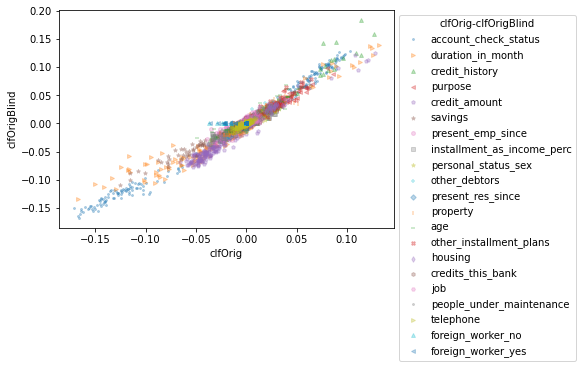

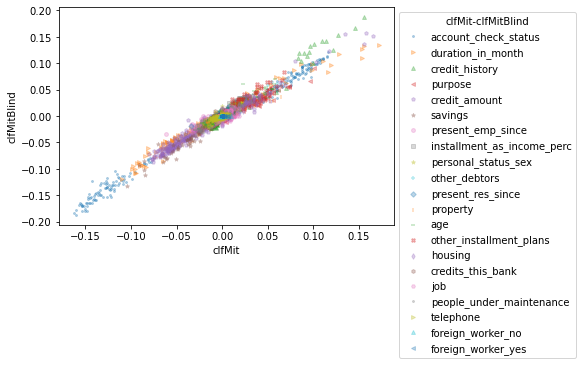

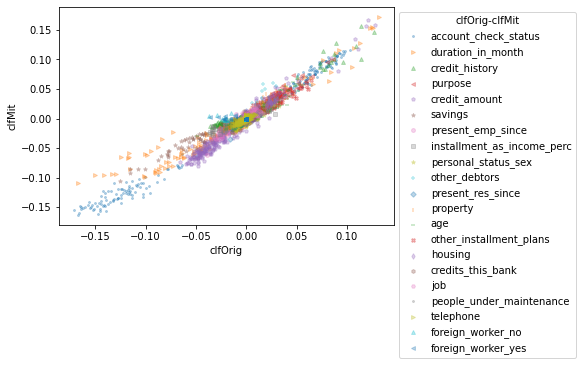

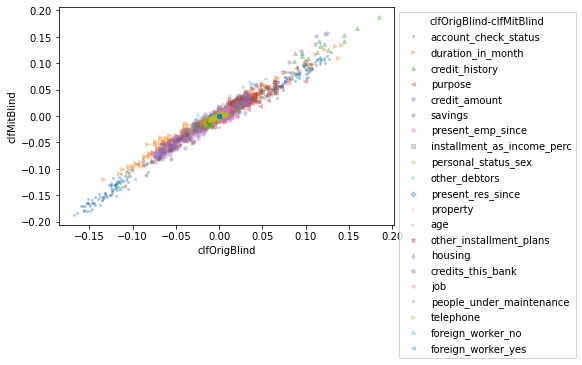

In [225]:
XAIPlots(shap_v,column_names,diffClfs=True)

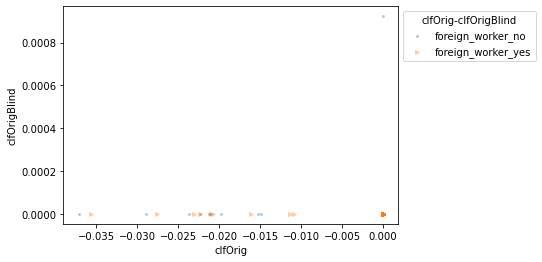

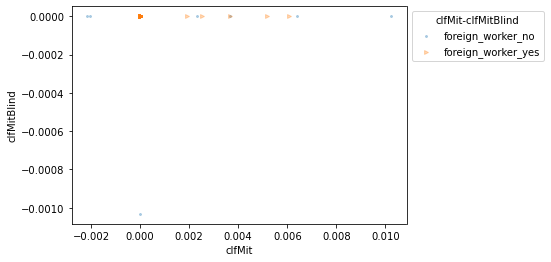

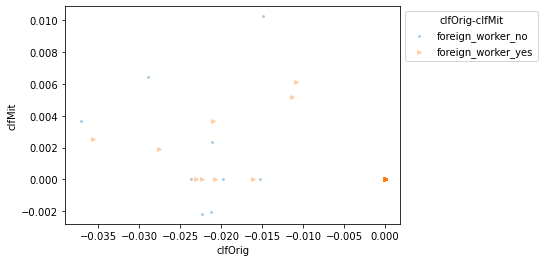

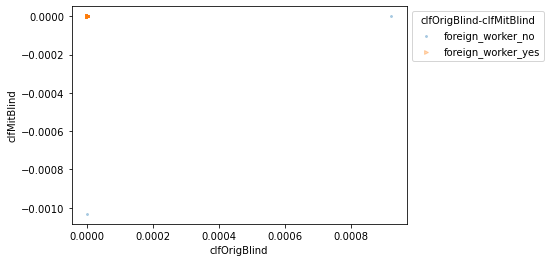

In [226]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [227]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [228]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [229]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [230]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.182439           -1.994257   
duration_in_month                       1.370879            0.683857   
credit_history                         -0.713229           -1.102162   
purpose                                -0.291941           -0.199655   
credit_amount                           0.084724           -0.167478   
savings                                -0.189533           -0.398328   
present_emp_since                       0.282355            0.455120   
installment_as_income_perc             -0.589470           -0.779443   
personal_status_sex                     0.458040            0.287564   
other_debtors                           0.263707            0.221931   
present_res_since                      -0.089483           -0.107049   
property                                0.383182            0.313231   
age                                     1.178973            0.990563   
other_installment_plans                 0.288572            0.283000   
housing                                -0.003747           -0.055987   
credits_this_bank                      -0.062598           -0.169780   
job                                     0.266890            0.147262   
people_under_maintenance                0.146152            0.127843   
telephone                              -0.027972           -0.229375   
foreign_worker_no                       0.020055           -0.002215   
foreign_worker_yes                     -0.021468            0.007033   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.756877                 -1.419820  
duration_in_month                 0.881984                  1.172752  
credit_history                   -0.941569                 -0.873822  
purpose                          -0.115398                 -0.376199  
credit_amount                     0.131822                 -0.214575  
savings                          -0.272790                 -0.315071  
present_emp_since                 0.400746                  0.336729  
installment_as_income_perc       -0.685093                 -0.683821  
personal_status_sex               0.412759                  0.332844  
other_debtors                     0.242918                  0.242720  
present_res_since                -0.134295                 -0.062237  
property                          0.245960                  0.450453  
age                               1.107683                  1.061853  
other_installment_plans           0.232619                  0.338953  
housing                          -0.081202                  0.021468  
credits_this_bank                -0.116340                 -0.116038  
job                               0.231507                  0.182645  
people_under_maintenance          0.126440                  0.147555  
telephone                        -0.095328                 -0.162018  
foreign_worker_no                 0.017840                  0.000000  
foreign_worker_yes               -0.014436                  0.000000

In [231]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.009527            0.005954   
duration_in_month                       0.007840            0.006256   
credit_history                          0.005324            0.004127   
purpose                                 0.003675            0.003367   
credit_amount                           0.005568            0.004661   
savings                                 0.003959            0.004775   
present_emp_since                       0.003040            0.003685   
installment_as_income_perc              0.002391            0.003218   
personal_status_sex                     0.002291            0.002406   
other_debtors                           0.001104            0.001024   
present_res_since                       0.002056            0.002298   
property                                0.003160            0.003467   
age                                     0.005255            0.004122   
other_installment_plans                 0.002331            0.002277   
housing                                 0.002168            0.002024   
credits_this_bank                       0.001926            0.001698   
job                                     0.002104            0.002563   
people_under_maintenance                0.001674            0.001151   
telephone                               0.001855            0.002027   
foreign_worker_no                       0.002158            0.000308   
foreign_worker_yes                      0.002086            0.000202   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.010221                  0.006043  
duration_in_month                 0.009789                  0.006761  
credit_history                    0.007568                  0.005273  
purpose                           0.003531                  0.003760  
credit_amount                     0.007789                  0.005142  
savings                           0.004805                  0.004383  
present_emp_since                 0.003296                  0.002585  
installment_as_income_perc        0.002949                  0.002996  
personal_status_sex               0.002586                  0.002294  
other_debtors                     0.002652                  0.002637  
present_res_since                 0.002593                  0.002108  
property                          0.002853                  0.003077  
age                               0.004969                  0.003974  
other_installment_plans           0.002947                  0.002908  
housing                           0.002024                  0.002494  
credits_this_bank                 0.001982                  0.001807  
job                               0.001956                  0.002925  
people_under_maintenance          0.001256                  0.002180  
telephone                         0.002032                  0.002105  
foreign_worker_no                 0.002298                  0.000000  
foreign_worker_yes                0.002183                  0.000000

In [232]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix_Tree.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.020762            0.004624        0.016138   
SA-Mean               0.002122            0.000255        0.002241   
NSA-Sum               0.414415            0.458625        0.432281   
NSA-Mean              0.003539            0.003216        0.004095   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   0.447977  
NSA-Mean                  0.003445

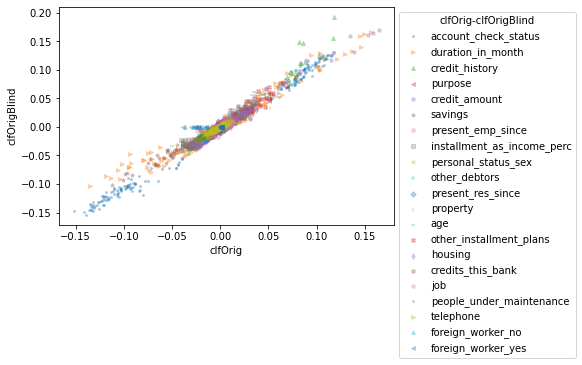

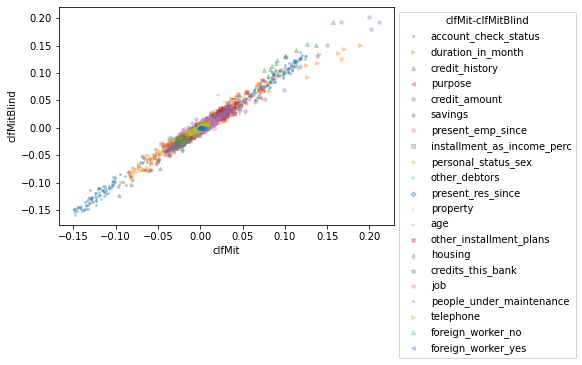

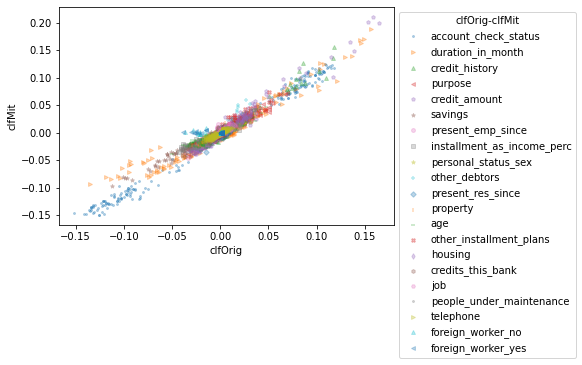

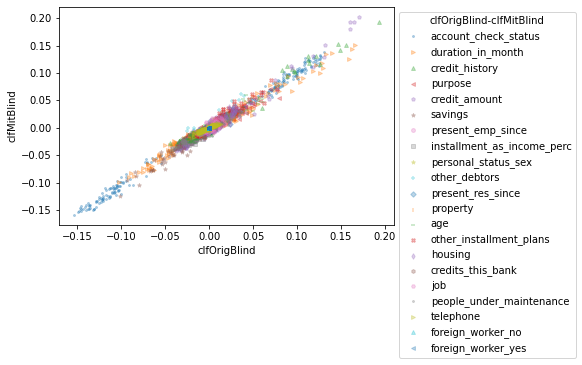

In [233]:
XAIPlots(shap_v,column_names,diffClfs=True)

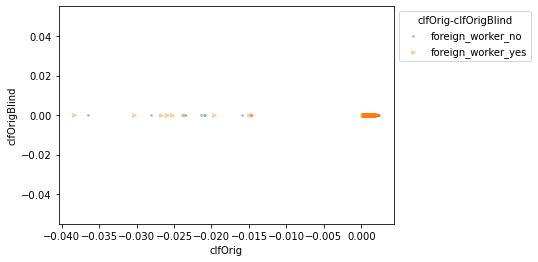

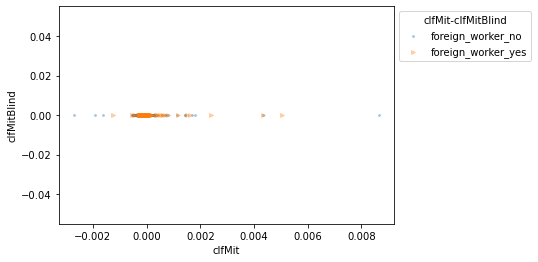

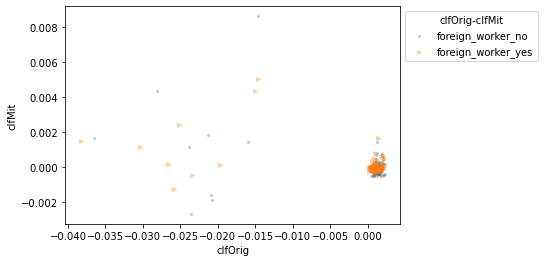

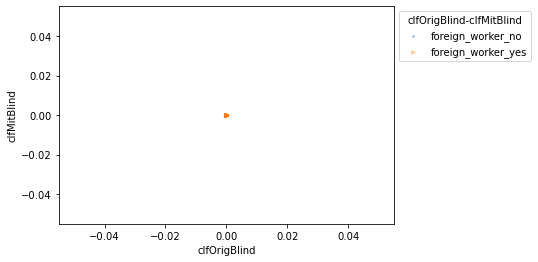

In [234]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [235]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [236]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [237]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [238]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.014241           -1.234205   
duration_in_month                      -7.006817           -8.517667   
credit_history                          3.354857            4.708331   
purpose                                 3.041489            3.518976   
credit_amount                         -12.606745          -16.501126   
savings                                 2.028452            2.713631   
present_emp_since                      -0.461175           -0.389860   
installment_as_income_perc              0.337257            0.683891   
personal_status_sex                     0.519693           -0.248117   
other_debtors                           1.667022           -0.154172   
present_res_since                      -0.015238            0.310764   
property                                0.892439            1.368207   
age                                     3.490860            3.502861   
other_installment_plans                -1.620060           -2.277769   
housing                                -0.446270           -0.534666   
credits_this_bank                      -0.012681            0.119582   
job                                    -0.394747           -0.500500   
people_under_maintenance               -0.110846           -0.062834   
telephone                              -0.022610            0.251510   
foreign_worker_no                       0.297985           -0.071786   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.061844                 -1.158120  
duration_in_month                -7.684947                 -7.839537  
credit_history                    3.469652                  4.593536  
purpose                           3.396092                  3.164372  
credit_amount                   -14.329469                -14.778402  
savings                           2.007460                  2.734623  
present_emp_since                -0.475815                 -0.375220  
installment_as_income_perc        0.399869                  0.621279  
personal_status_sex               0.072315                  0.199261  
other_debtors                     1.006491                  0.506359  
present_res_since                 0.064128                  0.231398  
property                          1.228920                  1.031726  
age                               3.302747                  3.690974  
other_installment_plans          -1.429793                 -2.468036  
housing                          -0.531686                 -0.449249  
credits_this_bank                 0.029659                  0.077242  
job                              -0.543456                 -0.351791  
people_under_maintenance         -0.068959                 -0.104721  
telephone                         0.224397                  0.004502  
foreign_worker_no                 0.180683                  0.045516  
foreign_worker_yes                0.000000                  0.000000

In [239]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.021414            0.008664   
duration_in_month                       0.011139            0.005099   
credit_history                          0.004931            0.006940   
purpose                                 0.004668            0.008171   
credit_amount                           0.009719            0.009189   
savings                                 0.004538            0.012719   
present_emp_since                       0.004053            0.005377   
installment_as_income_perc              0.003691            0.005036   
personal_status_sex                     0.004716            0.004817   
other_debtors                           0.003850            0.004353   
present_res_since                       0.004318            0.004678   
property                                0.003722            0.004002   
age                                     0.006384            0.005117   
other_installment_plans                 0.004128            0.006386   
housing                                 0.003869            0.004313   
credits_this_bank                       0.004138            0.006100   
job                                     0.004371            0.005268   
people_under_maintenance                0.004052            0.004135   
telephone                               0.004114            0.007008   
foreign_worker_no                       0.004415            0.004927   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.021140                  0.009120  
duration_in_month                 0.015213                  0.011075  
credit_history                    0.004890                  0.005818  
purpose                           0.007188                  0.004602  
credit_amount                     0.020255                  0.010313  
savings                           0.008041                  0.008482  
present_emp_since                 0.005062                  0.004550  
installment_as_income_perc        0.005511                  0.004183  
personal_status_sex               0.006417                  0.004880  
other_debtors                     0.005618                  0.006682  
present_res_since                 0.004032                  0.004218  
property                          0.005717                  0.005292  
age                               0.005517                  0.005277  
other_installment_plans           0.004116                  0.005301  
housing                           0.004358                  0.004263  
credits_this_bank                 0.004823                  0.004113  
job                               0.004061                  0.004293  
people_under_maintenance          0.004007                  0.004083  
telephone                         0.004723                  0.005484  
foreign_worker_no                 0.004466                  0.004379  
foreign_worker_yes                0.000000                  0.000000

In [240]:
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.148993            0.035893        0.090342   
SA-Mean               0.002208            0.002464        0.002233   
NSA-Sum               2.002289            2.505193        2.122511   
NSA-Mean              0.005885            0.006177        0.007405   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.022758  
SA-Mean                   0.002190  
NSA-Sum                   2.335808  
NSA-Mean                  0.005896

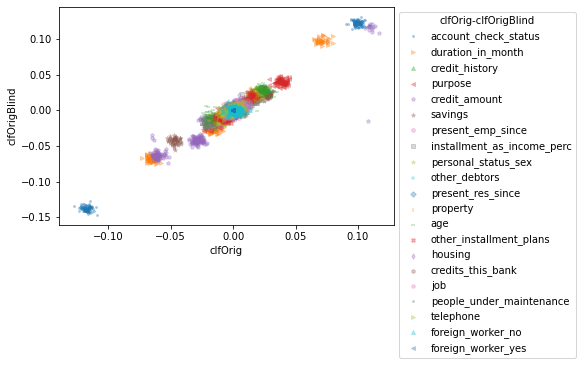

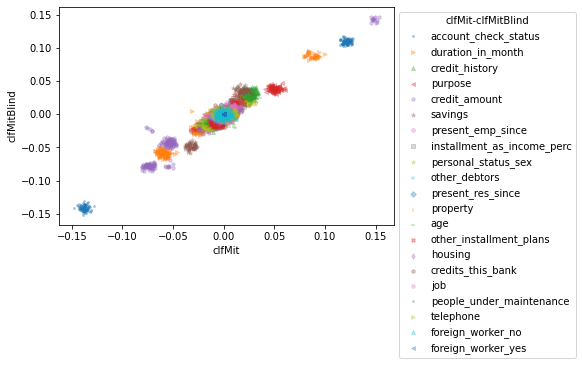

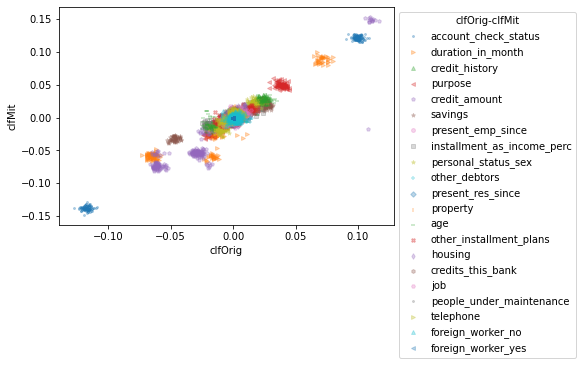

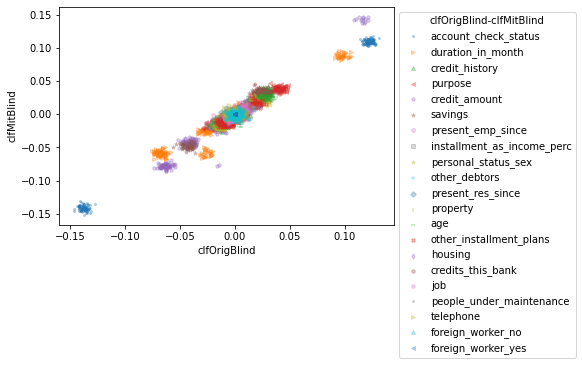

In [241]:
XAIPlots(lime_v,column_names,diffClfs=True)

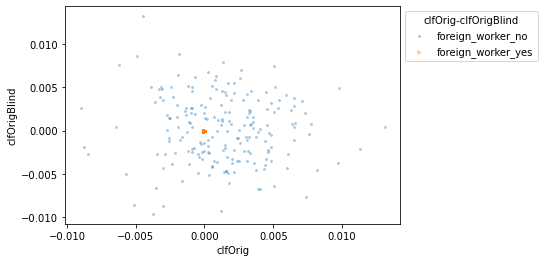

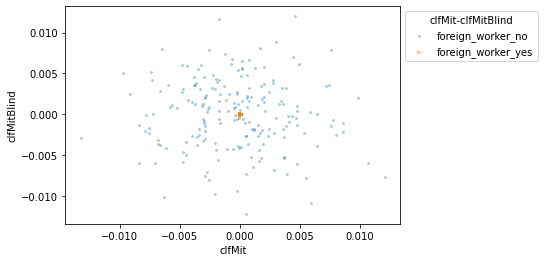

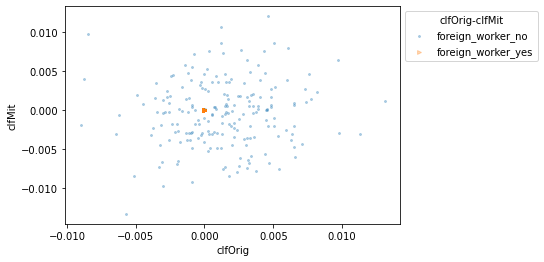

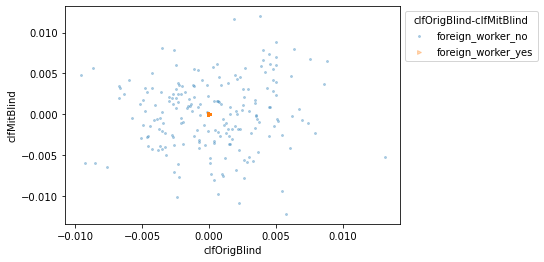

In [242]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [243]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [244]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [245]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [246]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -7.997428           -6.469333   
duration_in_month                      -6.252743           -5.708520   
credit_history                          2.330449            3.367732   
purpose                                 4.214197            4.034873   
credit_amount                         -11.769838          -14.325221   
savings                                -2.066730           -1.087343   
present_emp_since                      -1.910573           -1.864465   
installment_as_income_perc              1.054795            1.802919   
personal_status_sex                     1.009847            0.340533   
other_debtors                           0.291592            0.829692   
present_res_since                      -0.356350            0.062153   
property                                0.731195            1.064041   
age                                     3.483683            3.686054   
other_installment_plans                 1.434951            1.813854   
housing                                 1.943589            1.832827   
credits_this_bank                      -0.421190           -0.342925   
job                                     0.289265            0.206211   
people_under_maintenance                0.729590            0.345296   
telephone                              -0.489319           -0.428198   
foreign_worker_no                      -0.201082            0.018911   
foreign_worker_yes                     -0.182641            0.017810   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -5.924953                 -8.541809  
duration_in_month                -6.486586                 -5.474678  
credit_history                    2.714192                  2.983988  
purpose                           4.314247                  3.934824  
credit_amount                   -12.744867                -13.350191  
savings                          -1.477501                 -1.676571  
present_emp_since                -2.106287                 -1.668751  
installment_as_income_perc        1.051942                  1.805772  
personal_status_sex               0.551552                  0.798828  
other_debtors                     0.520222                  0.601062  
present_res_since                -0.279977                 -0.014220  
property                          0.750339                  1.044897  
age                               3.071319                  4.098418  
other_installment_plans           1.223551                  2.025255  
housing                           1.863687                  1.912729  
credits_this_bank                -0.415494                 -0.348621  
job                               0.297259                  0.198217  
people_under_maintenance          0.454574                  0.620312  
telephone                        -0.335492                 -0.582025  
foreign_worker_no                -0.182879                  0.000708  
foreign_worker_yes               -0.164831                  0.000000

In [247]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.011995            0.008434   
duration_in_month                       0.008988            0.007738   
credit_history                          0.005614            0.004683   
purpose                                 0.003791            0.004133   
credit_amount                           0.007636            0.005881   
savings                                 0.004355            0.005399   
present_emp_since                       0.003068            0.003460   
installment_as_income_perc              0.003031            0.004006   
personal_status_sex                     0.002987            0.003000   
other_debtors                           0.000736            0.000673   
present_res_since                       0.002111            0.002906   
property                                0.003141            0.003092   
age                                     0.005120            0.004509   
other_installment_plans                 0.001908            0.003128   
housing                                 0.001961            0.001744   
credits_this_bank                       0.001597            0.002250   
job                                     0.002506            0.002888   
people_under_maintenance                0.000832            0.000657   
telephone                               0.001861            0.002757   
foreign_worker_no                       0.001021            0.000118   
foreign_worker_yes                      0.000913            0.000089   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.009596                  0.008242  
duration_in_month                 0.010314                  0.007773  
credit_history                    0.006523                  0.004145  
purpose                           0.003607                  0.004254  
credit_amount                     0.012907                  0.008400  
savings                           0.005154                  0.005721  
present_emp_since                 0.003450                  0.002976  
installment_as_income_perc        0.003616                  0.004018  
personal_status_sex               0.003709                  0.002645  
other_debtors                     0.001789                  0.001736  
present_res_since                 0.002878                  0.002193  
property                          0.003298                  0.003322  
age                               0.005300                  0.004062  
other_installment_plans           0.001736                  0.002369  
housing                           0.002011                  0.002336  
credits_this_bank                 0.002084                  0.001884  
job                               0.002085                  0.003492  
people_under_maintenance          0.000770                  0.001329  
telephone                         0.002085                  0.002041  
foreign_worker_no                 0.001112                  0.000004  
foreign_worker_yes                0.001002                  0.000000

In [248]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.191861            0.018360        0.173855   
SA-Mean               0.000967            0.000103        0.001057   
NSA-Sum               2.567228            2.611168        2.451792   
NSA-Mean              0.003855            0.003755        0.004364   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000354  
SA-Mean                   0.000002  
NSA-Sum                   2.720061  
NSA-Mean                  0.003839

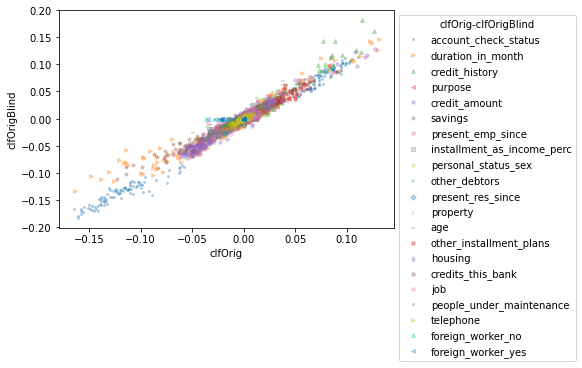

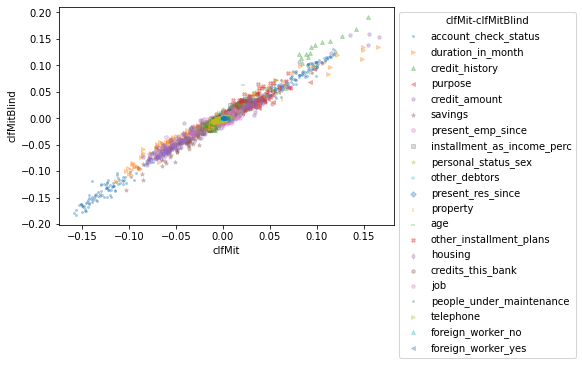

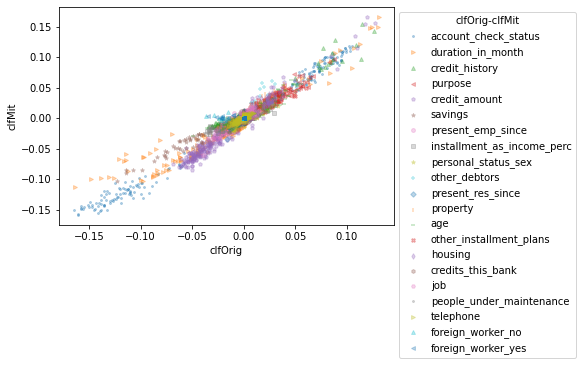

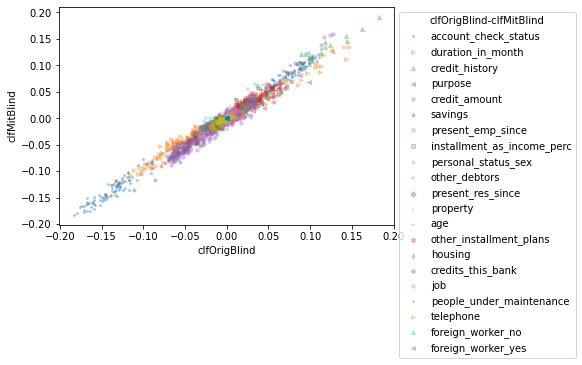

In [249]:
XAIPlots(shap_v,column_names,diffClfs=True)

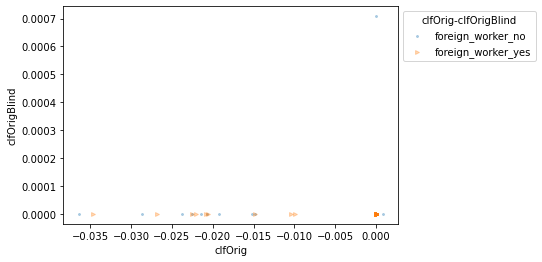

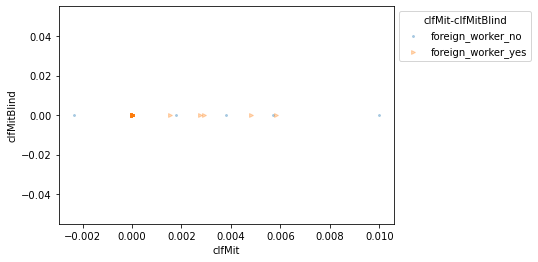

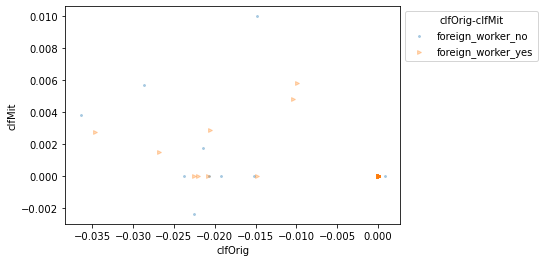

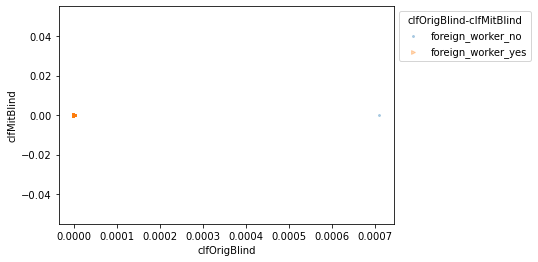

In [250]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [251]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [252]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [253]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [254]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.182439           -1.994257   
duration_in_month                       1.370879            0.683857   
credit_history                         -0.713229           -1.102162   
purpose                                -0.291941           -0.199655   
credit_amount                           0.084724           -0.167478   
savings                                -0.189533           -0.398328   
present_emp_since                       0.282355            0.455120   
installment_as_income_perc             -0.589470           -0.779443   
personal_status_sex                     0.458040            0.287564   
other_debtors                           0.263707            0.221931   
present_res_since                      -0.089483           -0.107049   
property                                0.383182            0.313231   
age                                     1.178973            0.990563   
other_installment_plans                 0.288572            0.283000   
housing                                -0.003747           -0.055987   
credits_this_bank                      -0.062598           -0.169780   
job                                     0.266890            0.147262   
people_under_maintenance                0.146152            0.127843   
telephone                              -0.027972           -0.229375   
foreign_worker_no                       0.020055           -0.002215   
foreign_worker_yes                     -0.021468            0.007033   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.756877                 -1.419820  
duration_in_month                 0.881984                  1.172752  
credit_history                   -0.941569                 -0.873822  
purpose                          -0.115398                 -0.376199  
credit_amount                     0.131822                 -0.214575  
savings                          -0.272790                 -0.315071  
present_emp_since                 0.400746                  0.336729  
installment_as_income_perc       -0.685093                 -0.683821  
personal_status_sex               0.412759                  0.332844  
other_debtors                     0.242918                  0.242720  
present_res_since                -0.134295                 -0.062237  
property                          0.245960                  0.450453  
age                               1.107683                  1.061853  
other_installment_plans           0.232619                  0.338953  
housing                          -0.081202                  0.021468  
credits_this_bank                -0.116340                 -0.116038  
job                               0.231507                  0.182645  
people_under_maintenance          0.126440                  0.147555  
telephone                        -0.095328                 -0.162018  
foreign_worker_no                 0.017840                  0.000000  
foreign_worker_yes               -0.014436                  0.000000

In [255]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.009527            0.005954   
duration_in_month                       0.007840            0.006256   
credit_history                          0.005324            0.004127   
purpose                                 0.003675            0.003367   
credit_amount                           0.005568            0.004661   
savings                                 0.003959            0.004775   
present_emp_since                       0.003040            0.003685   
installment_as_income_perc              0.002391            0.003218   
personal_status_sex                     0.002291            0.002406   
other_debtors                           0.001104            0.001024   
present_res_since                       0.002056            0.002298   
property                                0.003160            0.003467   
age                                     0.005255            0.004122   
other_installment_plans                 0.002331            0.002277   
housing                                 0.002168            0.002024   
credits_this_bank                       0.001926            0.001698   
job                                     0.002104            0.002563   
people_under_maintenance                0.001674            0.001151   
telephone                               0.001855            0.002027   
foreign_worker_no                       0.002158            0.000308   
foreign_worker_yes                      0.002086            0.000202   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.010221                  0.006043  
duration_in_month                 0.009789                  0.006761  
credit_history                    0.007568                  0.005273  
purpose                           0.003531                  0.003760  
credit_amount                     0.007789                  0.005142  
savings                           0.004805                  0.004383  
present_emp_since                 0.003296                  0.002585  
installment_as_income_perc        0.002949                  0.002996  
personal_status_sex               0.002586                  0.002294  
other_debtors                     0.002652                  0.002637  
present_res_since                 0.002593                  0.002108  
property                          0.002853                  0.003077  
age                               0.004969                  0.003974  
other_installment_plans           0.002947                  0.002908  
housing                           0.002024                  0.002494  
credits_this_bank                 0.001982                  0.001807  
job                               0.001956                  0.002925  
people_under_maintenance          0.001256                  0.002180  
telephone                         0.002032                  0.002105  
foreign_worker_no                 0.002298                  0.000000  
foreign_worker_yes                0.002183                  0.000000

In [256]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change_Tree.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.020762            0.004624        0.016138   
SA-Mean               0.002122            0.000255        0.002241   
NSA-Sum               0.414415            0.458625        0.432281   
NSA-Mean              0.003539            0.003216        0.004095   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   0.447977  
NSA-Mean                  0.003445

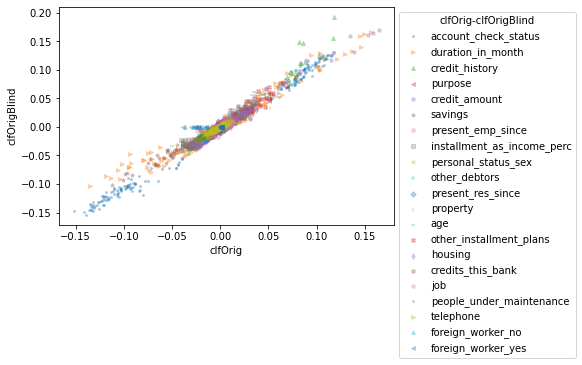

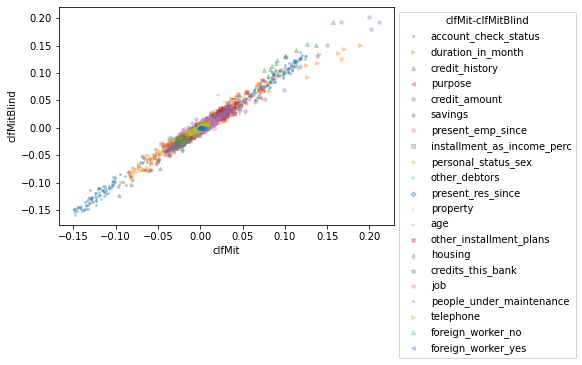

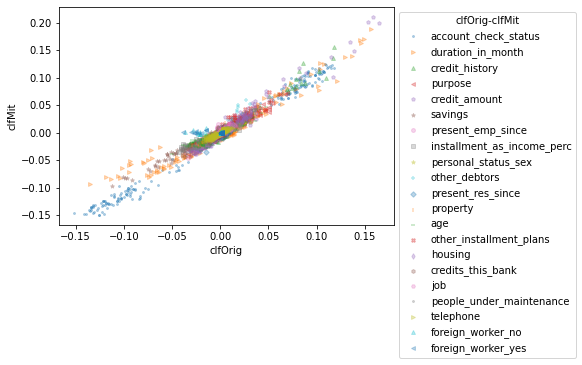

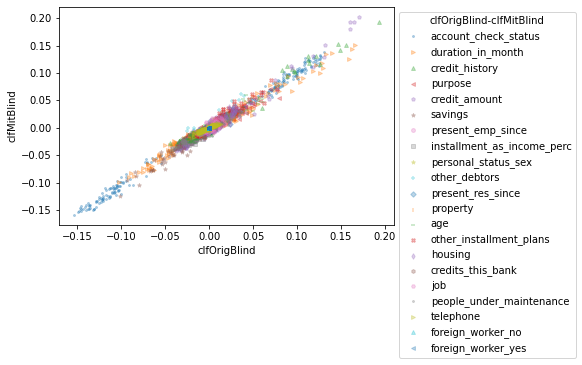

In [257]:
XAIPlots(shap_v,column_names,diffClfs=True)

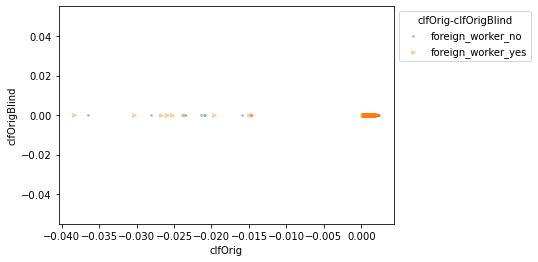

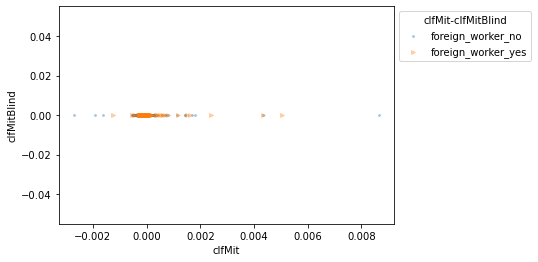

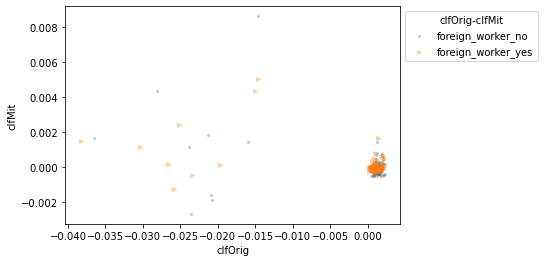

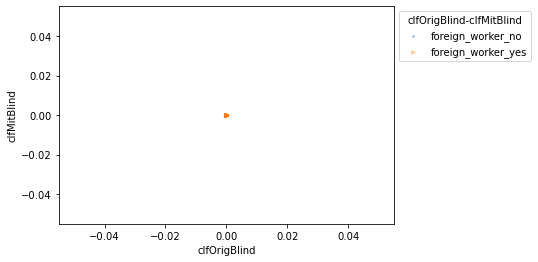

In [258]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [259]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [260]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [261]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [262]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.013898           -2.265056   
duration_in_month                      -7.003708           -8.400533   
credit_history                          3.354796            5.277880   
purpose                                 3.039488            3.508679   
credit_amount                         -12.609731          -16.528055   
savings                                 2.032900            2.699314   
present_emp_since                      -0.459367           -0.458812   
installment_as_income_perc              0.338615            0.740589   
personal_status_sex                     0.519740           -0.031790   
other_debtors                           1.664625           -0.153105   
present_res_since                      -0.015928            0.191485   
property                                0.964746            1.363974   
age                                     3.490786            3.548175   
other_installment_plans                -1.618623           -1.611739   
housing                                -0.447776           -0.652888   
credits_this_bank                       0.000656            0.069955   
job                                    -0.391824           -0.540328   
people_under_maintenance               -0.106405           -0.032474   
telephone                              -0.019333            0.226395   
foreign_worker_no                       0.292657           -0.194658   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.453725                  0.202568  
duration_in_month                -7.864359                 -7.539883  
credit_history                    3.796294                  4.836383  
purpose                           3.465268                  3.082900  
credit_amount                   -14.350686                -14.787100  
savings                           2.177528                  2.554686  
present_emp_since                -0.411843                 -0.506336  
installment_as_income_perc        0.294199                  0.785005  
personal_status_sex               0.061206                  0.426743  
other_debtors                     1.080774                  0.430746  
present_res_since                -0.005436                  0.180993  
property                          1.283490                  1.045231  
age                               3.047485                  3.991476  
other_installment_plans          -1.281064                 -1.949298  
housing                          -0.518271                 -0.582393  
credits_this_bank                 0.086122                 -0.015511  
job                              -0.583690                 -0.348463  
people_under_maintenance         -0.115445                 -0.023434  
telephone                         0.158739                  0.048323  
foreign_worker_no                 0.023410                  0.074590  
foreign_worker_yes                0.000000                  0.000000

In [263]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.021382            0.011094   
duration_in_month                       0.011124            0.007125   
credit_history                          0.004928            0.008782   
purpose                                 0.004669            0.006725   
credit_amount                           0.009719            0.008370   
savings                                 0.004531            0.009343   
present_emp_since                       0.004029            0.004576   
installment_as_income_perc              0.003689            0.005171   
personal_status_sex                     0.004709            0.005236   
other_debtors                           0.003841            0.004593   
present_res_since                       0.004318            0.004195   
property                                0.003751            0.004476   
age                                     0.006379            0.005220   
other_installment_plans                 0.004124            0.005604   
housing                                 0.003874            0.004050   
credits_this_bank                       0.004137            0.007411   
job                                     0.004344            0.004733   
people_under_maintenance                0.004058            0.004240   
telephone                               0.004112            0.006562   
foreign_worker_no                       0.004432            0.005691   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.015624                  0.004526  
duration_in_month                 0.016095                  0.012161  
credit_history                    0.006732                  0.009779  
purpose                           0.008643                  0.004998  
credit_amount                     0.020014                  0.011123  
savings                           0.006023                  0.007467  
present_emp_since                 0.004398                  0.004768  
installment_as_income_perc        0.005131                  0.004706  
personal_status_sex               0.006766                  0.004437  
other_debtors                     0.005099                  0.007365  
present_res_since                 0.004203                  0.004210  
property                          0.007108                  0.005154  
age                               0.006436                  0.004859  
other_installment_plans           0.003779                  0.004673  
housing                           0.004265                  0.003867  
credits_this_bank                 0.005205                  0.004259  
job                               0.003841                  0.004464  
people_under_maintenance          0.003790                  0.004184  
telephone                         0.004377                  0.005058  
foreign_worker_no                 0.005377                  0.004763  
foreign_worker_yes                0.000000                  0.000000

In [264]:
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.146328            0.097329        0.011705   
SA-Mean               0.002216            0.002845        0.002689   
NSA-Sum               2.004892            2.542170        2.265033   
NSA-Mean              0.005880            0.006184        0.007238   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.037295  
SA-Mean                   0.002382  
NSA-Sum                   2.280920  
NSA-Mean                  0.005898

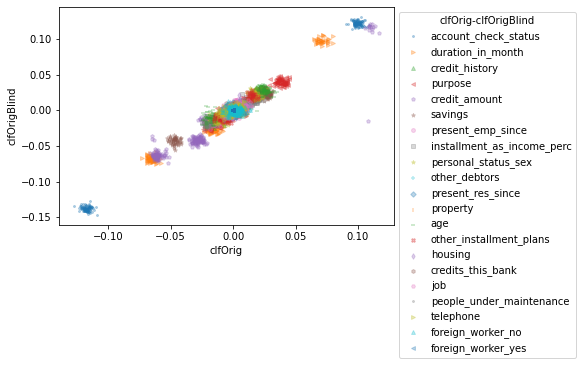

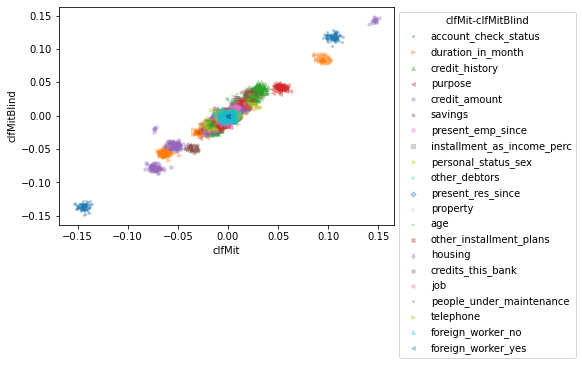

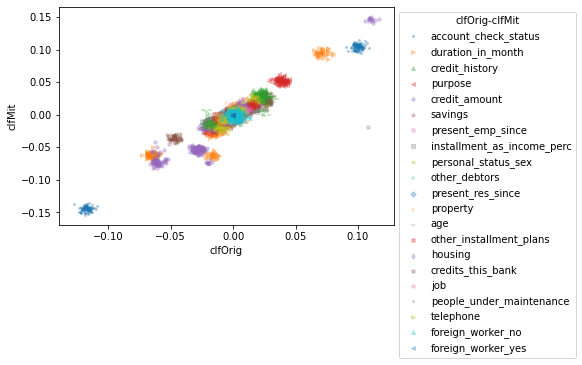

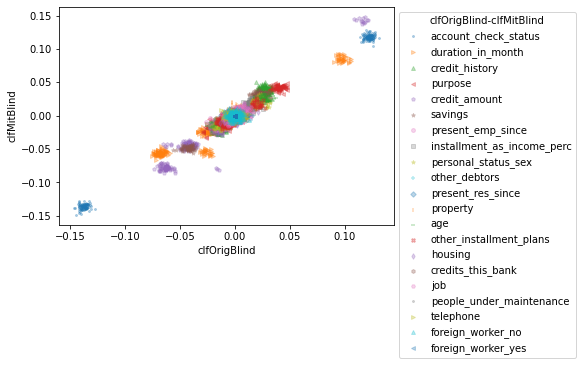

In [265]:
XAIPlots(lime_v,column_names,diffClfs=True)

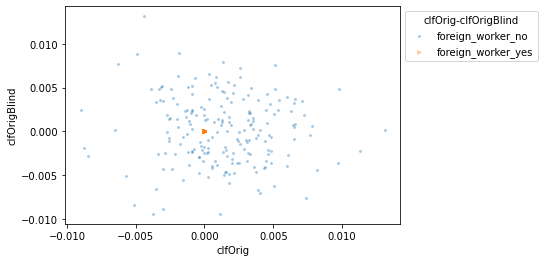

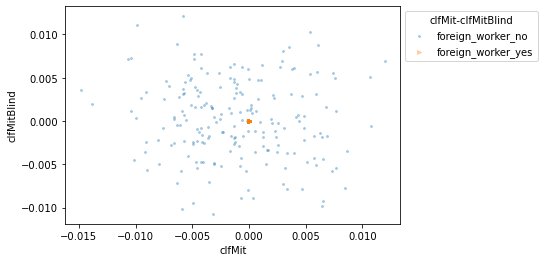

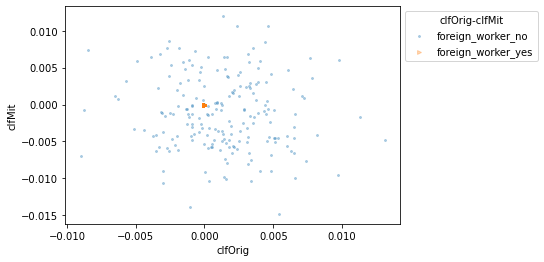

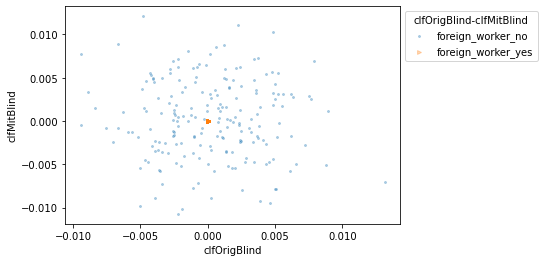

In [266]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [267]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [268]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [269]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -7.375482      -6.088457   
duration_in_month                 -6.510775      -5.799754   
credit_history                     2.065291       3.521183   
purpose                            4.047617       4.778656   
credit_amount                    -10.629903     -13.822777   
savings                           -2.189157      -1.114804   
present_emp_since                 -2.191614      -2.105452   
installment_as_income_perc         0.846223       1.267145   
personal_status_sex                0.971689       0.081545   
other_debtors                      0.266495       0.761486   
present_res_since                 -0.483071      -0.095857   
property                           0.377611       1.096578   
age                                3.131911       3.184487   
other_installment_plans            1.218057       1.266880   
housing                            1.736035       2.026618   
credits_this_bank                 -0.414678      -0.355500   
job                                0.072141       0.424836   
people_under_maintenance           0.576605       0.339415   
telephone                         -0.430365      -0.349764   
foreign_worker_no                 -0.406224       0.037319   
foreign_worker_yes                -0.371456       0.037150   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -7.190674                -8.569378  
duration_in_month                           -6.629299                -5.017501  
credit_history                               2.608096                 3.413532  
purpose                                      4.269718                 3.427466  
credit_amount                              -13.361008               -14.178280  
savings                                     -1.813338                -0.982874  
present_emp_since                           -1.606543                -1.556144  
installment_as_income_perc                   1.237978                 2.274663  
personal_status_sex                          0.946633                 0.630729  
other_debtors                                0.340345                 0.873040  
present_res_since                           -0.210210                 0.198306  
property                                     0.824960                 1.106688  
age                                          3.805411                 3.959018  
other_installment_plans                      1.674765                 1.958204  
housing                                      2.072331                 1.729295  
credits_this_bank                           -0.349595                -0.312825  
job                                          0.548395                -0.020872  
people_under_maintenance                     0.868968                 0.347018  
telephone                                   -0.550388                -0.594690  
foreign_worker_no                            0.001632                -0.001032  
foreign_worker_yes                           0.000000                 0.000000

In [270]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.005113       0.002960   
duration_in_month                  0.001031       0.004045   
credit_history                     0.001217       0.001823   
purpose                            0.001120       0.002103   
credit_amount                      0.002201       0.002993   
savings                            0.000730       0.001280   
present_emp_since                  0.000494       0.000500   
installment_as_income_perc         0.000415       0.000416   
personal_status_sex                0.000558       0.000445   
other_debtors                      0.000182       0.000192   
present_res_since                  0.000322       0.000388   
property                           0.000463       0.000476   
age                                0.000654       0.000709   
other_installment_plans            0.000456       0.000467   
housing                            0.000444       0.000569   
credits_this_bank                  0.000303       0.000396   
job                                0.000465       0.000451   
people_under_maintenance           0.000095       0.000116   
telephone                          0.000373       0.000484   
foreign_worker_no                  0.000019       0.000019   
foreign_worker_yes                 0.000032       0.000010   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.012256                 0.005638  
duration_in_month                            0.002511                 0.001161  
credit_history                               0.001283                 0.000851  
purpose                                      0.000958                 0.001428  
credit_amount                                0.004455                 0.000577  
savings                                      0.001366                 0.001475  
present_emp_since                            0.000529                 0.000568  
installment_as_income_perc                   0.000636                 0.000440  
personal_status_sex                          0.000384                 0.000373  
other_debtors                                0.000248                 0.000101  
present_res_since                            0.000451                 0.000429  
property                                     0.001063                 0.000402  
age                                          0.000638                 0.001719  
other_installment_plans                      0.000641                 0.002043  
housing                                      0.000554                 0.000428  
credits_this_bank                            0.000523                 0.000344  
job                                          0.000564                 0.000577  
people_under_maintenance                     0.000071                 0.000130  
telephone                                    0.000392                 0.000284  
foreign_worker_no                            0.000001                 0.000005  
foreign_worker_yes                           0.000000                 0.000000

In [271]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.388840       0.037235               8.157565e-04   
SA-Mean          0.000025       0.000015               5.374221e-07   
NSA-Sum          2.396564       2.551642               2.679403e+00   
NSA-Mean         0.000876       0.001095               1.553819e-03   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000516  
SA-Mean                  0.000003  
NSA-Sum                  2.692133  
NSA-Mean                 0.000998

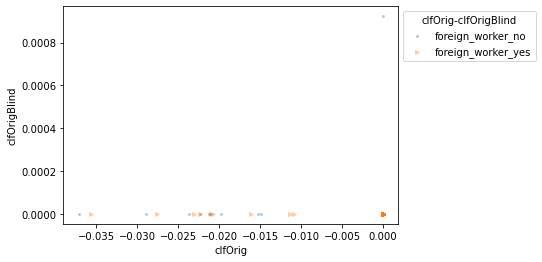

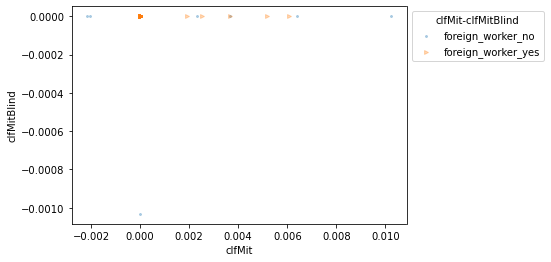

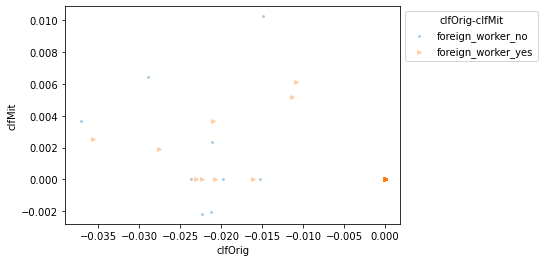

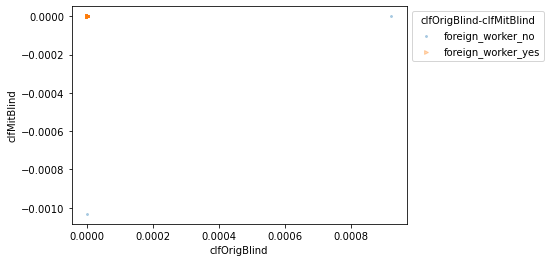

In [272]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [273]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [274]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [275]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -1.182579      -2.331175   
duration_in_month                  1.051116       0.712852   
credit_history                    -0.721691      -1.161448   
purpose                           -0.125673      -0.105122   
credit_amount                      0.233347       0.030297   
savings                           -0.118909      -0.426670   
present_emp_since                  0.324445       0.477047   
installment_as_income_perc        -0.716318      -0.653867   
personal_status_sex                0.541271       0.284248   
other_debtors                      0.243869       0.241967   
present_res_since                 -0.059348      -0.209242   
property                           0.245396       0.246524   
age                                1.285689       0.929677   
other_installment_plans            0.252858       0.212381   
housing                           -0.099245      -0.063158   
credits_this_bank                 -0.040683      -0.191998   
job                                0.236807       0.226208   
people_under_maintenance           0.105486       0.147393   
telephone                          0.008228      -0.198884   
foreign_worker_no                  0.040109      -0.004429   
foreign_worker_yes                -0.042937       0.014066   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -1.182300                -1.657339  
duration_in_month                            1.690641                 0.654863  
credit_history                              -0.704767                -1.042876  
purpose                                     -0.458209                -0.294188  
credit_amount                               -0.063898                -0.365253  
savings                                     -0.260156                -0.369985  
present_emp_since                            0.240265                 0.433194  
installment_as_income_perc                  -0.462623                -0.905019  
personal_status_sex                          0.374808                 0.290880  
other_debtors                                0.283546                 0.201895  
present_res_since                           -0.119618                -0.004856  
property                                     0.520967                 0.379938  
age                                          1.072258                 1.051448  
other_installment_plans                      0.324287                 0.353620  
housing                                      0.091751                -0.048815  
credits_this_bank                           -0.084513                -0.147562  
job                                          0.296974                 0.068316  
people_under_maintenance                     0.186818                 0.108293  
telephone                                   -0.064172                -0.259865  
foreign_worker_no                            0.000000                 0.000000  
foreign_worker_yes                           0.000000                 0.000000

In [276]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0            0.0   
duration_in_month                       0.0            0.0   
credit_history                          0.0            0.0   
purpose                                 0.0            0.0   
credit_amount                           0.0            0.0   
savings                                 0.0            0.0   
present_emp_since                       0.0            0.0   
installment_as_income_perc              0.0            0.0   
personal_status_sex                     0.0            0.0   
other_debtors                           0.0            0.0   
present_res_since                       0.0            0.0   
property                                0.0            0.0   
age                                     0.0            0.0   
other_installment_plans                 0.0            0.0   
housing                                 0.0            0.0   
credits_this_bank                       0.0            0.0   
job                                     0.0            0.0   
people_under_maintenance                0.0            0.0   
telephone                               0.0            0.0   
foreign_worker_no                       0.0            0.0   
foreign_worker_yes                      0.0            0.0   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                              0.0                      0.0  
duration_in_month                                 0.0                      0.0  
credit_history                                    0.0                      0.0  
purpose                                           0.0                      0.0  
credit_amount                                     0.0                      0.0  
savings                                           0.0                      0.0  
present_emp_since                                 0.0                      0.0  
installment_as_income_perc                        0.0                      0.0  
personal_status_sex                               0.0                      0.0  
other_debtors                                     0.0                      0.0  
present_res_since                                 0.0                      0.0  
property                                          0.0                      0.0  
age                                               0.0                      0.0  
other_installment_plans                           0.0                      0.0  
housing                                           0.0                      0.0  
credits_this_bank                                 0.0                      0.0  
job                                               0.0                      0.0  
people_under_maintenance                          0.0                      0.0  
telephone                                         0.0                      0.0  
foreign_worker_no                                 0.0                      0.0  
foreign_worker_yes                                0.0                      0.0

In [277]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.041523       0.009247                   0.000000   
SA-Mean          0.000000       0.000000                   0.000000   
NSA-Sum          0.399629       0.465798                   0.446451   
NSA-Mean         0.000000       0.000000                   0.000000   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000000  
SA-Mean                  0.000000  
NSA-Sum                  0.454642  
NSA-Mean                 0.000000

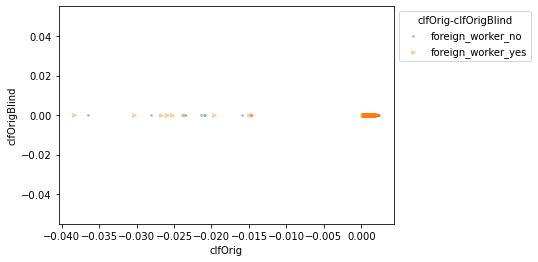

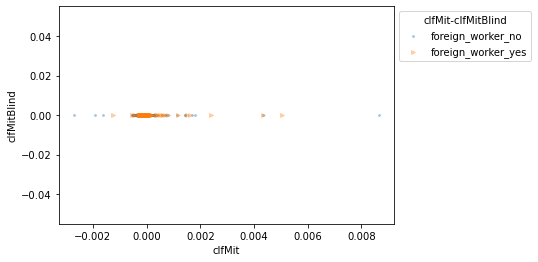

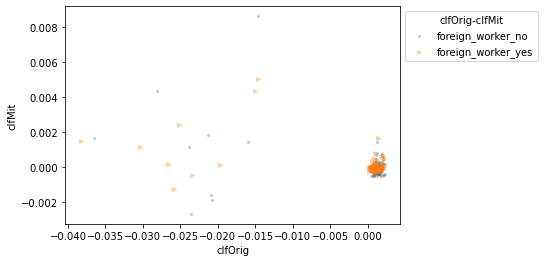

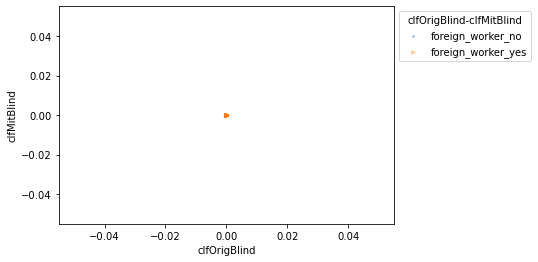

In [278]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [279]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [280]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [281]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -0.473151      -2.042418   
duration_in_month                 -6.791773      -8.757532   
credit_history                     2.796969       4.468977   
purpose                            2.936156       3.925204   
credit_amount                    -11.553352     -17.126803   
savings                            2.089180       2.095808   
present_emp_since                 -0.467136      -0.420522   
installment_as_income_perc         0.182595       0.511473   
personal_status_sex                0.354773      -0.221251   
other_debtors                      1.825295       0.261969   
present_res_since                 -0.098041       0.156732   
property                           0.950796       1.561613   
age                                2.855051       3.495181   
other_installment_plans           -1.506344      -1.204513   
housing                           -0.423646      -0.626311   
credits_this_bank                 -0.030139       0.145920   
job                               -0.450216      -0.676930   
people_under_maintenance          -0.126200      -0.058203   
telephone                         -0.066763       0.449899   
foreign_worker_no                  0.519022      -0.314929   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.501291                -1.456843  
duration_in_month                           -7.218752                -8.160668  
credit_history                               3.912684                 5.517234  
purpose                                      3.144821                 3.102451  
credit_amount                              -13.663124               -15.902378  
savings                                      1.972172                 3.317137  
present_emp_since                           -0.453406                -0.428150  
installment_as_income_perc                   0.493277                 0.913007  
personal_status_sex                          0.684660                -0.058656  
other_debtors                                1.506352                -0.569246  
present_res_since                            0.066875                 0.345517  
property                                     0.906389                 1.170568  
age                                          4.126595                 3.555855  
other_installment_plans                     -1.732338                -2.684996  
housing                                     -0.470400                -0.561242  
credits_this_bank                            0.018114                 0.043617  
job                                         -0.336355                -0.363899  
people_under_maintenance                    -0.091050                -0.037104  
telephone                                    0.024820                 0.028006  
foreign_worker_no                            0.071621                 0.048485  
foreign_worker_yes                           0.000000                 0.000000

In [282]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.000010       0.012036   
duration_in_month                  0.000012       0.005592   
credit_history                     0.000012       0.005197   
purpose                            0.000013       0.004881   
credit_amount                      0.000012       0.004168   
savings                            0.000013       0.004358   
present_emp_since                  0.000010       0.004122   
installment_as_income_perc         0.000013       0.004247   
personal_status_sex                0.000012       0.004504   
other_debtors                      0.000011       0.004062   
present_res_since                  0.000012       0.003719   
property                           0.000012       0.003892   
age                                0.000012       0.005138   
other_installment_plans            0.000010       0.003723   
housing                            0.000012       0.003717   
credits_this_bank                  0.000406       0.003932   
job                                0.000011       0.003622   
people_under_maintenance           0.000011       0.003688   
telephone                          0.000012       0.004008   
foreign_worker_no                  0.000014       0.004848   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000125                 0.007548  
duration_in_month                            0.000130                 0.004682  
credit_history                               0.000120                 0.006991  
purpose                                      0.000112                 0.005152  
credit_amount                                0.000119                 0.005185  
savings                                      0.000120                 0.004552  
present_emp_since                            0.000126                 0.003987  
installment_as_income_perc                   0.000126                 0.004256  
personal_status_sex                          0.000126                 0.004757  
other_debtors                                0.000122                 0.004604  
present_res_since                            0.000126                 0.004246  
property                                     0.000429                 0.004189  
age                                          0.000118                 0.004980  
other_installment_plans                      0.000113                 0.004869  
housing                                      0.000118                 0.003791  
credits_this_bank                            0.000130                 0.004422  
job                                          0.000127                 0.004235  
people_under_maintenance                     0.000108                 0.004363  
telephone                                    0.000121                 0.004434  
foreign_worker_no                            0.000131                 0.005337  
foreign_worker_yes                           0.000000                 0.000000

In [283]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.259511       0.157464                   0.035810   
SA-Mean          0.000007       0.002424                   0.000065   
NSA-Sum          1.893557       2.537224                   2.174920   
NSA-Mean         0.000032       0.004663                   0.000138   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.024242  
SA-Mean                  0.002669  
NSA-Sum                  2.537714  
NSA-Mean                 0.004802

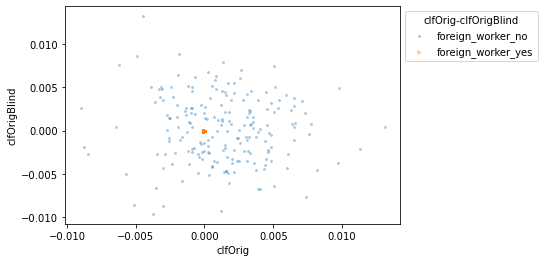

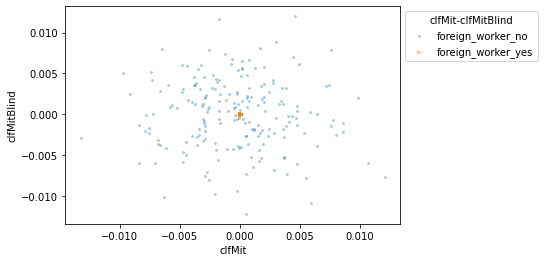

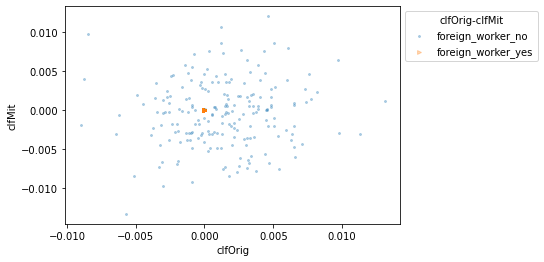

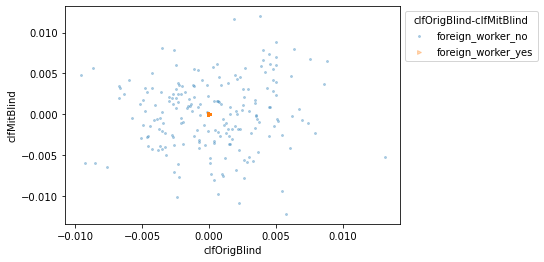

In [284]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)